<a href="https://colab.research.google.com/github/MarMarhoun/freelance_work/blob/main/side_projects/other_proj/hajar/DDoS_detection__WSN_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Several models

Summary of the Code:
Model Architectures:

CNN: A convolutional neural network suitable for sequence data.
LSTM: A long short-term memory network designed for sequence prediction problems.
RNN: A simple recurrent neural network for sequence data.
Evaluation Function:

The evaluate_balancing_methods function applies various balancing techniques to the dataset, evaluates each model architecture (CNN, LSTM, RNN), and stores the results.
Main Execution Block:

Loads and preprocesses the dataset.
Plots the original distribution of the target variable.
Evaluates the models and plots the results.
Usage:
Ensure you have the necessary libraries installed (e.g., TensorFlow, NumPy, Matplotlib).
Replace 'data.csv' and 'label' with your actual dataset and label column.
Run the script, and it will evaluate each balancing method and model architecture, providing visualizations of the target distributions and performance metrics.
This comprehensive setup allows you to compare the performance of different model architectures after applying various balancing methods, giving you insights into the best approach for

To create a combined architecture that integrates a Convolutional Neural Network (CNN) with a ResNet101 backbone, we can leverage the pre-trained ResNet101 model as a feature extractor. This approach allows us to benefit from the deep learning capabilities of ResNet while also incorporating additional convolutional layers for specific tasks.

Here’s how you can implement a combined CNN and ResNet101 architecture in the previous code:

Updated Code with Combined CNN and ResNet101 Architecture

To further enhance the model evaluation process, we can add additional efficient architectures such as:

GRU (Gated Recurrent Unit): A simpler alternative to LSTM that can perform similarly in many cases.

Bidirectional LSTM: This architecture processes the input sequence in both forward and backward directions, potentially capturing more context.

1D Convolutional Neural Network (1D CNN): This can be effective for sequence data and can be combined with LSTM or GRU layers for better performance.


Key Additions Explained:

1D CNN Model:

This architecture is designed to handle sequence data effectively, using convolutional layers to extract features from the input sequences.

Bidirectional LSTM Model:

This model processes the input sequence in both directions, which can help capture dependencies that may be missed by a unidirectional LSTM.

GRU Model:

The GRU architecture is a simpler alternative to LSTM, often providing similar performance with fewer parameters, making it computationally efficient.

Usage:

Ensure you have the necessary libraries installed (e.g., TensorFlow, NumPy, Matplotlib, scikit-learn).
Replace 'data.csv' and 'label' with your actual dataset and label column.
Run the script, and it will evaluate each balancing method and model architecture, providing visualizations of the target distributions, performance metrics, and training history.
This enhanced code structure allows for a more comprehensive evaluation of various model architectures, providing insights into their performance across different data balancing methods.

WHere’s the updated code with these additional architectures:

Key Enhancements Explained:
Early Stopping:

The EarlyStopping callback monitors the validation loss and stops training if it doesn't improve for a specified number of epochs (patience).
Model Checkpointing:

The ModelCheckpoint callback saves the model with the best validation loss during training, allowing you to restore the best model after training.
Stratified K-Fold Cross-Validation:

This method ensures that each fold has the same proportion of class labels as the entire dataset, providing a more reliable evaluation of the model's performance.
Confusion Matrix and Classification Report:

After each fold, the confusion matrix and classification report are printed to provide insights into the model's performance on different classes.
Plotting Training History:

The plot_training_history function visualizes the training and validation accuracy and loss over epochs, helping to analyze the training process.
Usage:
Ensure you have the necessary libraries installed (e.g., TensorFlow, NumPy, Matplotlib, scikit-learn).
Replace 'data.csv' and 'label' with your actual dataset and label column.
Run the script, and it will evaluate each balancing method and model architecture, providing visualizations of the target distributions, performance metrics, and training history.
This enhanced code structure allows for a more robust evaluation of different model architectures and balancing methods, providing deeper insights into their performance.

##### Install the necessary libraries

In [ ]:
# Install imblearn if not already installed
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
!pip install pydot graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
# Import the necessary libraries

import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Conv1D, MaxPooling1D, Flatten, LSTM, SimpleRNN, GRU, Bidirectional
from imblearn.over_sampling import SMOTE, ADASYN  # Import SMOTE and ADASYN
from imblearn.under_sampling import RandomUnderSampler  # Import Random Undersampling
from imblearn.over_sampling import RandomOverSampler  # Import Random Oversampling
from imblearn.combine import SMOTEENN  # Import SMOTE + Edited Nearest Neighbors
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model


Step 5: Set Up TPU Strategy

Use TensorFlow's TPU strategy for distributed training.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Function to load and preprocess data
def load_and_preprocess_data(file_path, label_column):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Rename the column
    data.rename(columns={' Time': 'Time_in_hours'}, inplace=True)

    # Create a copy of the DataFrame
    df_normalized = data.copy()

    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()

    # Apply label encoding to the 'id' and 'send_code' columns
    df_normalized[' id'] = label_encoder.fit_transform(df_normalized[' id'])
    df_normalized[' send_code '] = label_encoder.fit_transform(df_normalized[' send_code '])


    # Convert 'Time' from seconds to hours
    df_normalized['Time_in_hours'] = df_normalized['Time_in_hours'] / 3600

    # Columns to normalize
    columns_to_normalize = [
        ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
        ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', ' DATA_S', ' DATA_R',
        ' Data_Sent_To_BS', ' dist_CH_To_BS', 'Expaned Energy'
    ]

    # Min-Max Normalization
    for column in columns_to_normalize:
        min_value = df_normalized[column].min()
        max_value = df_normalized[column].max()
        df_normalized[column] = (df_normalized[column] - min_value) / (max_value - min_value)

    # Prepare features and labels
    X = df_normalized.drop(label_column, axis=1).values  # Features
    y = df_normalized[label_column].values  # Labels
    # Convert string labels to numerical using LabelEncoder
    num_classes = len(np.unique(y))
    y = label_encoder.fit_transform(y)
    # Convert labels to one-hot encoding
    y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

    return X, y

#### Models used

##### Balacing methods

In [ ]:
import time  # Import the time module for measuring training time


# Functions for balancing the dataset

# Function to balance the dataset using Random Oversampling
def random_oversample(X, y):
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using Random Undersampling
def random_undersample(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using SMOTE
def smote_balance(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using ADASYN
def adasyn_balance(X, y):
    adasyn = ADASYN(random_state=42)
    X_resampled, y_resampled = adasyn.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using SMOTE + ENN
def smote_enn_balance(X, y):
    smote_enn = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smote_enn.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled







##### DL architectures

In [ ]:
# Define the functions for the architectures:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Bidirectional, LSTM, GRU, SimpleRNN, Input, GlobalAveragePooling2D, Reshape # Import Reshape here
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import metrics


# Function to create a 1D CNN model
def create_1d_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.AUC(name='auc')])
    return model

# Function to create a Bidirectional LSTM model
def create_bidirectional_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.AUC(name='auc')])
    return model

# Function to create a GRU model
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',metrics.AUC(name='auc') ])
    return model


# Function to create an LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.AUC(name='auc')])
    return model

# Function to create an RNN model
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.AUC(name='auc')])
    return model


# Function to create a combined CNN and ResNet101 model
def create_cnn_resnet_model(input_shape):
    # Input layer
    input_tensor = Input(shape=input_shape)

    # Reshape to match ResNet101's expected input shape with 3 channels
    # Assuming input_shape is (num_features, 1)
    # Reshape to (input_shape[0], input_shape[1], 3) to add 3 channels
    # Original: reshape_layer = Reshape((input_shape[0], input_shape[1], 3))(input_tensor)

    # Updated: Reshape and repeat to create a 4D tensor
    # First, reshape to (batch_size, 1, num_features, 1)
    # Then, repeat along the last axis to get (batch_size, 1, num_features, 3)
    # Reshape to have height, width, and channels
    reshape_layer = Reshape((1, input_shape[0], 1))(input_tensor)
    # Repeat along the channel dimension to get 3 channels
    reshape_layer = tf.keras.layers.Lambda(lambda x: tf.repeat(x, 3, axis=-1))(reshape_layer)

    # Load ResNet101 model with pre-trained weights, excluding the top layers
    base_model = ResNet101(weights='imagenet', include_top=False, input_tensor=reshape_layer) # Pass the reshaped layer as input

    # Add custom layers on top of ResNet101
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(5, activation='softmax')(x)

    # Create the model
    model = Model(inputs=input_tensor, outputs=output) # Use original input_tensor

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC()])
    return model

# Update the architectures dictionary to include the new model
architectures = {
    '1D CNN': create_1d_cnn_model,
    'Bidirectional LSTM': create_bidirectional_lstm_model,
    'GRU': create_gru_model,
    'LSTM': create_lstm_model,
    'RNN': create_rnn_model,
    'CNN + ResNet101': create_cnn_resnet_model  # New architecture added here
}

In [ ]:
# Neural Network Architectures Visualization
import tensorflow as tf # Import tensorflow if not already imported
import numpy as np

# Load and preprocess the dataset
file_path = '/content/WSN-DS.csv'  # Replace with your actual data file
label_column = 'Attack type'  # Replace with the actual label column name
X, y = load_and_preprocess_data(file_path, label_column)

for arch_name, model_fn in architectures.items():  # Rename 'model' to 'model_fn' for clarity
    print(f"Architecture: {arch_name}")
    # Reshape the input data to add a timestep dimension if it is a 1D CNN

        # Assuming your data has 18 features and you want to treat each sample as a single timestep
    X_reshaped = X.reshape(X.shape[0], X.shape[1], 1) # Add timestep dimension
    model = model_fn(input_shape=X_reshaped.shape[1:]) # Pass the reshaped data shape to the model function

    model.summary()
    print("\n")

Architecture: 1D CNN
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 16, 32)            128       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 8, 32)             0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 3, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_2 (Dense)             (Non

In [ ]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 16.2 MB/s eta 0:00:00


In [ ]:
!pip install pydot graphviz

In [ ]:
# Neural Network Architectures Visualization
import tensorflow as tf  # Import tensorflow if not already imported
import numpy as np
import visualkeras  # Import VisualKeras

# Load and preprocess the dataset
file_path = '/content/WSN-DS.csv'  # Replace with your actual data file
label_column = 'Attack type'  # Replace with the actual label column name
X, y = load_and_preprocess_data(file_path, label_column)

# Assuming architectures is a dictionary of architecture names and model functions
for arch_name, model_fn in architectures.items():  # Rename 'model' to 'model_fn' for clarity
    print(f"Architecture: {arch_name}")

    # Reshape the input data to add a timestep dimension if it is a 1D CNN
    X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)  # Add timestep dimension
    model = model_fn(input_shape=X_reshaped.shape[1:])  # Pass the reshaped data shape to the model function

    model.summary()

    # Step 3: Visualize the model using VisualKeras
    # Remove the show_shapes argument as it is not supported in layered_view()
    visualkeras.layered_view(model, to_file=f'{arch_name}_architecture.png',legend=True, show_dimension=True).show()
    print(f"Model architecture has been saved as '{arch_name}_architecture.png'\n")

Architecture: 1D CNN
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 16, 32)            128       
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 8, 32)             0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 6, 64)             6208      
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 3, 64)             0         
 g1D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 192)               0         
                                                                 
 dense_40 (Dense)            (No

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirecti  (None, 18, 128)           33792     
 onal)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 2304)              0         
                                                                 
 dense_42 (Dense)            (None, 128)               295040    
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 5)                 645       
                                                                 
Total params: 329477 (1.26 MB)
Trainable params: 329477 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                12864     
                                                                 
 dense_44 (Dense)            (None, 128)               8320      
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_45 (Dense)            (None, 5)                 645       
                                                                 
Total params: 21829 (85.27 KB)
Trainable params: 21829 (85.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model architecture has been saved as 'GRU_architecture.png'

Architecture: LSTM


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dense_46 (Dense)            (None, 128)               8320      
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 5)                 645       
                                                                 
Total params: 25861 (101.02 KB)
Trainable params: 25861 (101.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model architecture has been saved as 'LSTM_architecture.png'

Architecture: RNN
Model: "sequential_18"
____________________________________________

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 18, 1)]              0         []                            
                                                                                                  
 reshape_8 (Reshape)         (None, 1, 18, 1)             0         ['input_9[0][0]']             
                                                                                                  
 lambda_8 (Lambda)           (None, 1, 18, 3)             0         ['reshape_8[0][0]']           
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 7, 24, 3)             0         ['lambda_8[0][0]']            
                                                                                            

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Model architecture has been saved as 'CNN + ResNet101_architecture.png'



In [ ]:
# Neural Network Architectures Visualization
import tensorflow as tf  # Import tensorflow if not already imported
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for saving images
import io  # Import io for capturing output

def save_model_summary_as_image(model, arch_name, image_size=(10, 6), font_size=12, bg_color='white', save_format='png'):
    """Saves the model summary as an image."""
    # Capture the model summary
    model_summary_str = []
    model.summary(print_fn=lambda x: model_summary_str.append(x))

    # Create a figure to save the summary
    plt.figure(figsize=image_size, facecolor=bg_color)
    plt.text(0.01, 0.99, "\n".join(model_summary_str), fontsize=font_size, va='top', ha='center')
    plt.axis('off')  # Turn off the axis
    # Save the figure as an image with the title positioned to the right
    plt.title(f'Model Summary: {arch_name}', fontsize=font_size + 2, loc='left')

    # Save the figure as an image
    plt.savefig(f'{arch_name}_model_summary.{save_format}', bbox_inches='tight', format=save_format)
    plt.close()  # Close the figure to free memory
    print(f"Model summary has been saved as '{arch_name}_model_summary.{save_format}'\n")

# Load and preprocess the dataset
file_path = '/content/WSN-DS.csv'  # Replace with your actual data file
label_column = 'Attack type'  # Replace with the actual label column name
X, y = load_and_preprocess_data(file_path, label_column)

# Iterate through architectures and save model summaries
for arch_name, model_fn in architectures.items():  # Rename 'model' to 'model_fn' for clarity
    print(f"Architecture: {arch_name}")

    try:
        # Reshape the input data to add a timestep dimension if it is a 1D CNN
        X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)  # Add timestep dimension
        model = model_fn(input_shape=X_reshaped.shape[1:])  # Pass the reshaped data shape to the model function

        # Save the model summary as an image with advanced features
        save_model_summary_as_image(model, arch_name, image_size=(12, 8), font_size=10, bg_color='lightgray', save_format='png')

    except Exception as e:
        print(f"An error occurred while processing architecture '{arch_name}': {e}")


Architecture: 1D CNN
Model summary has been saved as '1D CNN_model_summary.png'

Architecture: Bidirectional LSTM
Model summary has been saved as 'Bidirectional LSTM_model_summary.png'

Architecture: GRU
Model summary has been saved as 'GRU_model_summary.png'

Architecture: LSTM
Model summary has been saved as 'LSTM_model_summary.png'

Architecture: RNN
Model summary has been saved as 'RNN_model_summary.png'

Architecture: CNN + ResNet101
Model summary has been saved as 'CNN + ResNet101_model_summary.png'



In [ ]:
# Neural Network Architectures Visualization
import tensorflow as tf  # Import tensorflow if not already imported
import numpy as np
from tensorflow.keras.utils import plot_model  # Import plot_model

# Load and preprocess the dataset
file_path = '/content/WSN-DS.csv'  # Replace with your actual data file
label_column = 'Attack type'  # Replace with the actual label column name
X, y = load_and_preprocess_data(file_path, label_column)

# Iterate through architectures and save model summaries
for arch_name, model_fn in architectures.items():  # Rename 'model' to 'model_fn' for clarity
    print(f"Architecture: {arch_name}")

    # Reshape the input data to add a timestep dimension if it is a 1D CNN
    X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)  # Add timestep dimension
    model = model_fn(input_shape=X_reshaped.shape[1:])  # Pass the reshaped data shape to the model function

    # Capture the model summary
    model_summary_str = []
    model.summary(print_fn=lambda x: model_summary_str.append(x))

    # Create a figure to save the summary
    plt.figure(figsize=(10, 6))
    plt.text(0.01, 0.99, "\n".join(model_summary_str), fontsize=12, va='top', ha='left')
    plt.axis('off')  # Turn off the axis
    plt.title(f'Model Summary: {arch_name}', fontsize=14)

    # Save the figure as an image
    plt.savefig(f'{arch_name}_model_summary.png', bbox_inches='tight')
    plt.close()  # Close the figure to free memory
    print(f"Model summary has been saved as '{arch_name}_model_summary.png'\n")

Architecture: 1D CNN
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 16, 32)            128       
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 8, 32)             0         
 ng1D)                                                           
                                                                 
 conv1d_12 (Conv1D)          (None, 6, 64)             6208      
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 3, 64)             0         
 ng1D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 192)               0         
                                                                 
 dense_52 (Dense)            (No

#### Plots

##### For dataset distribution and training history

In [ ]:
import matplotlib.pyplot as plt  # Ensure matplotlib is imported
import seaborn as sns
import pandas as pd

# Create the plot



# Function to plot the results
def plot_target_distribution(y, method_name, filename):
    """
    Plots the distribution of the target variable.

    Args:
        y: The target variable (class indices).
        method_name: The name of the balancing method.
        filename: The name of the file to save the plot to.
    """

    # No need to convert to class indices - y is already in the desired format
    # y_classes = np.argmax(y, axis=1)  # Remove this line

    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=10, alpha=0.7, color= sns.palettes.mpl_palette('Dark2'), edgecolor='black')  # Use y directly
    plt.title(f'Distribution of Target Variable ({method_name})')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.savefig(filename)  # Save the plot to a file
    plt.show()

In [ ]:
import matplotlib.pyplot as plt  # Ensure matplotlib is imported
import numpy as np  # Import numpy for numerical operations

# Function to plot the results
def plot_target_distribution(y, method_name, filename):
    """
    Plots the distribution of the target variable.

    Args:
        y: The target variable (class indices).
        method_name: The name of the balancing method.
        filename: The name of the file to save the plot to.
    """
    color = sns.color_palette('Dark2')[0]

    plt.figure(figsize=(8, 6))
    counts, bins, patches = plt.hist(y, bins=10, alpha=0.7, color=color, edgecolor='black')  # Use y directly
    plt.title(f'Distribution of Target Variable ({method_name})')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')

    # Annotate each bar with its frequency value
    for count, bin_edge in zip(counts, bins):
        # Calculate the position for the text
        height = count
        # Get the center of the bin for the x position
        x_position = bin_edge + (bins[1] - bins[0]) / 2
        # Only annotate if the count is greater than 0
        if height > 0:
            plt.text(x_position, height, f'{int(height)}', ha='center', va='bottom')

    plt.savefig(filename)  # Save the plot to a file
    plt.show()

# Example usage:
# y = np.random.randint(0, 5, size=100)  # Example target variable with class labels 0-4
# method_name = 'Random Oversampling'
# plot_target_distribution(y, method_name, filename='target_distribution.png')

In [ ]:
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Plotting function
def plot_history(history, architecture_name, balancing_method):
    # Create a figure for training, validation, and testing metrics
    plt.figure(figsize=(20, 10))

    # Plot training & validation accuracy values
    plt.subplot(2, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')


    # Plot training & validation loss values
    plt.subplot(2, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')


    # Plot training & validation AUC values
    plt.subplot(2, 3, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('Model AUC')
    plt.ylabel('AUC')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')


    plt.tight_layout()

    # Save the plot with the architecture name
    filename = f"{balancing_method}_{architecture_name}_history_plot.png"
    plt.savefig(filename)  # Save the figure with the specified filename

    # Show the plot
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_history(history):
    """Plots the training history of a Keras model."""
    plt.figure(figsize=(10, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [ ]:
# Plotting function
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation AUC values
    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('Model AUC')
    plt.ylabel('AUC')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

##### For results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Function to plot the results
def plot_results(results, architectures_names, balancing_methods, filename='results_plot.png'):
    # Create a figure with subplots for accuracy, AUC, and training time for each balancing method
    num_methods = len(balancing_methods)
    fig, axs = plt.subplots(3, num_methods, figsize=(18, 18))

    # Loop through each balancing method
    for method_index, method_name in enumerate(balancing_methods):
        # Plot training accuracy results for each architecture
        for architecture_name in architectures_names:
            accuracy_values = []
            if method_name in results and architecture_name in results[method_name]:
                accuracy_values.append(results[method_name][architecture_name]['accuracy'])
            mean_accuracy = np.mean(accuracy_values)
            std_accuracy = np.std(accuracy_values)
            bar = axs[0, method_index].bar(architecture_name, mean_accuracy, yerr=std_accuracy, label=architecture_name)
            # Annotate the bar with the mean accuracy value
            axs[0, method_index].text(bar[0].get_x() + bar[0].get_width() / 2, mean_accuracy, f'{mean_accuracy:.2f}',
                                      ha='center', va='bottom')

        axs[0, method_index].set_title(f'Training Accuracy - {method_name}')
        axs[0, method_index].set_xlabel('Architecture')
        axs[0, method_index].set_ylabel('Accuracy')
        axs[0, method_index].legend()

        # Plot training AUC results for each architecture
        for architecture_name in architectures_names:
            auc_values = []
            if method_name in results and architecture_name in results[method_name]:
                auc_values.append(results[method_name][architecture_name]['auc'])
            mean_auc = np.mean(auc_values)
            std_auc = np.std(auc_values)
            bar = axs[1, method_index].bar(architecture_name, mean_auc, yerr=std_auc, label=architecture_name)
            # Annotate the bar with the mean AUC value
            axs[1, method_index].text(bar[0].get_x() + bar[0].get_width() / 2, mean_auc, f'{mean_auc:.2f}',
                                      ha='center', va='bottom')

        axs[1, method_index].set_title(f'Training AUC - {method_name}')
        axs[1, method_index].set_xlabel('Architecture')
        axs[1, method_index].set_ylabel('AUC')
        axs[1, method_index].legend()

        # Plot training time results for each architecture
        for architecture_name in architectures_names:
            training_time_values = []
            if method_name in results and architecture_name in results[method_name]:
                training_time_values.append(results[method_name][architecture_name]['training_time'])
            mean_training_time = np.mean(training_time_values)
            std_training_time = np.std(training_time_values)
            bar = axs[2, method_index].bar(architecture_name, mean_training_time, yerr=std_training_time, label=architecture_name)
            # Annotate the bar with the mean training time value
            axs[2, method_index].text(bar[0].get_x() + bar[0].get_width() / 2, mean_training_time, f'{mean_training_time:.1f}',
                                      ha='center', va='bottom')

        axs[2, method_index].set_title(f'Training Time - {method_name}')
        axs[2, method_index].set_xlabel('Architecture')
        axs[2, method_index].set_ylabel('Training Time (seconds)')
        axs[2, method_index].legend()

    # Adjust layout
    plt.tight_layout()

    # Save the plot to a file
    plt.savefig(filename)  # Save the figure with the specified filename

    # Show the plot
    plt.show()

# Example usage:
# results = {
#     'Unbalanced': { '1D CNN': {'accuracy': 0.85, 'auc': 0.90, 'training_time': 120}, ... },
#     'Random Oversampling': { '1D CNN': {'accuracy': 0.88, 'auc': 0.92, 'training_time': 110}, ... },
#     ...
# }
# architectures_names = ['1D CNN', 'GRU']
# balancing_methods = ['Unbalanced', 'Random Oversampling', 'Random Undersampling', 'SMOTE', 'ADASYN', 'SMOTE + ENN']
# plot_results(results)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Function to plot the results
def plot_results2(results, architectures_names, filename='results_plot.png'):
    # Create a figure with subplots for accuracy, AUC, and training time for each architecture
    num_architectures = len(architectures_names)
    fig, axs = plt.subplots(num_architectures, 3, figsize=(18, 6 * num_architectures))

    # Loop through each architecture
    for arch_index, architecture_name in enumerate(architectures_names):
        # Plot accuracy results for each architecture
        accuracy_values = []
        for method_name, method_results in results.items():
            if architecture_name in method_results:
                accuracy_values.append(method_results[architecture_name]['accuracy'])
        bars = axs[arch_index, 0].barh(list(results.keys()), accuracy_values,
                                         xerr=[np.std([method_results[architecture_name]['accuracy'] for method_results in results.values()]) for _ in results.keys()])
        axs[arch_index, 0].set_title(f'Accuracy Comparison - {architecture_name}')
        axs[arch_index, 0].set_xlabel('Accuracy')
        axs[arch_index, 0].set_ylabel('Balancing Method')

        # Annotate the bars with accuracy values
        for bar in bars:
            axs[arch_index, 0].text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                                     f'{bar.get_width():.2f}', ha='left', va='center')

        # Plot AUC results for each architecture
        auc_values = []
        for method_name, method_results in results.items():
            if architecture_name in method_results:
                auc_values.append(method_results[architecture_name]['auc'])
        bars = axs[arch_index, 1].barh(list(results.keys()), auc_values,
                                         xerr=[np.std([method_results[architecture_name]['auc'] for method_results in results.values()]) for _ in results.keys()])
        axs[arch_index, 1].set_title(f'AUC Comparison - {architecture_name}')
        axs[arch_index, 1].set_xlabel('AUC')
        axs[arch_index, 1].set_ylabel('Balancing Method')

        # Annotate the bars with AUC values
        for bar in bars:
            axs[arch_index, 1].text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                                     f'{bar.get_width():.2f}', ha='left', va='center')

        # Plot training time results for each architecture
        training_time_values = []
        for method_name, method_results in results.items():
            if architecture_name in method_results:
                training_time_values.append(method_results[architecture_name]['training_time'])
        bars = axs[arch_index, 2].barh(list(results.keys()), training_time_values,
                                         xerr=[np.std([method_results[architecture_name]['training_time'] for method_results in results.values()]) for _ in results.keys()])
        axs[arch_index, 2].set_title(f'Training Time Comparison - {architecture_name}')
        axs[arch_index, 2].set_xlabel('Training Time (seconds)')
        axs[arch_index, 2].set_ylabel('Balancing Method')

        # Annotate the bars with training time values
        for bar in bars:
            axs[arch_index, 2].text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                                     f'{bar.get_width():.1f}', ha='left', va='center')

    # Adjust layout
    plt.tight_layout()

    # Save the plot to a file
    plt.savefig(filename)  # Save the figure with the specified filename

    # Show the plot
    plt.show()

# Example usage:
# results = {
#     'Unbalanced': { '1D CNN': {'accuracy': 0.85, 'auc': 0.90, 'training_time': 120}, 'GRU': {'accuracy': 0.80, 'auc': 0.85, 'training_time': 130} },
#     'Random Oversampling': { '1D CNN': {'accuracy': 0.88, 'auc': 0.92, 'training_time': 110}, 'GRU': {'accuracy': 0.82, 'auc': 0.87, 'training_time': 125} },
#     ...
# }
# architectures_names = ['1D CNN', 'GRU']
# plot_results2(results, architectures_names, filename='results_plot2.png')

##### Additional plots and functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Function to plot the results
def plot_results(results, architectures_names, filename='results_plot.png'):
    # Create a figure with subplots for accuracy, AUC, and training time
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Plot accuracy results
    for method_name, method_results in results.items():
        accuracy_values = [result['accuracy'] for result in method_results.values()]
        axs[0].bar(method_name, np.mean(accuracy_values), yerr=np.std(accuracy_values), label=method_name)
    axs[0].set_title('Accuracy Comparison')
    axs[0].set_xlabel('Balancing Method')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Plot AUC results
    for method_name, method_results in results.items():
        auc_values = [result['auc'] for result in method_results.values()]
        axs[1].bar(method_name, np.mean(auc_values), yerr=np.std(auc_values), label=method_name)
    axs[1].set_title('AUC Comparison')
    axs[1].set_xlabel('Balancing Method')
    axs[1].set_ylabel('AUC')
    axs[1].legend()

    # Plot training time results
    for method_name, method_results in results.items():
        training_time_values = [result['training_time'] for result in method_results.values()]
        axs[2].bar(method_name, np.mean(training_time_values), yerr=np.std(training_time_values), label=method_name)
    axs[2].set_title('Training Time Comparison')
    axs[2].set_xlabel('Balancing Method')
    axs[2].set_ylabel('Training Time (seconds)')
    axs[2].legend()

    # Add model names to the x-axis of each subplot
    for ax in axs:
        ax.set_xticklabels(architectures_names, rotation=45, ha='right')

    # Adjust layout
    plt.tight_layout()

    # Save the plot to a file
    plt.savefig(filename)  # Save the figure with the specified filename

    # Show the plot
    plt.show()

In [ ]:
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Function to plot the results
def plot_results(results, filename='results_plot.png'):
    # Create a figure with subplots for accuracy, AUC, and training time
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Plot accuracy results
    for method_name, method_results in results.items():
        accuracy_values = [result['accuracy'] for result in method_results.values()]
        axs[0].bar(method_name, np.mean(accuracy_values), yerr=np.std(accuracy_values), label=method_name)
    axs[0].set_title('Accuracy Comparison')
    axs[0].set_xlabel('Balancing Method')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Plot AUC results
    for method_name, method_results in results.items():
        auc_values = [result['auc'] for result in method_results.values()]
        axs[1].bar(method_name, np.mean(auc_values), yerr=np.std(auc_values), label=method_name)
    axs[1].set_title('AUC Comparison')
    axs[1].set_xlabel('Balancing Method')
    axs[1].set_ylabel('AUC')
    axs[1].legend()

    # Plot training time results
    for method_name, method_results in results.items():
        training_time_values = [result['training_time'] for result in method_results.values()]
        axs[2].bar(method_name, np.mean(training_time_values), yerr=np.std(training_time_values), label=method_name)
    axs[2].set_title('Training Time Comparison')
    axs[2].set_xlabel('Balancing Method')
    axs[2].set_ylabel('Training Time (seconds)')
    axs[2].legend()

    # Adjust layout
    plt.tight_layout()

    # Save the plot to a file
    plt.savefig(filename)  # Save the figure with the specified filename

    # Show the plot
    plt.show()

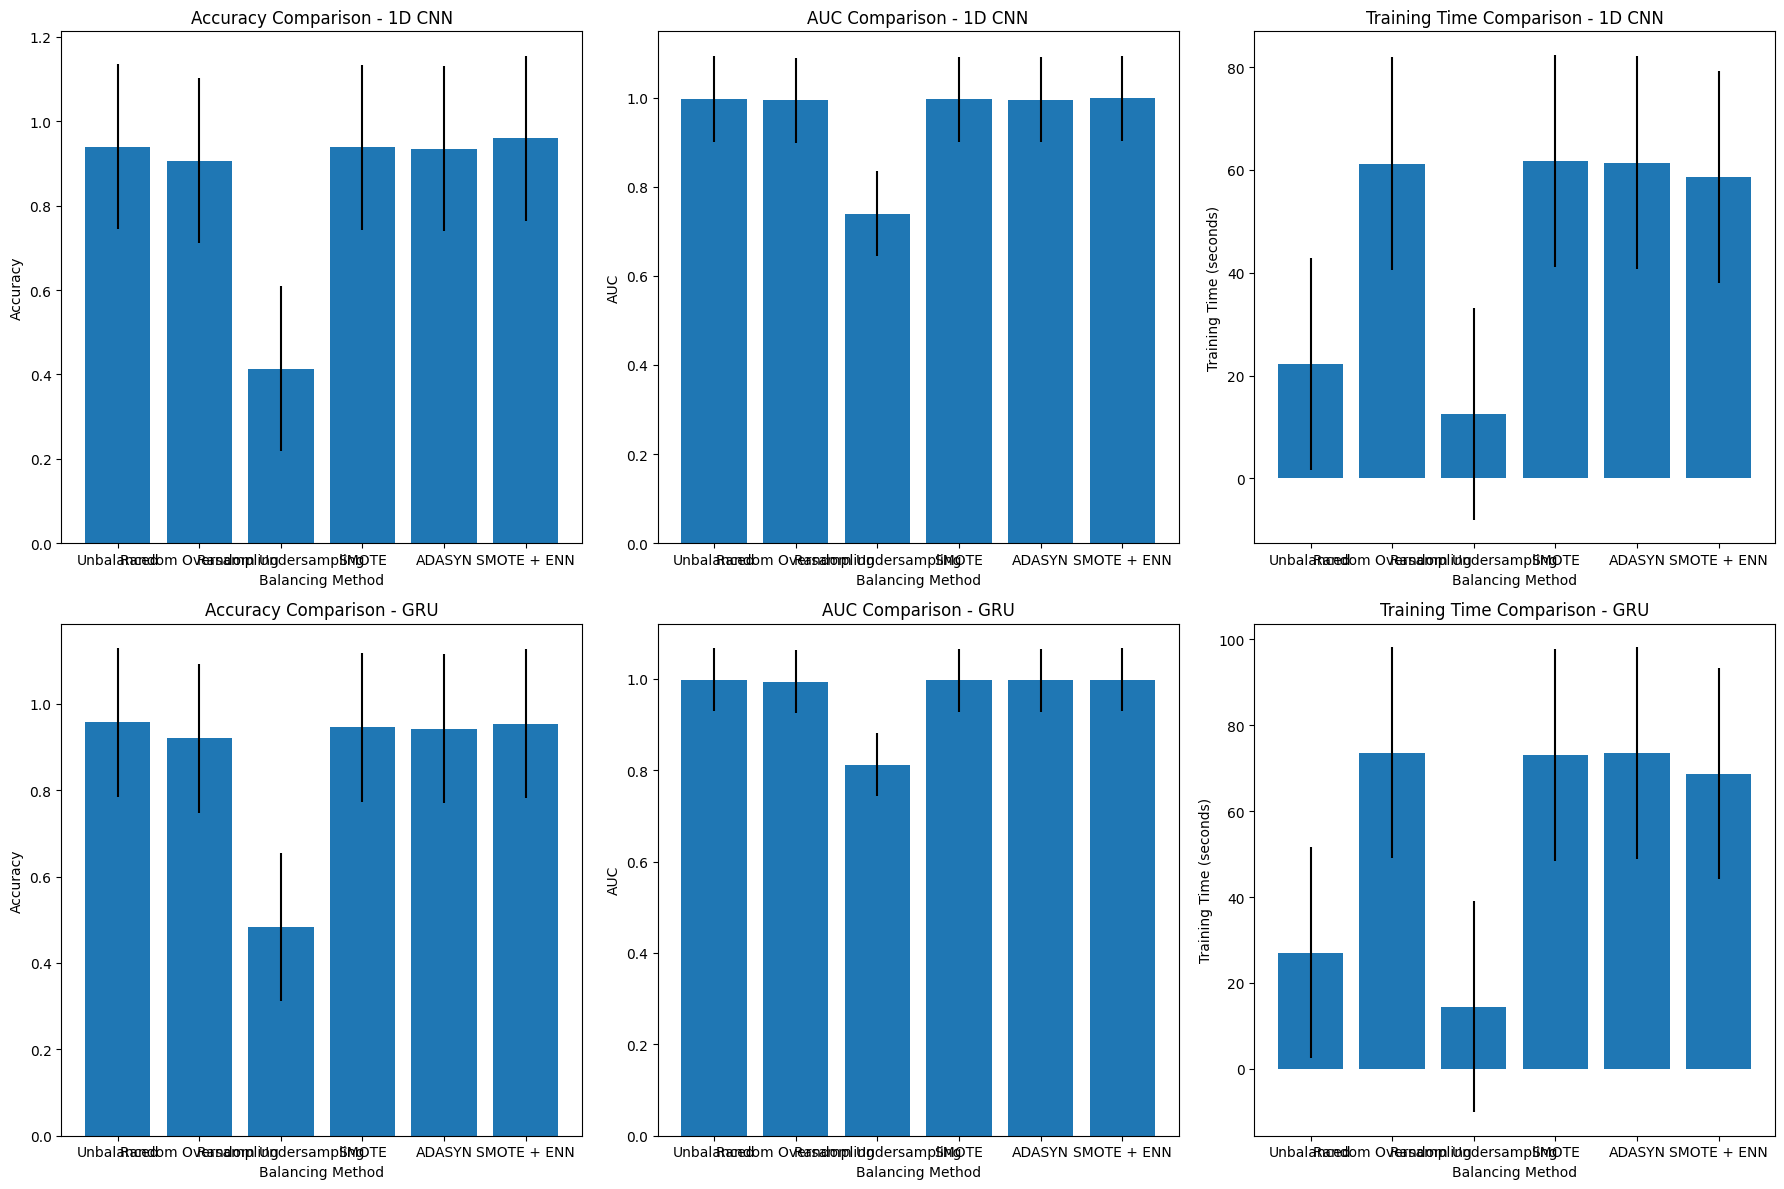

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Function to plot the results
def plot_results(results, architectures_names, filename='results_plot.png'):
    # Create a figure with subplots for accuracy, AUC, and training time for each architecture
    num_architectures = len(architectures_names)
    fig, axs = plt.subplots(num_architectures, 3, figsize=(18, 6 * num_architectures))

    # Loop through each architecture
    for arch_index, architecture_name in enumerate(architectures_names):
        # Plot accuracy results for each architecture
        accuracy_values = []
        for method_name, method_results in results.items():
            if architecture_name in method_results:
                accuracy_values.append(method_results[architecture_name]['accuracy'])
        axs[arch_index, 0].bar(results.keys(), accuracy_values, yerr=[np.std([method_results[architecture_name]['accuracy'] for method_results in results.values()]) for _ in results.keys()])
        axs[arch_index, 0].set_title(f'Accuracy Comparison - {architecture_name}')
        axs[arch_index, 0].set_xlabel('Balancing Method')
        axs[arch_index, 0].set_ylabel('Accuracy')

        # Plot AUC results for each architecture
        auc_values = []
        for method_name, method_results in results.items():
            if architecture_name in method_results:
                auc_values.append(method_results[architecture_name]['auc'])
        axs[arch_index, 1].bar(results.keys(), auc_values, yerr=[np.std([method_results[architecture_name]['auc'] for method_results in results.values()]) for _ in results.keys()])
        axs[arch_index, 1].set_title(f'AUC Comparison - {architecture_name}')
        axs[arch_index, 1].set_xlabel('Balancing Method')
        axs[arch_index, 1].set_ylabel('AUC')

        # Plot training time results for each architecture
        training_time_values = []
        for method_name, method_results in results.items():
            if architecture_name in method_results:
                training_time_values.append(method_results[architecture_name]['training_time'])
        axs[arch_index, 2].bar(results.keys(), training_time_values, yerr=[np.std([method_results[architecture_name]['training_time'] for method_results in results.values()]) for _ in results.keys()])
        axs[arch_index, 2].set_title(f'Training Time Comparison - {architecture_name}')
        axs[arch_index, 2].set_xlabel('Balancing Method')
        axs[arch_index, 2].set_ylabel('Training Time (seconds)')

    # Adjust layout
    plt.tight_layout()

    # Save the plot to a file
    plt.savefig(filename)  # Save the figure with the specified filename

    # Show the plot
    plt.show()

# Example usage:
# results = {
#     'Unbalanced': { '1D CNN': {'accuracy': 0.85, 'auc': 0.90, 'training_time': 120}, 'GRU': {'accuracy': 0.80, 'auc': 0.85, 'training_time': 130} },
#     'Random Oversampling': { '1D CNN': {'accuracy': 0.88, 'auc': 0.92, 'training_time': 110}, 'GRU': {'accuracy': 0.82, 'auc': 0.87, 'training_time': 125} },
#     ...
# }
architectures_names = ['1D CNN', 'GRU']
plot_results(results, architectures_names, filename='results_plot.png')

In [ ]:
# Function to save results
def save_results(model_name, accuracy, auc, report, training_time):
    results_dir = 'model_results'
    os.makedirs(results_dir, exist_ok=True)  # Create directory if it doesn't exist

    # Save results to a text file
    with open(os.path.join(results_dir, f'{model_name}_results.txt'), 'w') as f:
        f.write(f'Model Name: {model_name}\n')
        f.write(f'Test Accuracy: {accuracy:.4f}\n')
        f.write(f'Test AUC: {auc:.4f}\n')
        f.write(f'Training Time: {training_time:.2f} seconds\n')  # Save training time
        f.write('\nClassification Report:\n')
        f.write(report)



In [ ]:
import os  # Ensure os is imported

# Function to save results
def save_results(model_name, architecture, accuracy, auc, report, training_time):
    results_dir = 'model_results'
    os.makedirs(results_dir, exist_ok=True)  # Create directory if it doesn't exist

    # Save results to a text file
    with open(os.path.join(results_dir, f'{model_name}_results.txt'), 'w') as f:
        f.write(f'Model Name: {model_name}\n')
        f.write(f'DL Architecture: {architecture}\n')  # Save architecture
        f.write(f'Test Accuracy: {accuracy:.4f}\n')
        f.write(f'Test AUC: {auc:.4f}\n')
        f.write(f'Training Time: {training_time:.2f} seconds\n')  # Save training time
        f.write('\nClassification Report:\n')
        f.write(report)

### For a few DL architectures

In [ ]:
import os  # Ensure os is imported
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import to_categorical
import csv  # Import the csv module

# Function to save results
def save_results(model_name, architecture, accuracy, auc, report, training_time):
    results_dir = 'model_results'
    os.makedirs(results_dir, exist_ok=True)  # Create directory if it doesn't exist

    # Save results to a text file
    with open(os.path.join(results_dir, f'{model_name}_results.txt'), 'w') as f:
        f.write(f'Model Name: {model_name}\n')
        f.write(f'DL Architecture: {architecture}\n')  # Save architecture
        f.write(f'Test Accuracy: {accuracy:.4f}\n')
        f.write(f'Test AUC: {auc:.4f}\n')
        f.write(f'Training Time: {training_time:.2f} seconds\n')  # Save training time
        f.write('\nClassification Report:\n')
        f.write(report)

    # Save results to a CSV file
    csv_file_path = os.path.join(results_dir, 'results_summary.csv')

    # Check if the CSV file already exists
    file_exists = os.path.isfile(csv_file_path)

    # Write to the CSV file
    with open(csv_file_path, mode='a', newline='') as csvfile:
        fieldnames = ['Model Name', 'Architecture', 'Test Accuracy', 'Test AUC', 'Training Time', 'Classification Report']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Write the header only if the file is new
        if not file_exists:
            writer.writeheader()

        # Write the results
        writer.writerow({
            'Model Name': model_name,
            'Architecture': architecture,
            'Test Accuracy': accuracy,
            'Test AUC': auc,
            'Training Time': training_time,
            'Classification Report': report
        })

# Update the architectures dictionary to include the new model
architectures = {
    '1D CNN': create_1d_cnn_model,
    #'Bidirectional LSTM': create_bidirectional_lstm_model,
    'GRU': create_gru_model,
    #'LSTM': create_lstm_model,
    #'RNN': create_rnn_model,
    #'CNN + ResNet101': create_cnn_resnet_model  # New architecture added here
}

# Function to evaluate model with different balancing methods and architectures
def evaluate_balancing_methods(X, y, use_tpu=False, use_cuda=False):
    # Set up TPU or CUDA strategy
    '''if use_tpu:
        resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
        tf.config.experimental_connect_to_cluster(resolver)
        tf.tpu.experimental.initialize_tpu_system(resolver)
        strategy = tf.distribute.TPUStrategy(resolver)
    elif use_cuda:
        strategy = tf.distribute.MirroredStrategy()  # For multi-GPU
    else:
        strategy = tf.distribute.get_strategy()  # Default strategy (CPU or single GPU)
        '''

    methods = {
        'Unbalanced': lambda X, y: (X, y),  # Evaluate on the original unbalanced dataset
        'Random Oversampling': random_oversample,
        'Random Undersampling': random_undersample,
        'SMOTE': smote_balance,
        'ADASYN': adasyn_balance,
        'SMOTE + ENN': smote_enn_balance
    }

    results = {}

    # Start timing the evaluation process
    start_time = time.time()  # Record start time

    for method_name, method in methods.items():
        print("\n ******************************************************************************************************************************************* \n")
        print(f" *** \t Evaluating method: {method_name}")
        print("\n ********************************************************** \n")

        X_resampled, y_resampled = method(X, y)

        # Convert labels to categorical (if not already)
        if len(y_resampled.shape) == 1:  # Check if y_resampled is 1D (not one-hot encoded)
            y_resampled = to_categorical(y_resampled)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=np.argmax(y_resampled, axis=1), random_state=42)

        # Plot the distribution of the target variable for dataset
        plot_target_distribution(np.argmax(y_resampled, axis=1), method_name, filename=method_name + '_dataset_target_distribution.png')

        # Plot the distribution of the target variable for train and test sets
        plot_target_distribution(np.argmax(y_train, axis=1), method_name + ' - Train', filename=method_name + '_train_target_distribution.png')
        plot_target_distribution(np.argmax(y_test, axis=1), method_name + ' - Test', filename=method_name + '_test_target_distribution.png')

        for architecture_name, architecture in architectures.items():
            print("\n********************************************************** \n")
            print(f"*** \t Evaluating architecture: {architecture_name}")
            print("\n********************************************************** \n")
            # Reshape the input data to add a timesteps dimension
            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

            # Create the model within the strategy scope
            with strategy.scope():
                model = architecture(X_train.shape[1:])

                # Callbacks for early stopping, model checkpointing, and TensorBoard
                log_dir = os.path.join("logs", method_name, architecture_name, "fit")
                tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                model_checkpoint = ModelCheckpoint(f'{architecture_name}_best_model.h5', save_best_only=True)

                # Start timing the training process
                train_start_time = time.time()  # Record start time for training
                history = model.fit(X_train, y_train, epochs=50, batch_size=1024, #cv = 3,
                                    validation_split=0.2, verbose=0,
                                    callbacks=[early_stopping, model_checkpoint, tensorboard_callback])
                train_end_time = time.time()  # Record end time for training

                # Calculate training time for this fold
                training_time = train_end_time - train_start_time

                # Evaluate the model on the test set
                test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)

                # Generate predictions and evaluate
                y_pred = model.predict(X_test)
                y_pred_classes = np.argmax(y_pred, axis=1)
                y_true_classes = np.argmax(y_test, axis=1)

                # Print confusion matrix and classification report
                print(f"Confusion Matrix for method: {method_name} and architecture: {architecture_name}")
                print(confusion_matrix(y_true_classes, y_pred_classes))
                print(classification_report(y_true_classes, y_pred_classes))

                # Save results
                model_name = f"{method_name}_{architecture_name}"
                report = classification_report(y_true_classes, y_pred_classes)
                save_results(model_name, architecture_name, test_accuracy, test_auc, report, training_time)

                # Store results including training time
                if method_name not in results:
                    results[method_name] = {}
                results[method_name][architecture_name] = {
                    'accuracy': test_accuracy,
                    'auc': test_auc,
                    'training_time': training_time  # Store total training time
                }

                # Plot training-testing history for the last fold
                print("\n********************************************************** \n")
                print("\n********************************************************** \n")
                plot_history(history, architecture_name, method_name)
                print("\n********************************************************** \n")
                print("\n********************************************************** \n")

    # End timing the evaluation process
    end_time = time.time()  # Record end time
    total_time = end_time - start_time  # Calculate total elapsed time

    # Print total evaluation time
    print(f"Total evaluation time: {total_time:.2f} seconds")

    return results

# Example usage:
#results = evaluate_balancing_methods(X, y, use_tpu=True)  # Use TPU
# results = evaluate_balancing_methods(X, y, use_cuda=True)  # Use CUDA (GPU)

In [ ]:

# Use the Tensorboard

tensorboard --logdir logs

##### Main execution block


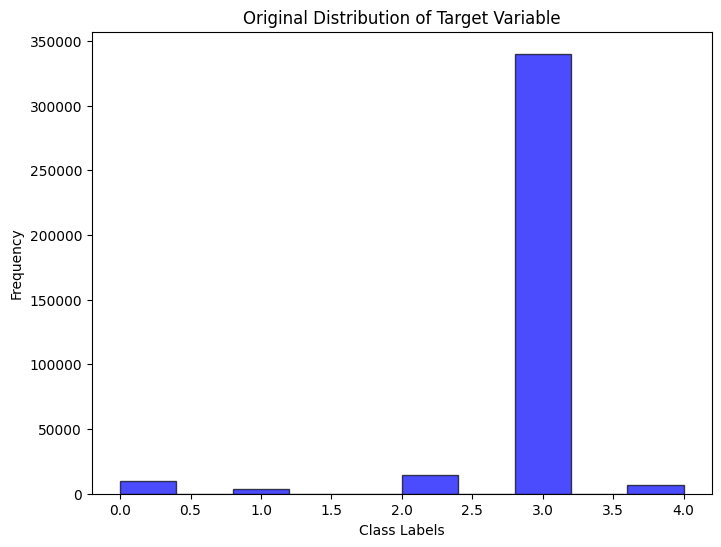

# ******************************************************************************************************************************************* 

# Evaluate all balancing methods and architectures: 


 ******************************************************************************************************************************************* 

 *** 	 Evaluating method: Unbalanced

 ********************************************************** 



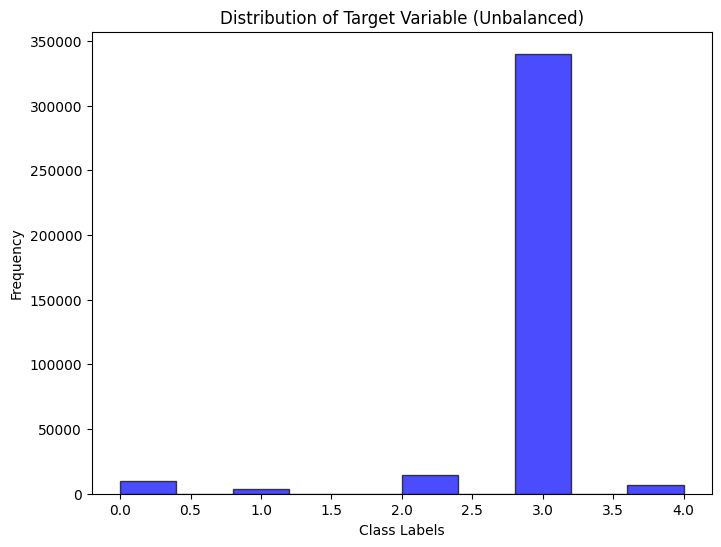

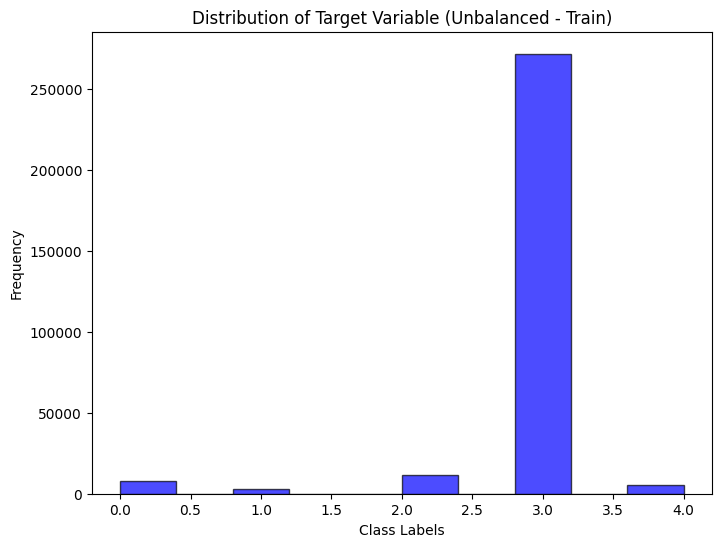

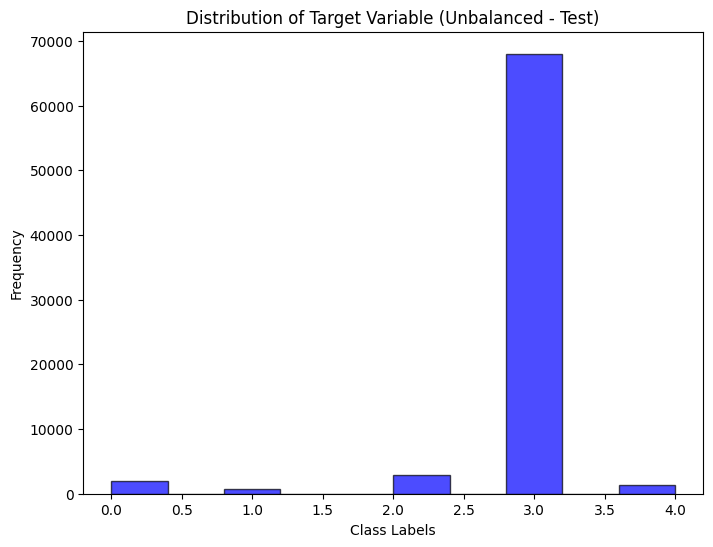


********************************************************** 

*** 	 Evaluating architecture: 1D CNN

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2342/2342 [==============================] - 18s 7ms/step
Confusion Matrix for method: Unbalanced and architecture: 1D CNN
[[ 1851     0   158     0     1]
 [    1   646     2    13     0]
 [  872     0  2023    22     2]
 [    2    67    70 67869     6]
 [    0     0     3    93  1232]]
              precision    recall  f1-score   support

           0       0.68      0.92      0.78      2010
           1       0.91      0.98      0.94       662
           2       0.90      0.69      0.78      2919
           3       1.00      1.00      1.00     68014
           4       0.99      0.93      0.96      1328

    accuracy                           0.98     74933
   macro avg       0.89      0.90      0.89     74933
weighted avg       0.98      0.98      0.98     74933


********************************************************** 


********************************************************** 



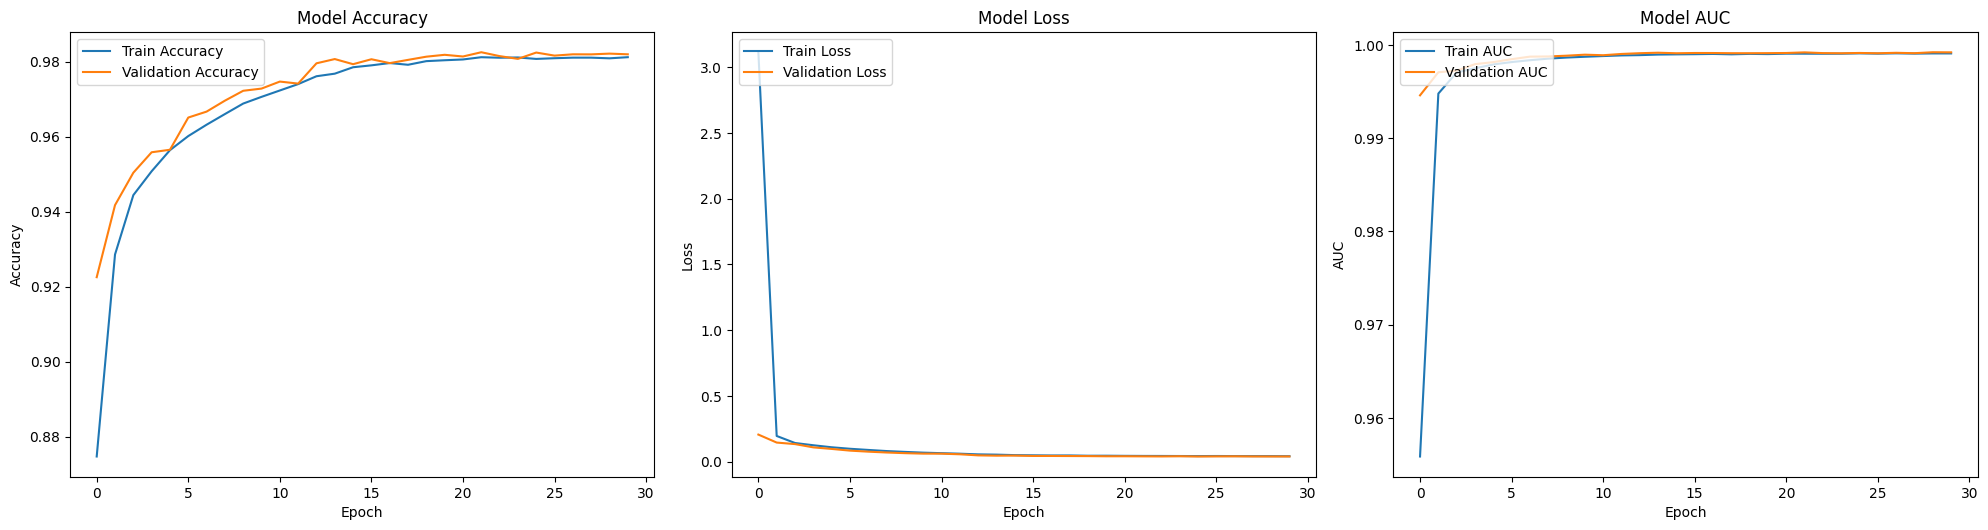


********************************************************** 


********************************************************** 


********************************************************** 

*** 	 Evaluating architecture: GRU

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2342/2342 [==============================] - 20s 8ms/step
Confusion Matrix for method: Unbalanced and architecture: GRU
[[ 1679     0   330     0     1]
 [    0   656     0     6     0]
 [  341     0  2555    21     2]
 [    1    73    64 67871     5]
 [    2     0     2    96  1228]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2010
           1       0.90      0.99      0.94       662
           2       0.87      0.88      0.87      2919
           3       1.00      1.00      1.00     68014
           4       0.99      0.92      0.96      1328

    accuracy                           0.99     74933
   macro avg       0.92      0.92      0.92     74933
weighted avg       0.99      0.99      0.99     74933


********************************************************** 


********************************************************** 



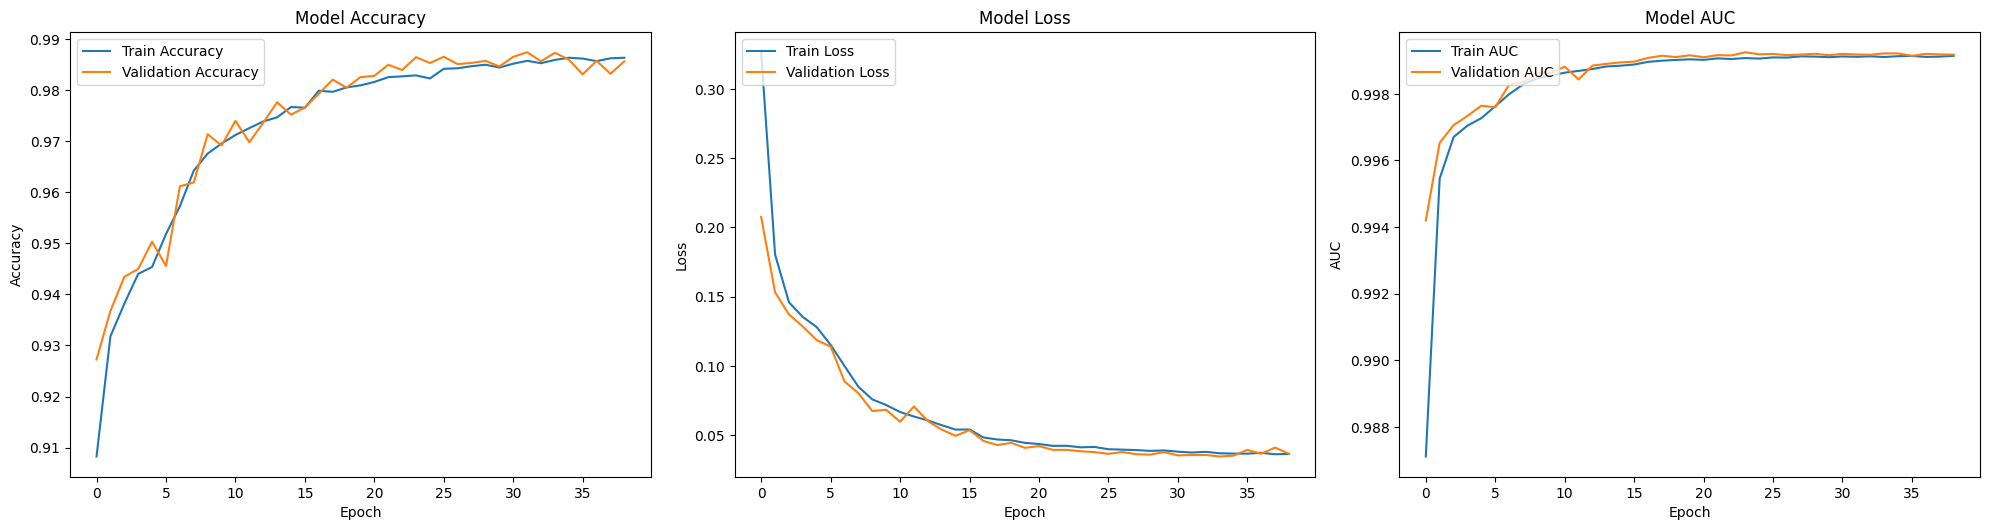


********************************************************** 


********************************************************** 


 ******************************************************************************************************************************************* 

 *** 	 Evaluating method: Random Oversampling

 ********************************************************** 



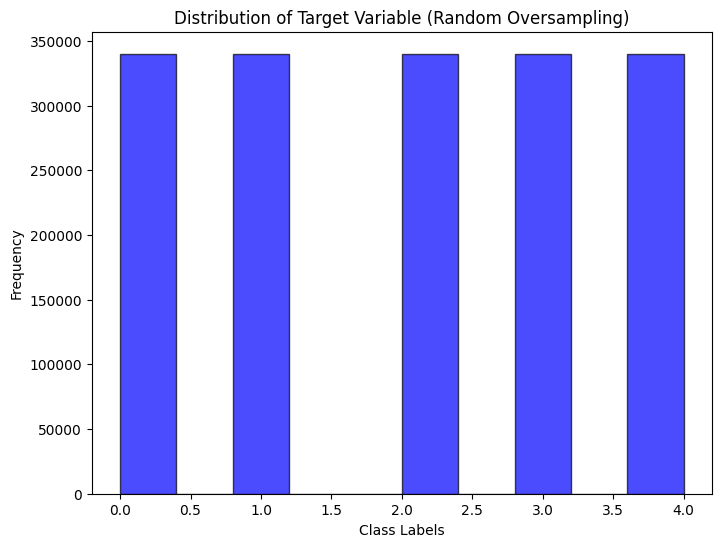

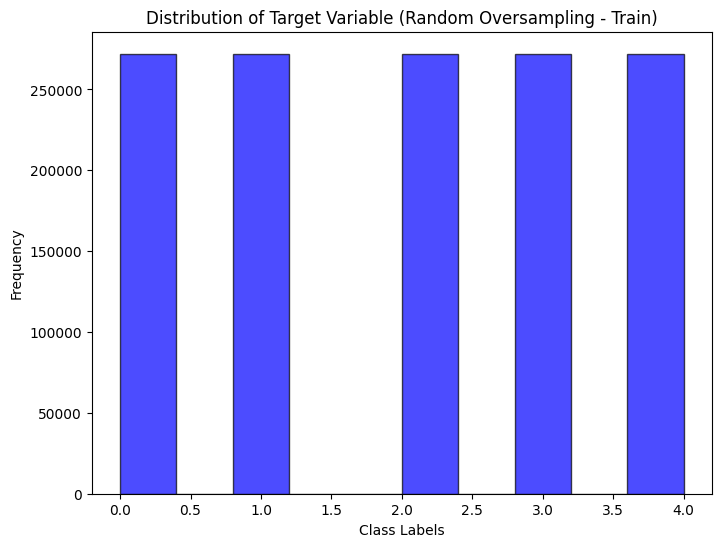

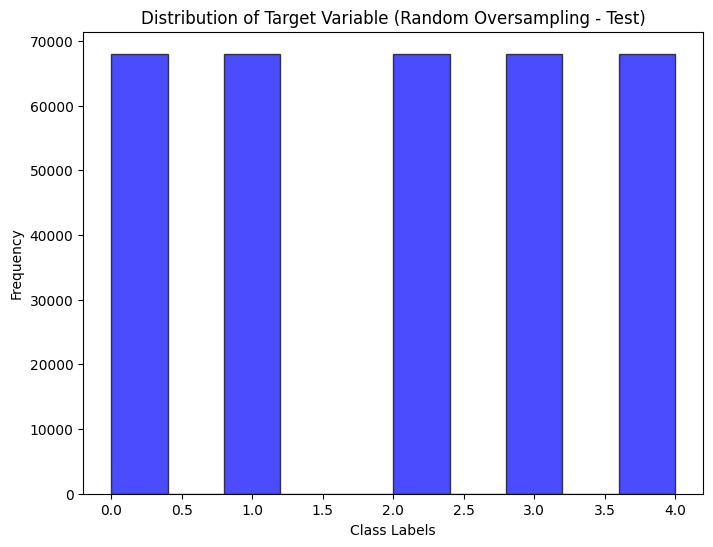


********************************************************** 

*** 	 Evaluating architecture: 1D CNN

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10628/10628 [==============================] - 82s 8ms/step
Confusion Matrix for method: Random Oversampling and architecture: 1D CNN
[[66385     0  1598     0    30]
 [    0 68013     0     0     0]
 [24330     0 43618    14    51]
 [    4   105   102 67728    75]
 [   59    18    38  4369 63529]]
              precision    recall  f1-score   support

           0       0.73      0.98      0.84     68013
           1       1.00      1.00      1.00     68013
           2       0.96      0.64      0.77     68013
           3       0.94      1.00      0.97     68014
           4       1.00      0.93      0.96     68013

    accuracy                           0.91    340066
   macro avg       0.93      0.91      0.91    340066
weighted avg       0.93      0.91      0.91    340066


********************************************************** 


********************************************************** 



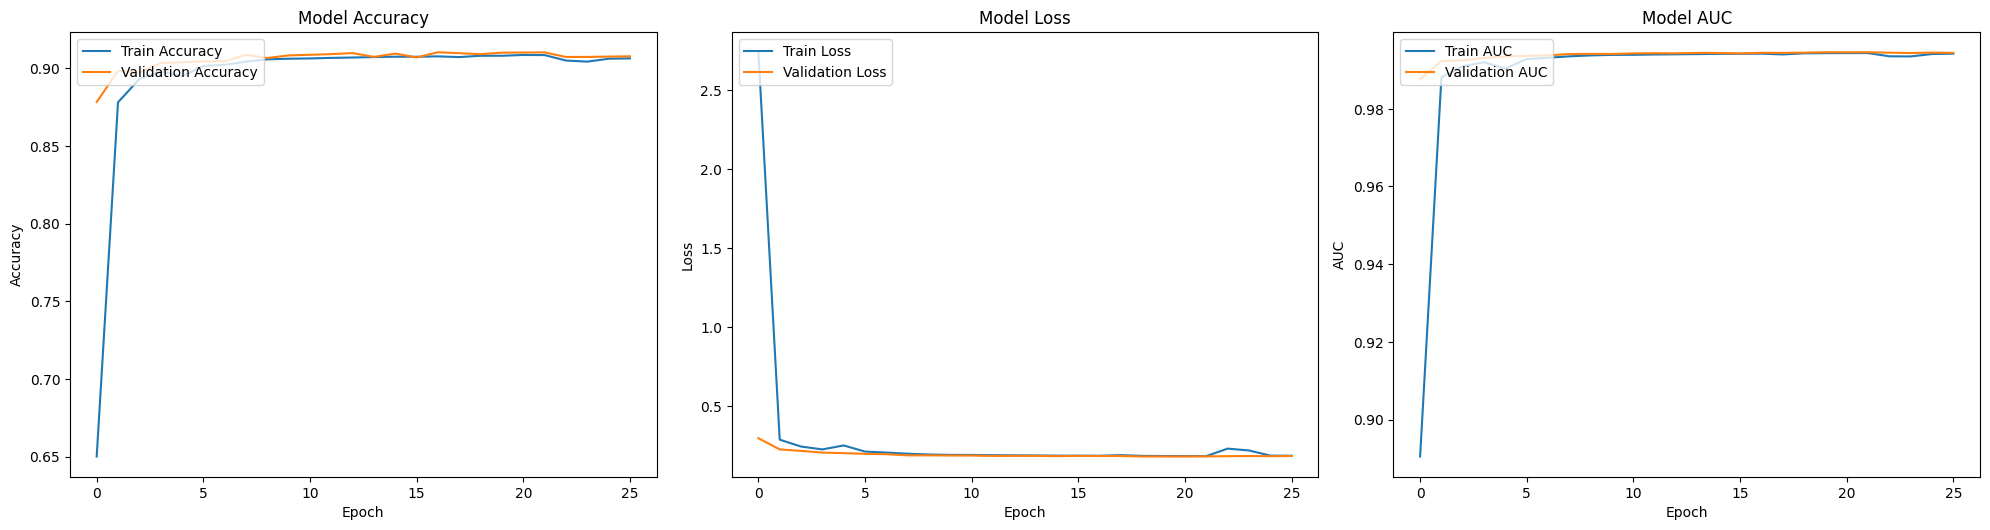


********************************************************** 


********************************************************** 


********************************************************** 

*** 	 Evaluating architecture: GRU

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10628/10628 [==============================] - 89s 8ms/step
Confusion Matrix for method: Random Oversampling and architecture: GRU
[[65029     0  2984     0     0]
 [    0 68013     0     0     0]
 [ 6512     0 61327   130    44]
 [    1   110    83 67443   377]
 [   25     0     0  3868 64120]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     68013
           1       1.00      1.00      1.00     68013
           2       0.95      0.90      0.93     68013
           3       0.94      0.99      0.97     68014
           4       0.99      0.94      0.97     68013

    accuracy                           0.96    340066
   macro avg       0.96      0.96      0.96    340066
weighted avg       0.96      0.96      0.96    340066


********************************************************** 


********************************************************** 



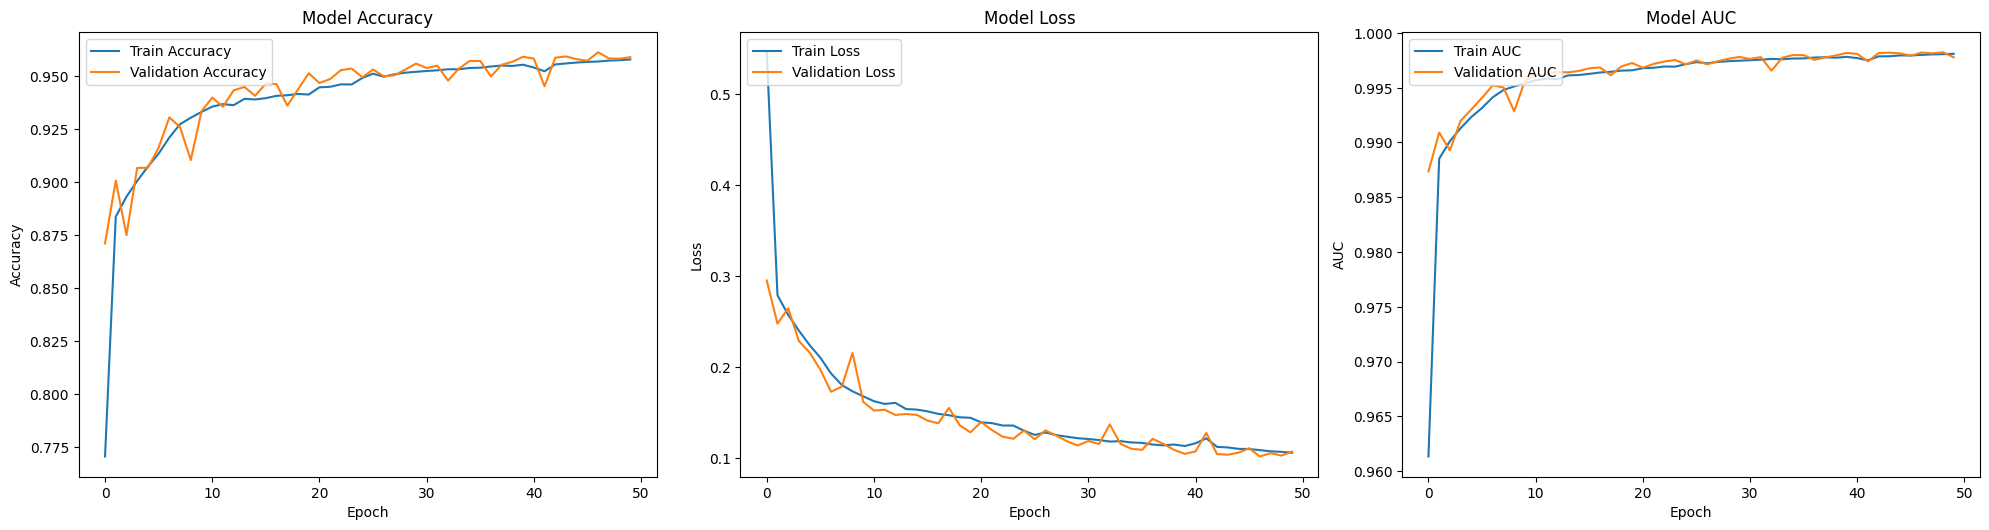


********************************************************** 


********************************************************** 


 ******************************************************************************************************************************************* 

 *** 	 Evaluating method: Random Undersampling

 ********************************************************** 



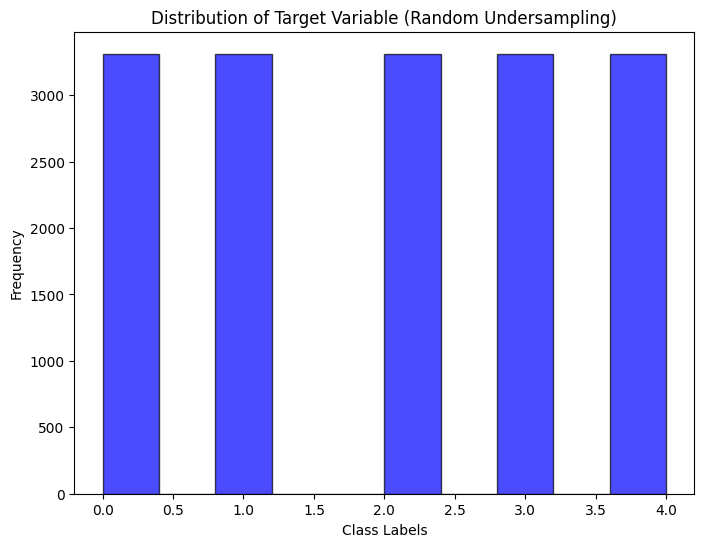

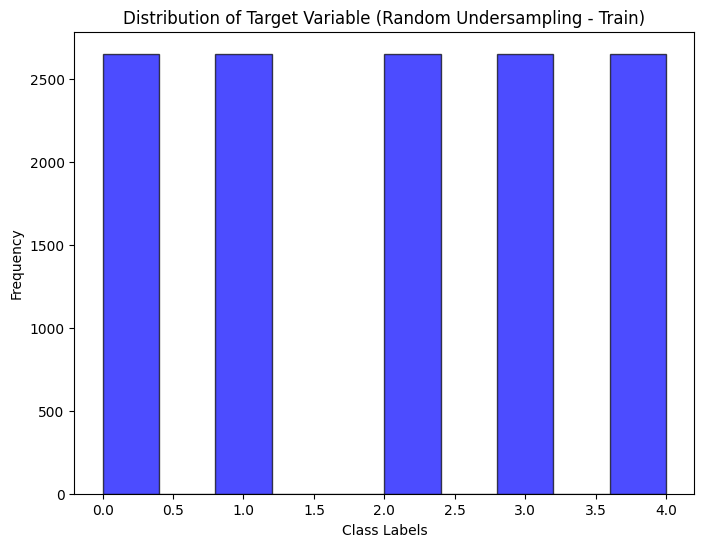

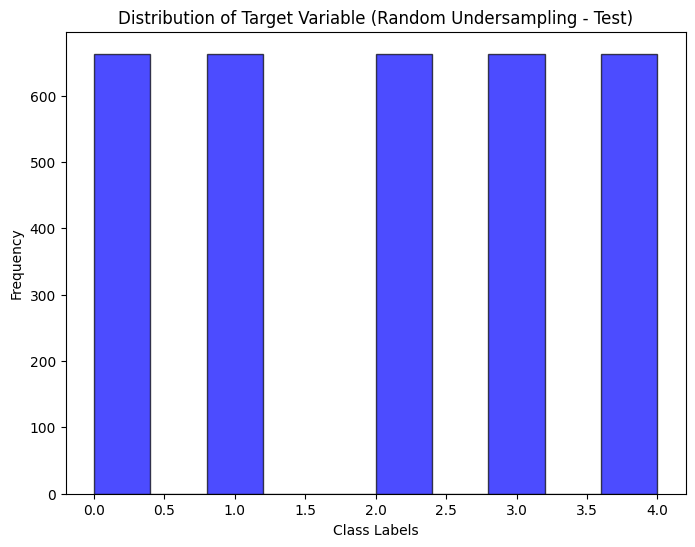


********************************************************** 

*** 	 Evaluating architecture: 1D CNN

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


104/104 [==============================] - 2s 9ms/step
Confusion Matrix for method: Random Undersampling and architecture: 1D CNN
[[456   0  14   0 193]
 [  2 594  47   0  19]
 [154  27 292   0 189]
 [  0   2  63 572  26]
 [  0   4   0  51 607]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       663
           1       0.95      0.90      0.92       662
           2       0.70      0.44      0.54       662
           3       0.92      0.86      0.89       663
           4       0.59      0.92      0.72       662

    accuracy                           0.76      3312
   macro avg       0.78      0.76      0.76      3312
weighted avg       0.78      0.76      0.76      3312


********************************************************** 


********************************************************** 



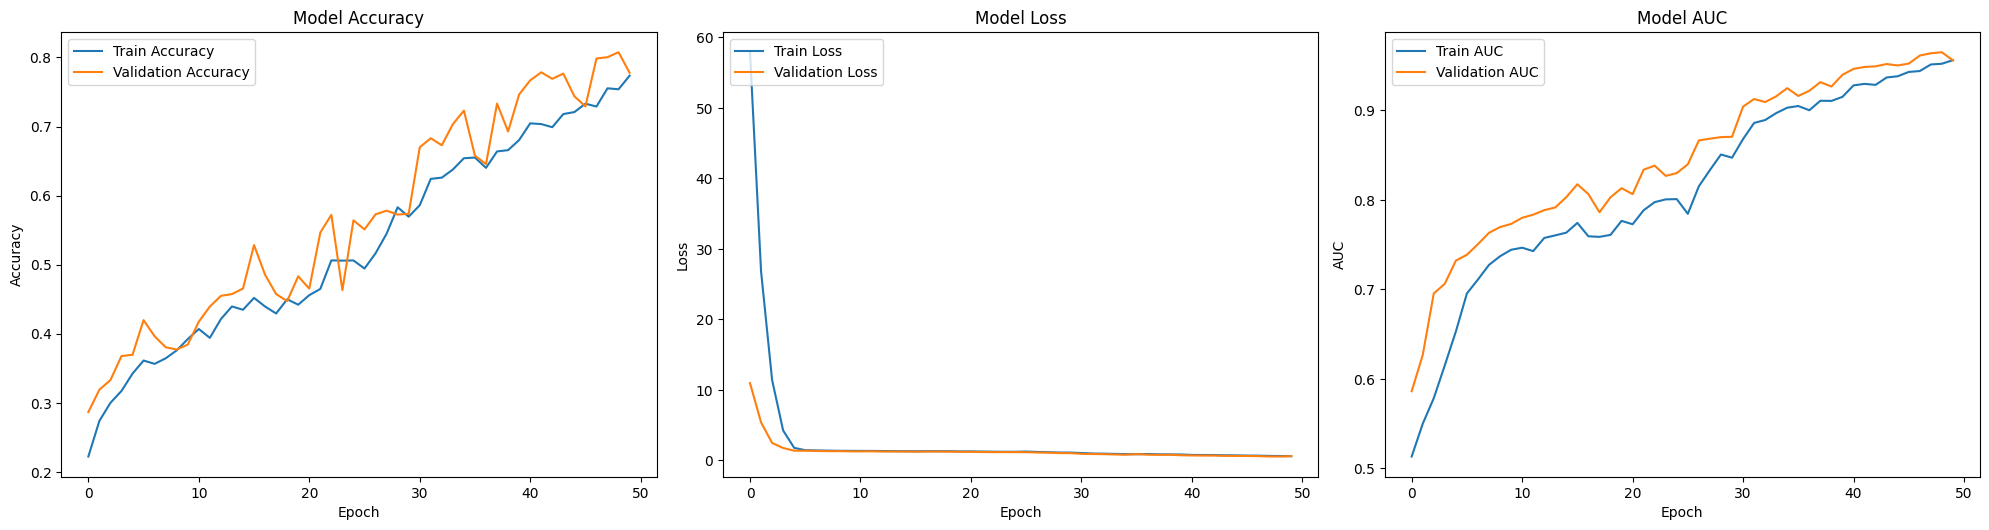


********************************************************** 


********************************************************** 


********************************************************** 

*** 	 Evaluating architecture: GRU

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


104/104 [==============================] - 2s 10ms/step
Confusion Matrix for method: Random Undersampling and architecture: GRU
[[628   1  25   0   9]
 [  1 641  18   0   2]
 [216  10 420   2  14]
 [  0   2  13 645   3]
 [  7   9  40  52 554]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       663
           1       0.97      0.97      0.97       662
           2       0.81      0.63      0.71       662
           3       0.92      0.97      0.95       663
           4       0.95      0.84      0.89       662

    accuracy                           0.87      3312
   macro avg       0.88      0.87      0.87      3312
weighted avg       0.88      0.87      0.87      3312


********************************************************** 


********************************************************** 



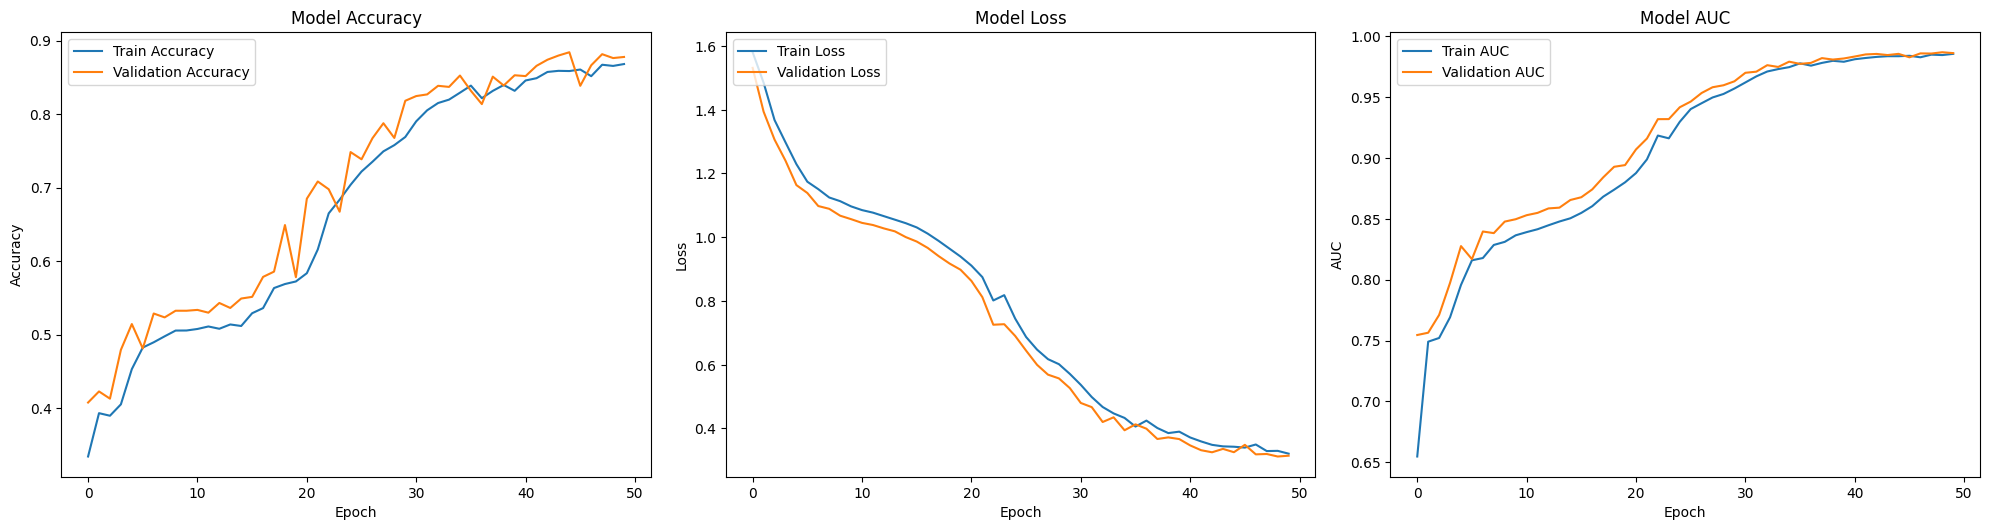


********************************************************** 


********************************************************** 


 ******************************************************************************************************************************************* 

 *** 	 Evaluating method: SMOTE

 ********************************************************** 



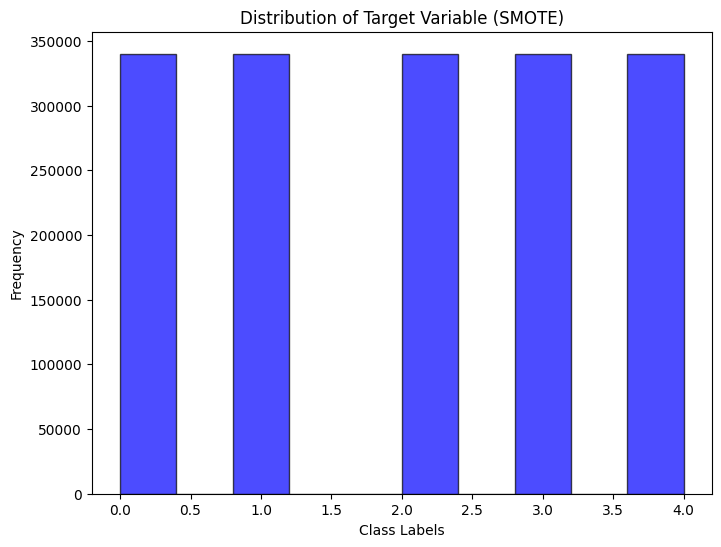

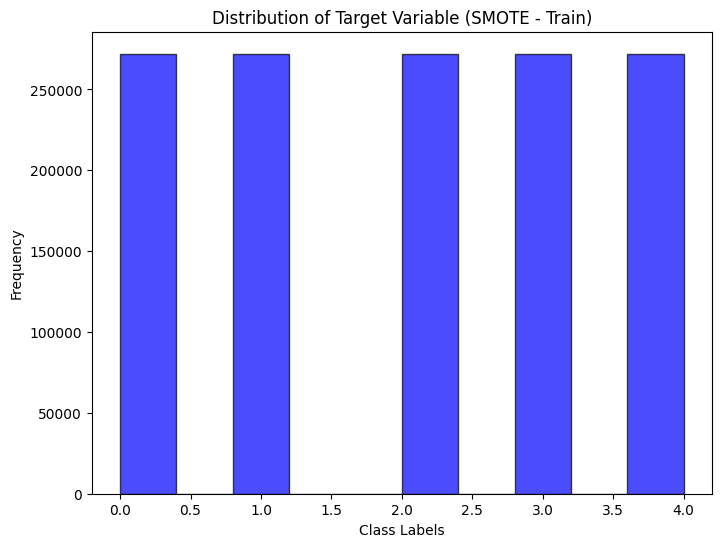

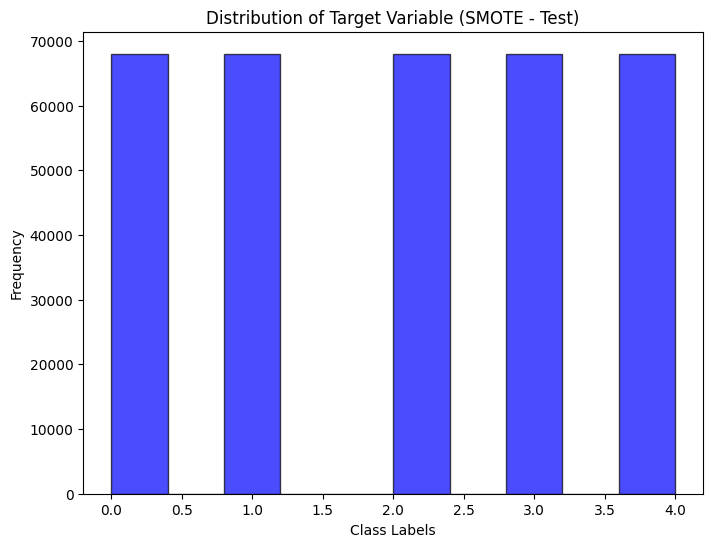


********************************************************** 

*** 	 Evaluating architecture: 1D CNN

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10628/10628 [==============================] - 82s 8ms/step
Confusion Matrix for method: SMOTE and architecture: 1D CNN
[[66828     0  1185     0     0]
 [    0 68010     1     2     0]
 [13881     0 54107    15    10]
 [    2    77   103 67800    32]
 [    3     0    46  2597 65367]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     68013
           1       1.00      1.00      1.00     68013
           2       0.98      0.80      0.88     68013
           3       0.96      1.00      0.98     68014
           4       1.00      0.96      0.98     68013

    accuracy                           0.95    340066
   macro avg       0.95      0.95      0.95    340066
weighted avg       0.95      0.95      0.95    340066


********************************************************** 


********************************************************** 



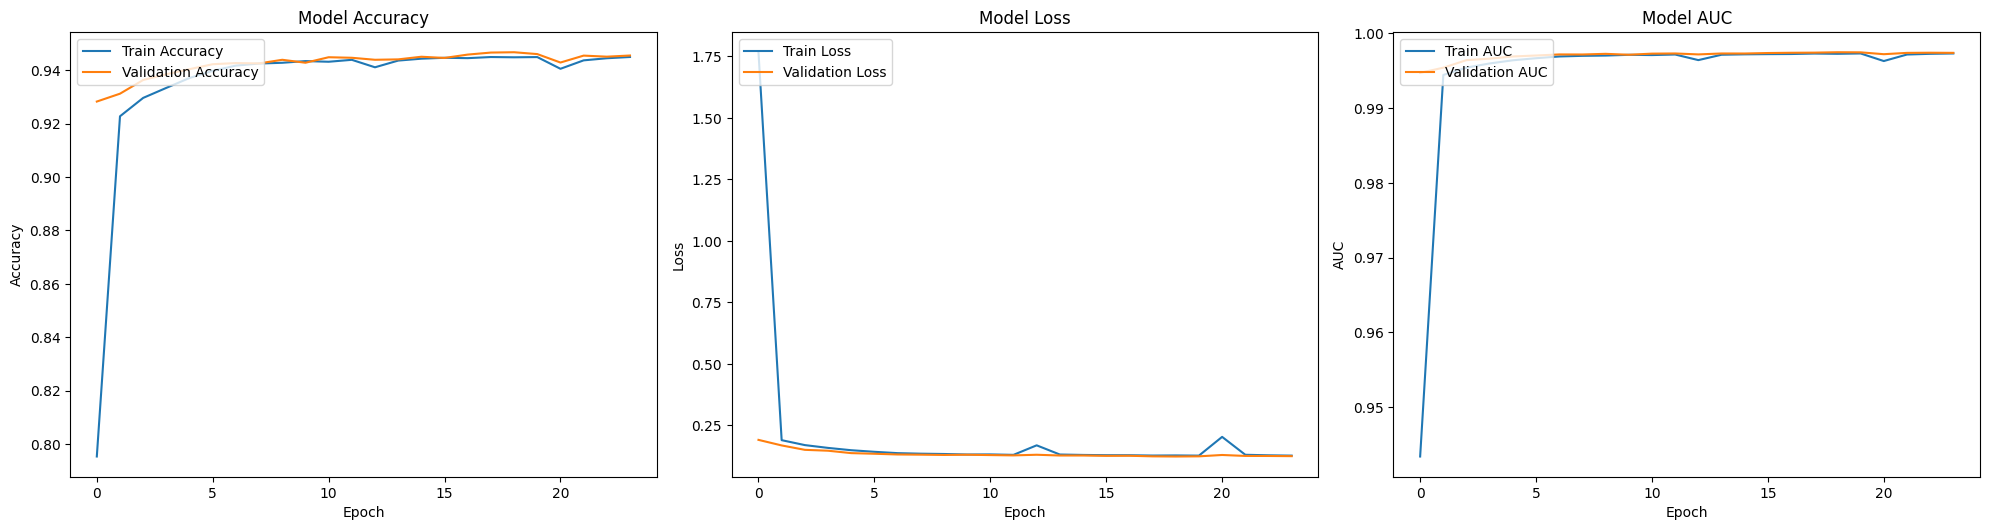


********************************************************** 


********************************************************** 


********************************************************** 

*** 	 Evaluating architecture: GRU

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10628/10628 [==============================] - 87s 8ms/step
Confusion Matrix for method: SMOTE and architecture: GRU
[[65300     0  2706     0     7]
 [    0 67988    10    12     3]
 [ 7715     3 60247    23    25]
 [    1   113    95 67740    65]
 [    0     1    27  2408 65577]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93     68013
           1       1.00      1.00      1.00     68013
           2       0.96      0.89      0.92     68013
           3       0.97      1.00      0.98     68014
           4       1.00      0.96      0.98     68013

    accuracy                           0.96    340066
   macro avg       0.96      0.96      0.96    340066
weighted avg       0.96      0.96      0.96    340066


********************************************************** 


********************************************************** 



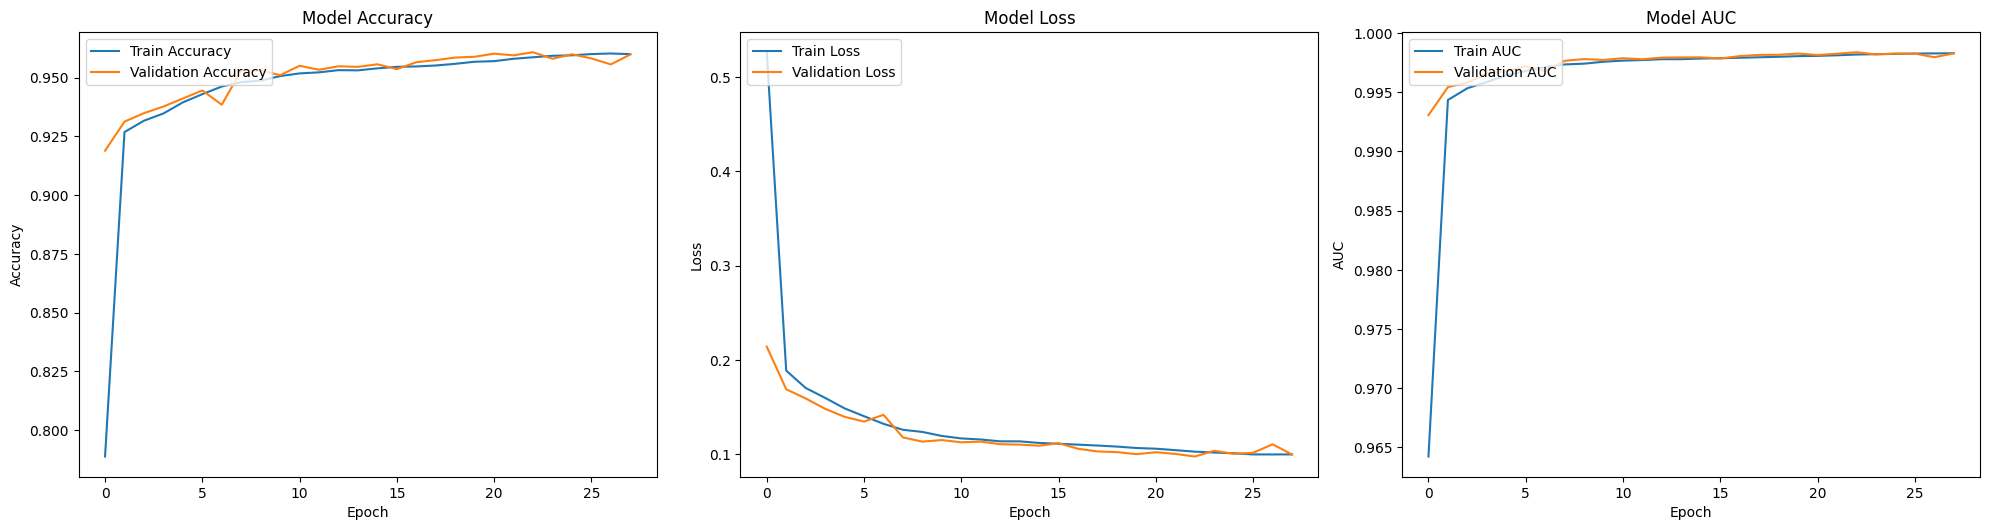


********************************************************** 


********************************************************** 


 ******************************************************************************************************************************************* 

 *** 	 Evaluating method: ADASYN

 ********************************************************** 



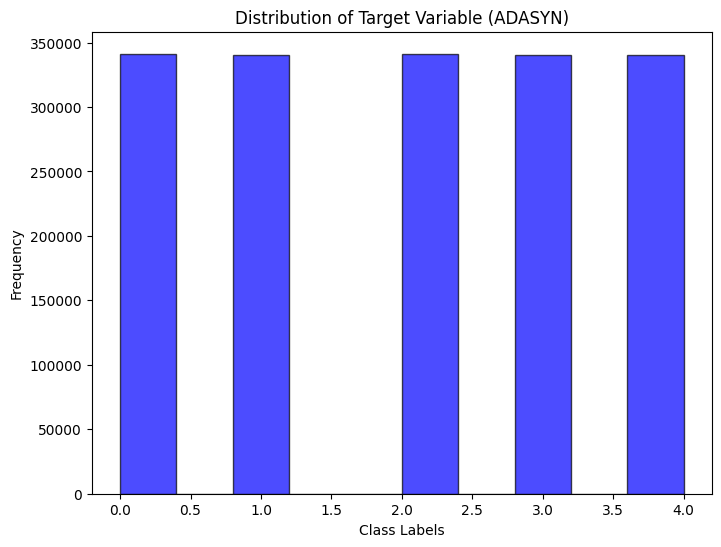

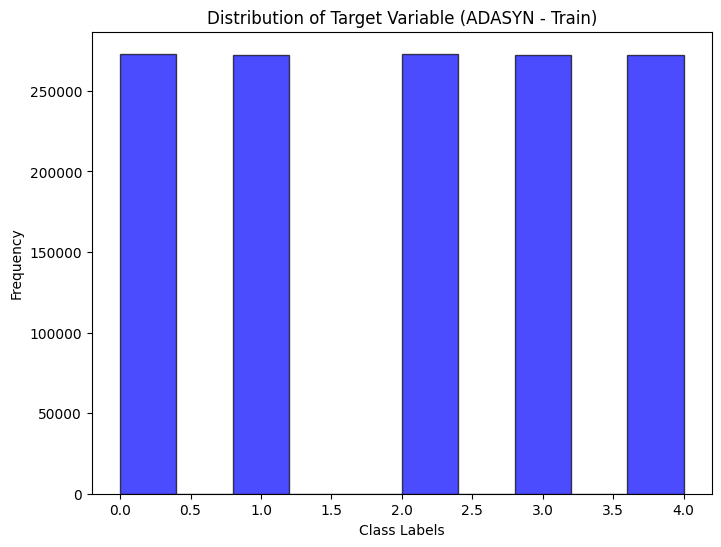

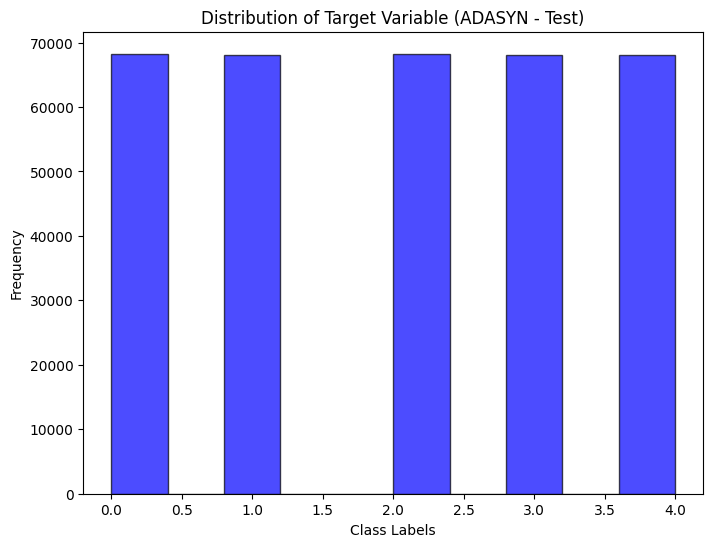


********************************************************** 

*** 	 Evaluating architecture: 1D CNN

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10644/10644 [==============================] - 82s 8ms/step
Confusion Matrix for method: ADASYN and architecture: 1D CNN
[[67804     0   421     0     6]
 [    0 68000     0     6     0]
 [14318     0 53921    14    14]
 [    1    77   108 67804    23]
 [    8     1    42  3841 64183]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     68231
           1       1.00      1.00      1.00     68006
           2       0.99      0.79      0.88     68267
           3       0.95      1.00      0.97     68013
           4       1.00      0.94      0.97     68075

    accuracy                           0.94    340592
   macro avg       0.95      0.94      0.94    340592
weighted avg       0.95      0.94      0.94    340592


********************************************************** 


********************************************************** 



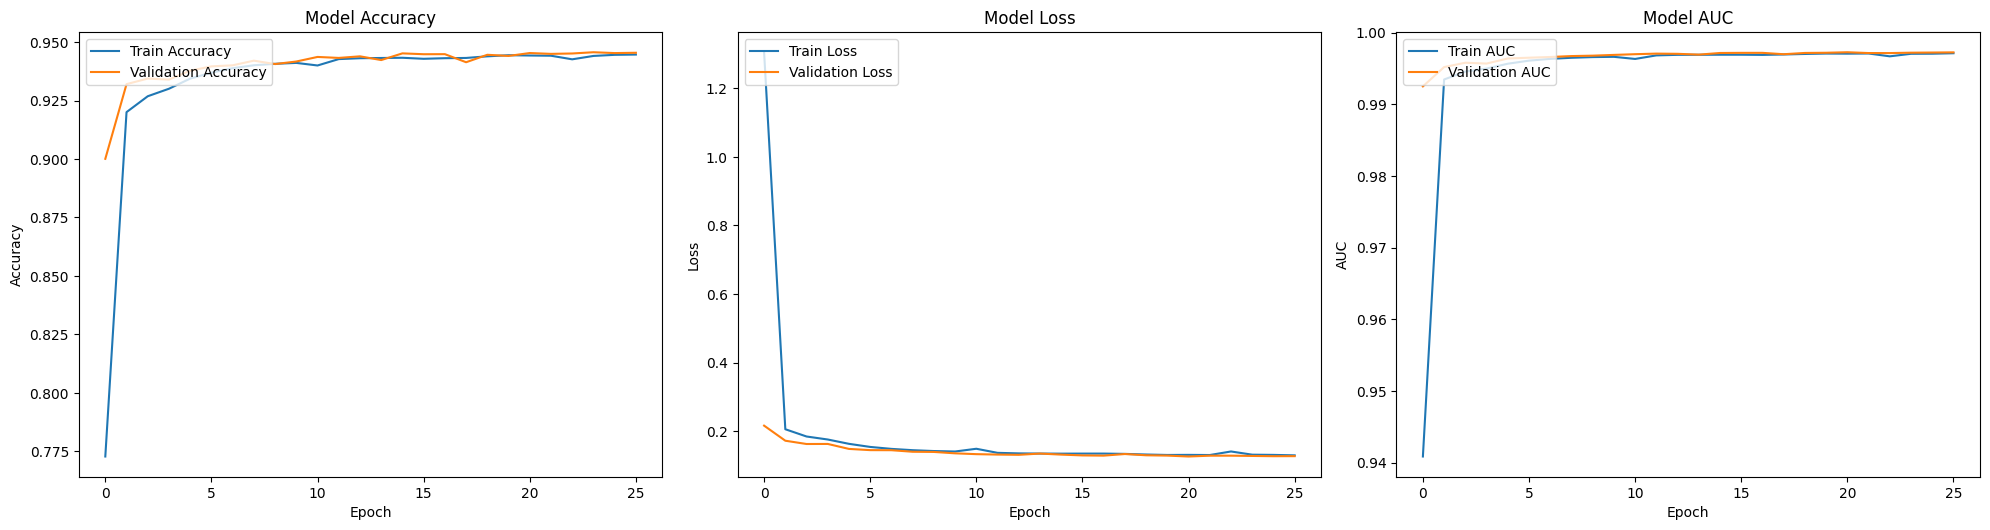


********************************************************** 


********************************************************** 


********************************************************** 

*** 	 Evaluating architecture: GRU

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10644/10644 [==============================] - 87s 8ms/step
Confusion Matrix for method: ADASYN and architecture: GRU
[[66166     0  2065     0     0]
 [    0 67999     0     7     0]
 [ 6462     0 61790    15     0]
 [    2    78    82 67708   143]
 [    9     0     8  2115 65943]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     68231
           1       1.00      1.00      1.00     68006
           2       0.97      0.91      0.93     68267
           3       0.97      1.00      0.98     68013
           4       1.00      0.97      0.98     68075

    accuracy                           0.97    340592
   macro avg       0.97      0.97      0.97    340592
weighted avg       0.97      0.97      0.97    340592


********************************************************** 


********************************************************** 



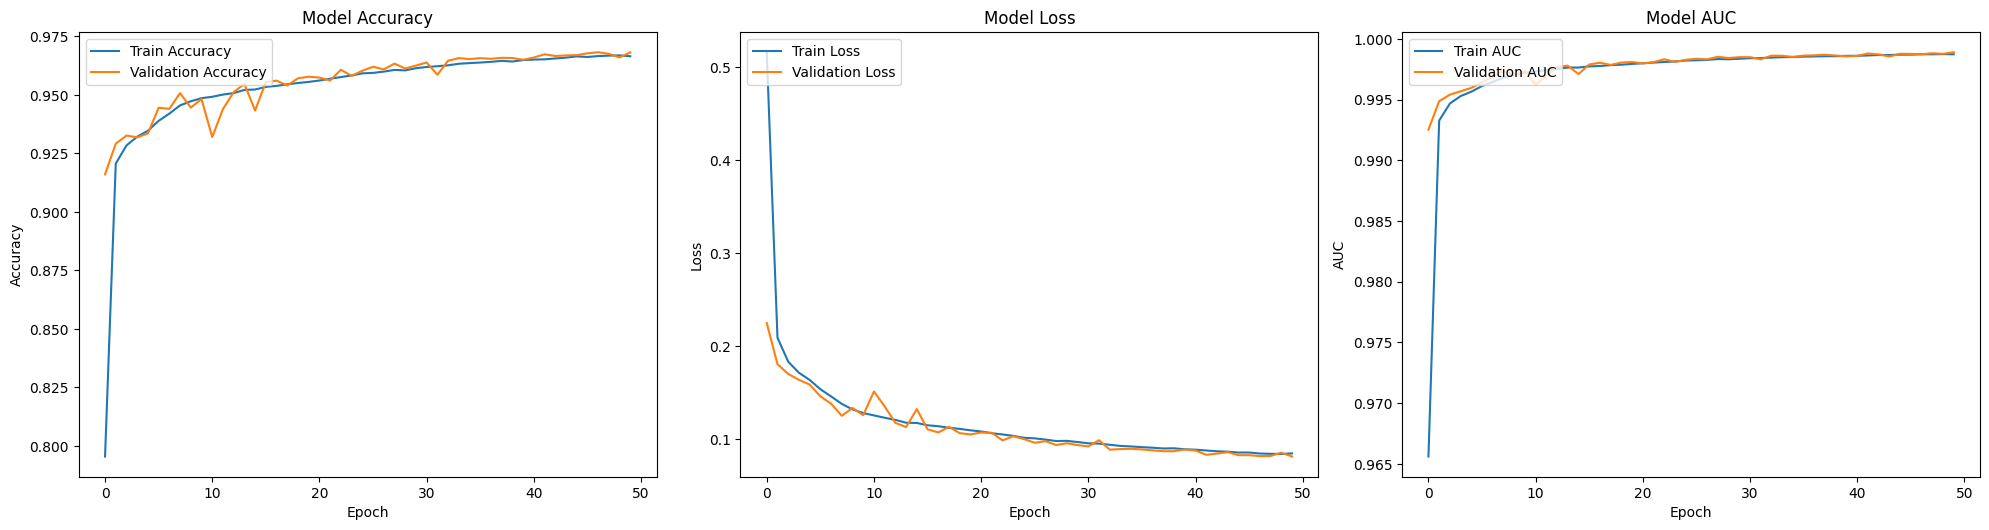


********************************************************** 


********************************************************** 


 ******************************************************************************************************************************************* 

 *** 	 Evaluating method: SMOTE + ENN

 ********************************************************** 



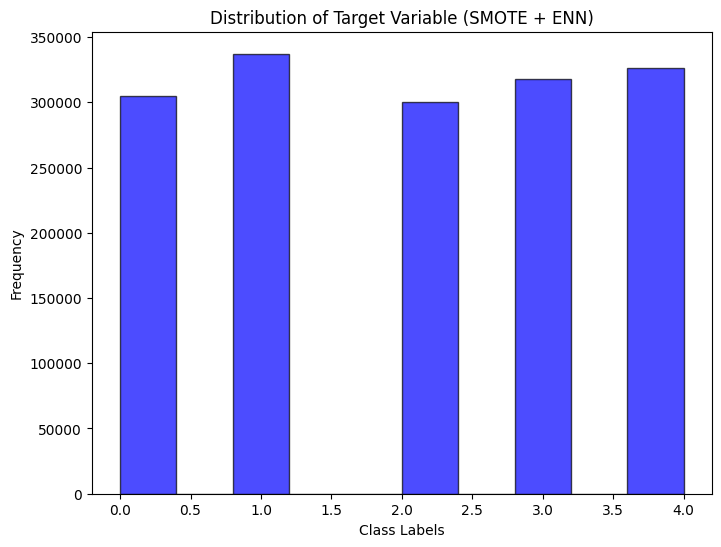

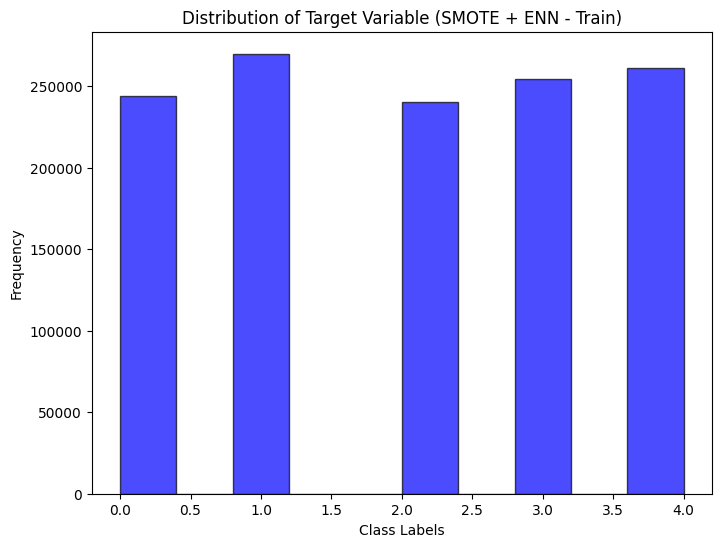

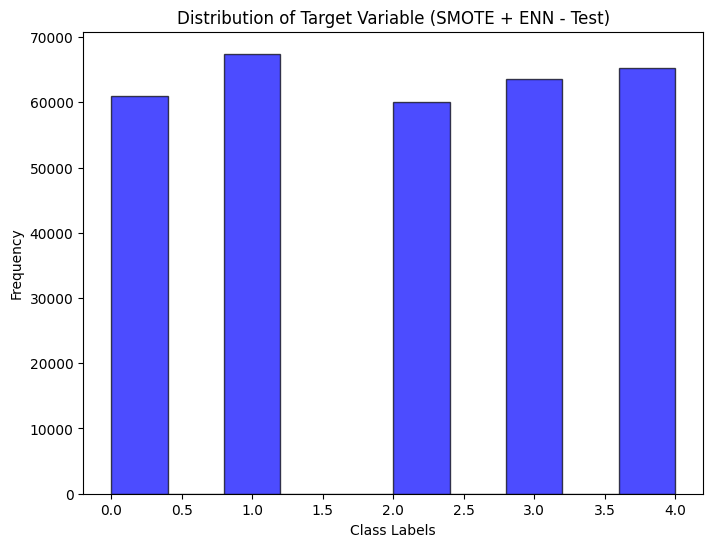


********************************************************** 

*** 	 Evaluating architecture: 1D CNN

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9922/9922 [==============================] - 76s 8ms/step
Confusion Matrix for method: SMOTE + ENN and architecture: 1D CNN
[[60641     0   381     0     9]
 [    0 67444     9     0     0]
 [ 9856     0 50228     2    11]
 [    0     1    29 63605     9]
 [    6     0    33  1631 63608]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     61031
           1       1.00      1.00      1.00     67453
           2       0.99      0.84      0.91     60097
           3       0.97      1.00      0.99     63644
           4       1.00      0.97      0.99     65278

    accuracy                           0.96    317503
   macro avg       0.97      0.96      0.96    317503
weighted avg       0.97      0.96      0.96    317503


********************************************************** 


********************************************************** 



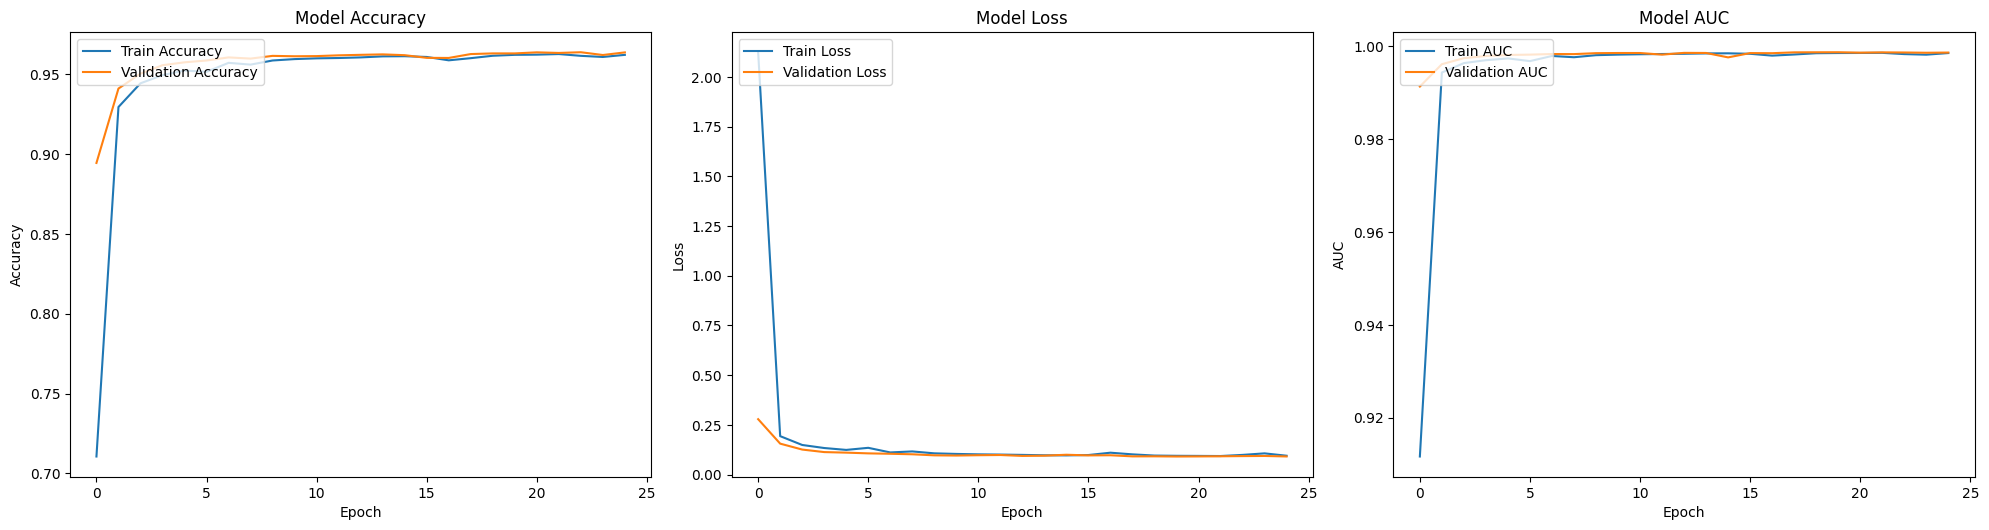


********************************************************** 


********************************************************** 


********************************************************** 

*** 	 Evaluating architecture: GRU

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9922/9922 [==============================] - 81s 8ms/step
Confusion Matrix for method: SMOTE + ENN and architecture: GRU
[[58786     0  2238     1     6]
 [    0 67440     6     5     2]
 [ 5066     6 54932     1    92]
 [    0     6    35 63590    13]
 [   15    11    54  1508 63690]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     61031
           1       1.00      1.00      1.00     67453
           2       0.96      0.91      0.94     60097
           3       0.98      1.00      0.99     63644
           4       1.00      0.98      0.99     65278

    accuracy                           0.97    317503
   macro avg       0.97      0.97      0.97    317503
weighted avg       0.97      0.97      0.97    317503


********************************************************** 


********************************************************** 




********************************************************** 


********************************************************** 

Total evaluation time: 5328.97 seconds


In [ ]:
# Main execution block
if __name__ == "__main__":

    # Load and preprocess the dataset
    file_path = '/content/WSN-DS.csv'  # Replace with your actual data file
    label_column = 'Attack type'  # Replace with the actual label column name
    X, y = load_and_preprocess_data(file_path, label_column)

    # Convert one-hot encoded labels to class indices
    y_classes = np.argmax(y, axis=1)

    # Plot the original distribution of the target variable
    plt.figure(figsize=(8, 6))
    plt.hist(y_classes, bins=10, alpha=0.7, color='blue', edgecolor='black')  # Use y_classes
    plt.title('Original Distribution of Target Variable')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.show()

    print("# ******************************************************************************************************************************************* \n")
    print("# Evaluate all balancing methods and architectures: \n")
    # Evaluate all balancing methods and architectures

    results = evaluate_balancing_methods(X, y) #, use_tpu=True)  # Use TPU
    model_names = list(architectures.keys())


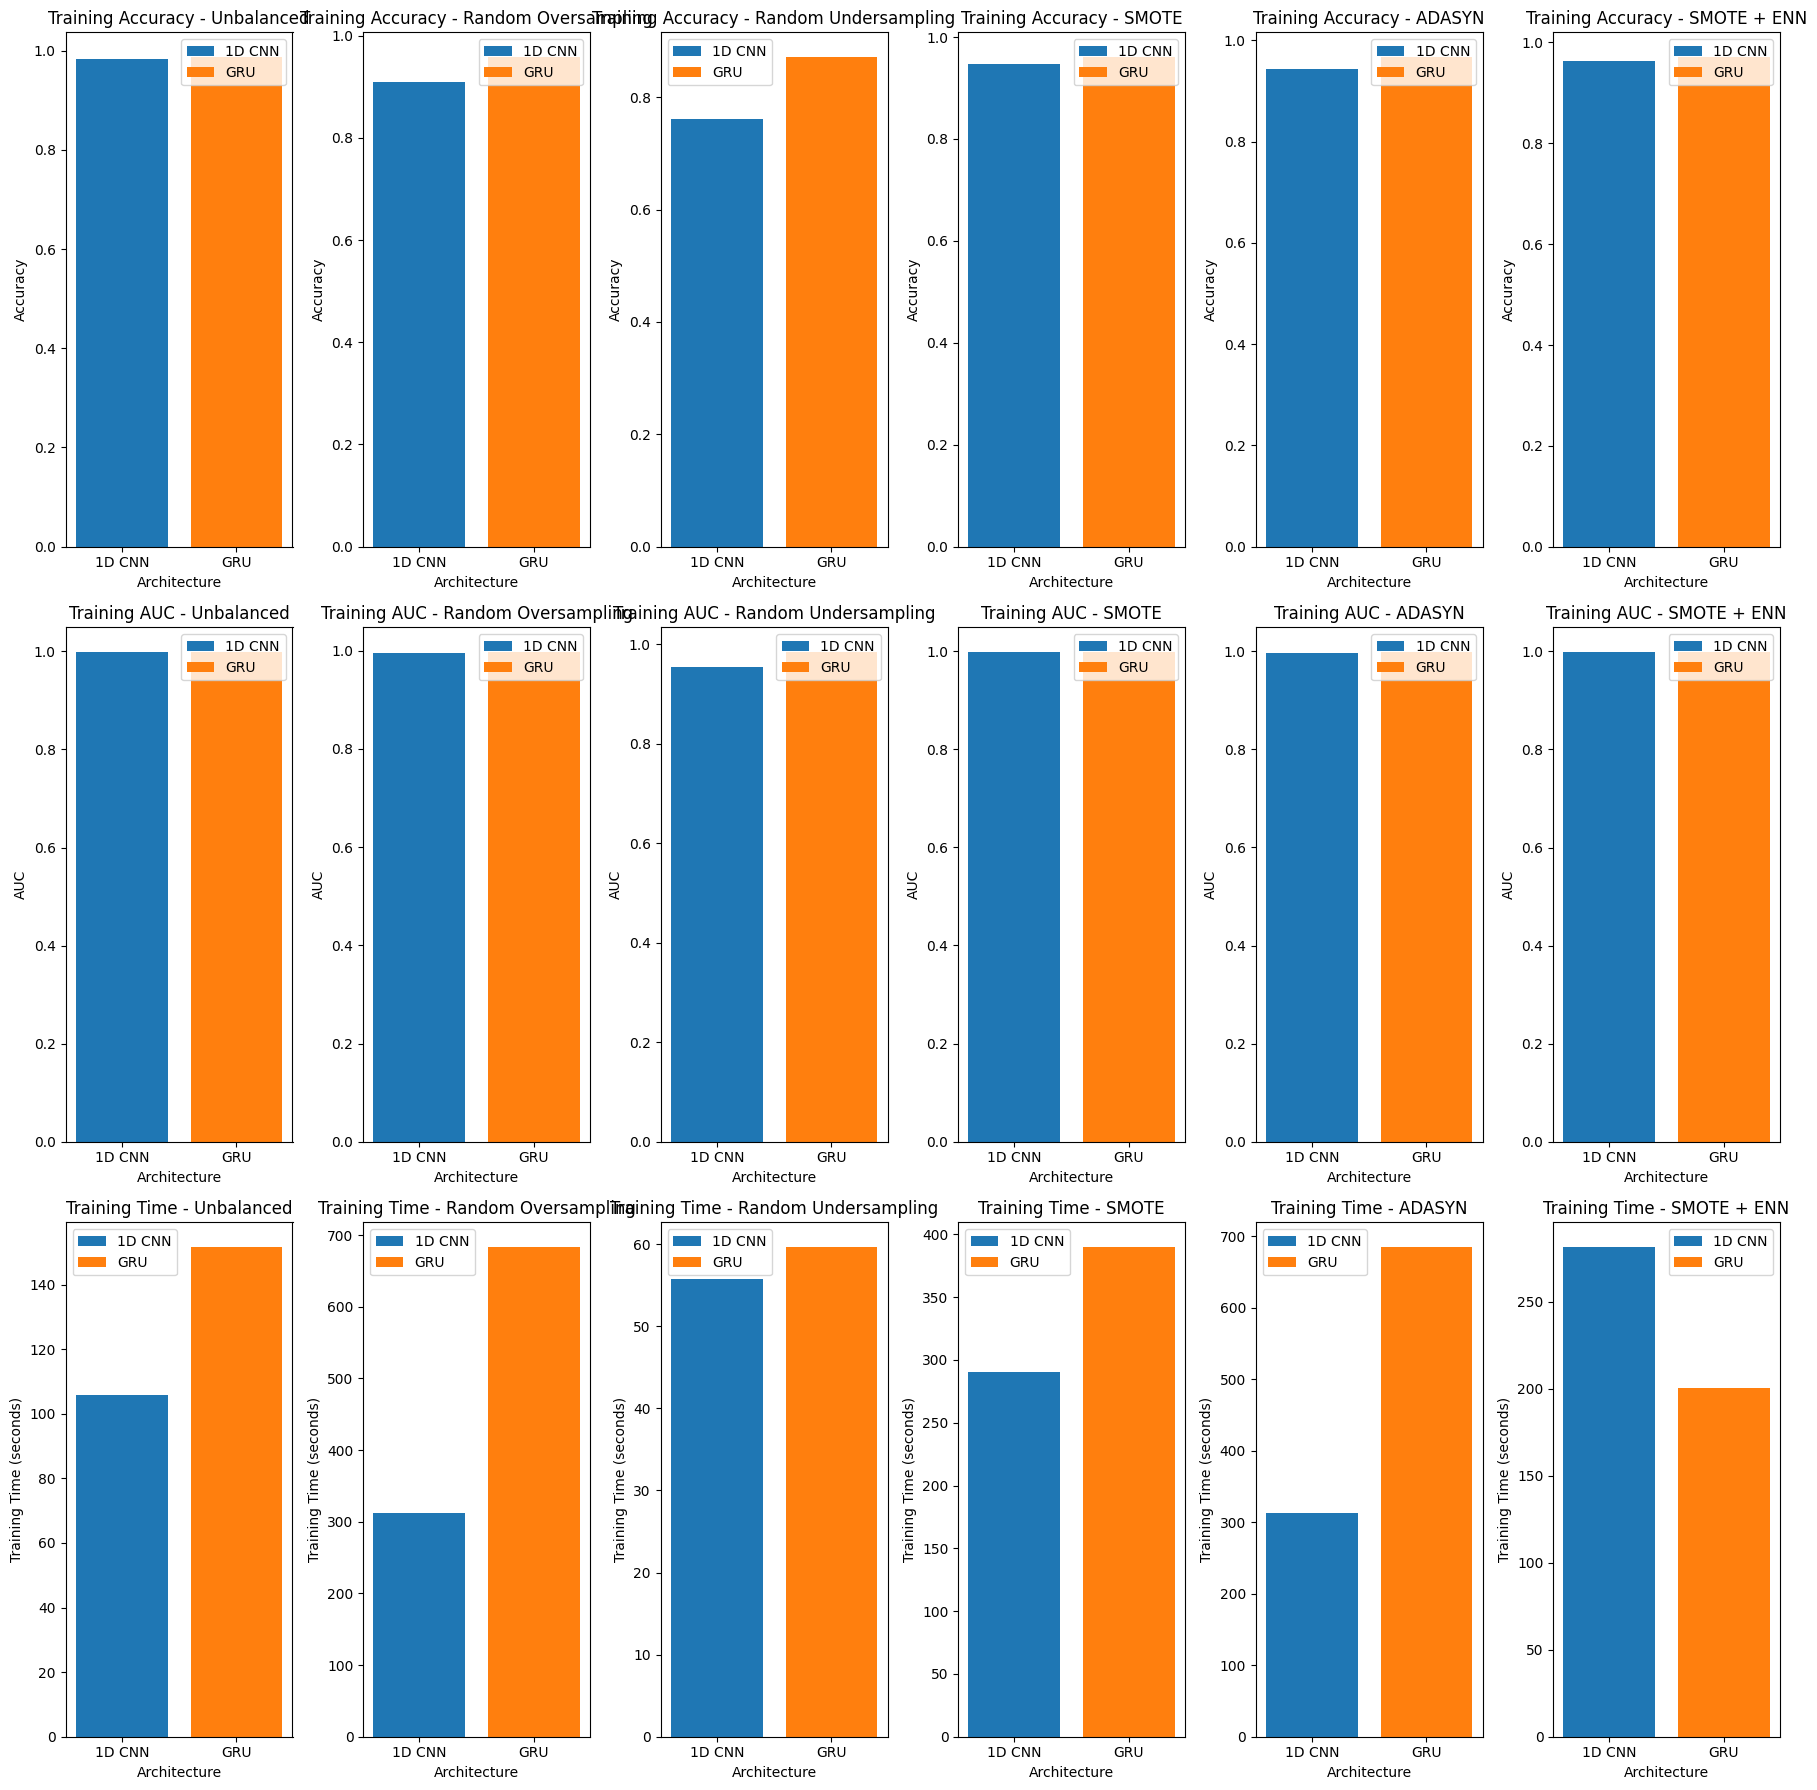

In [ ]:
# Plot the results
# Plot the results
model_names = list(architectures.keys())
balancing_methods = list(results.keys())
plot_results(results, model_names,balancing_methods, filename=' my_plot_50epochs.png')

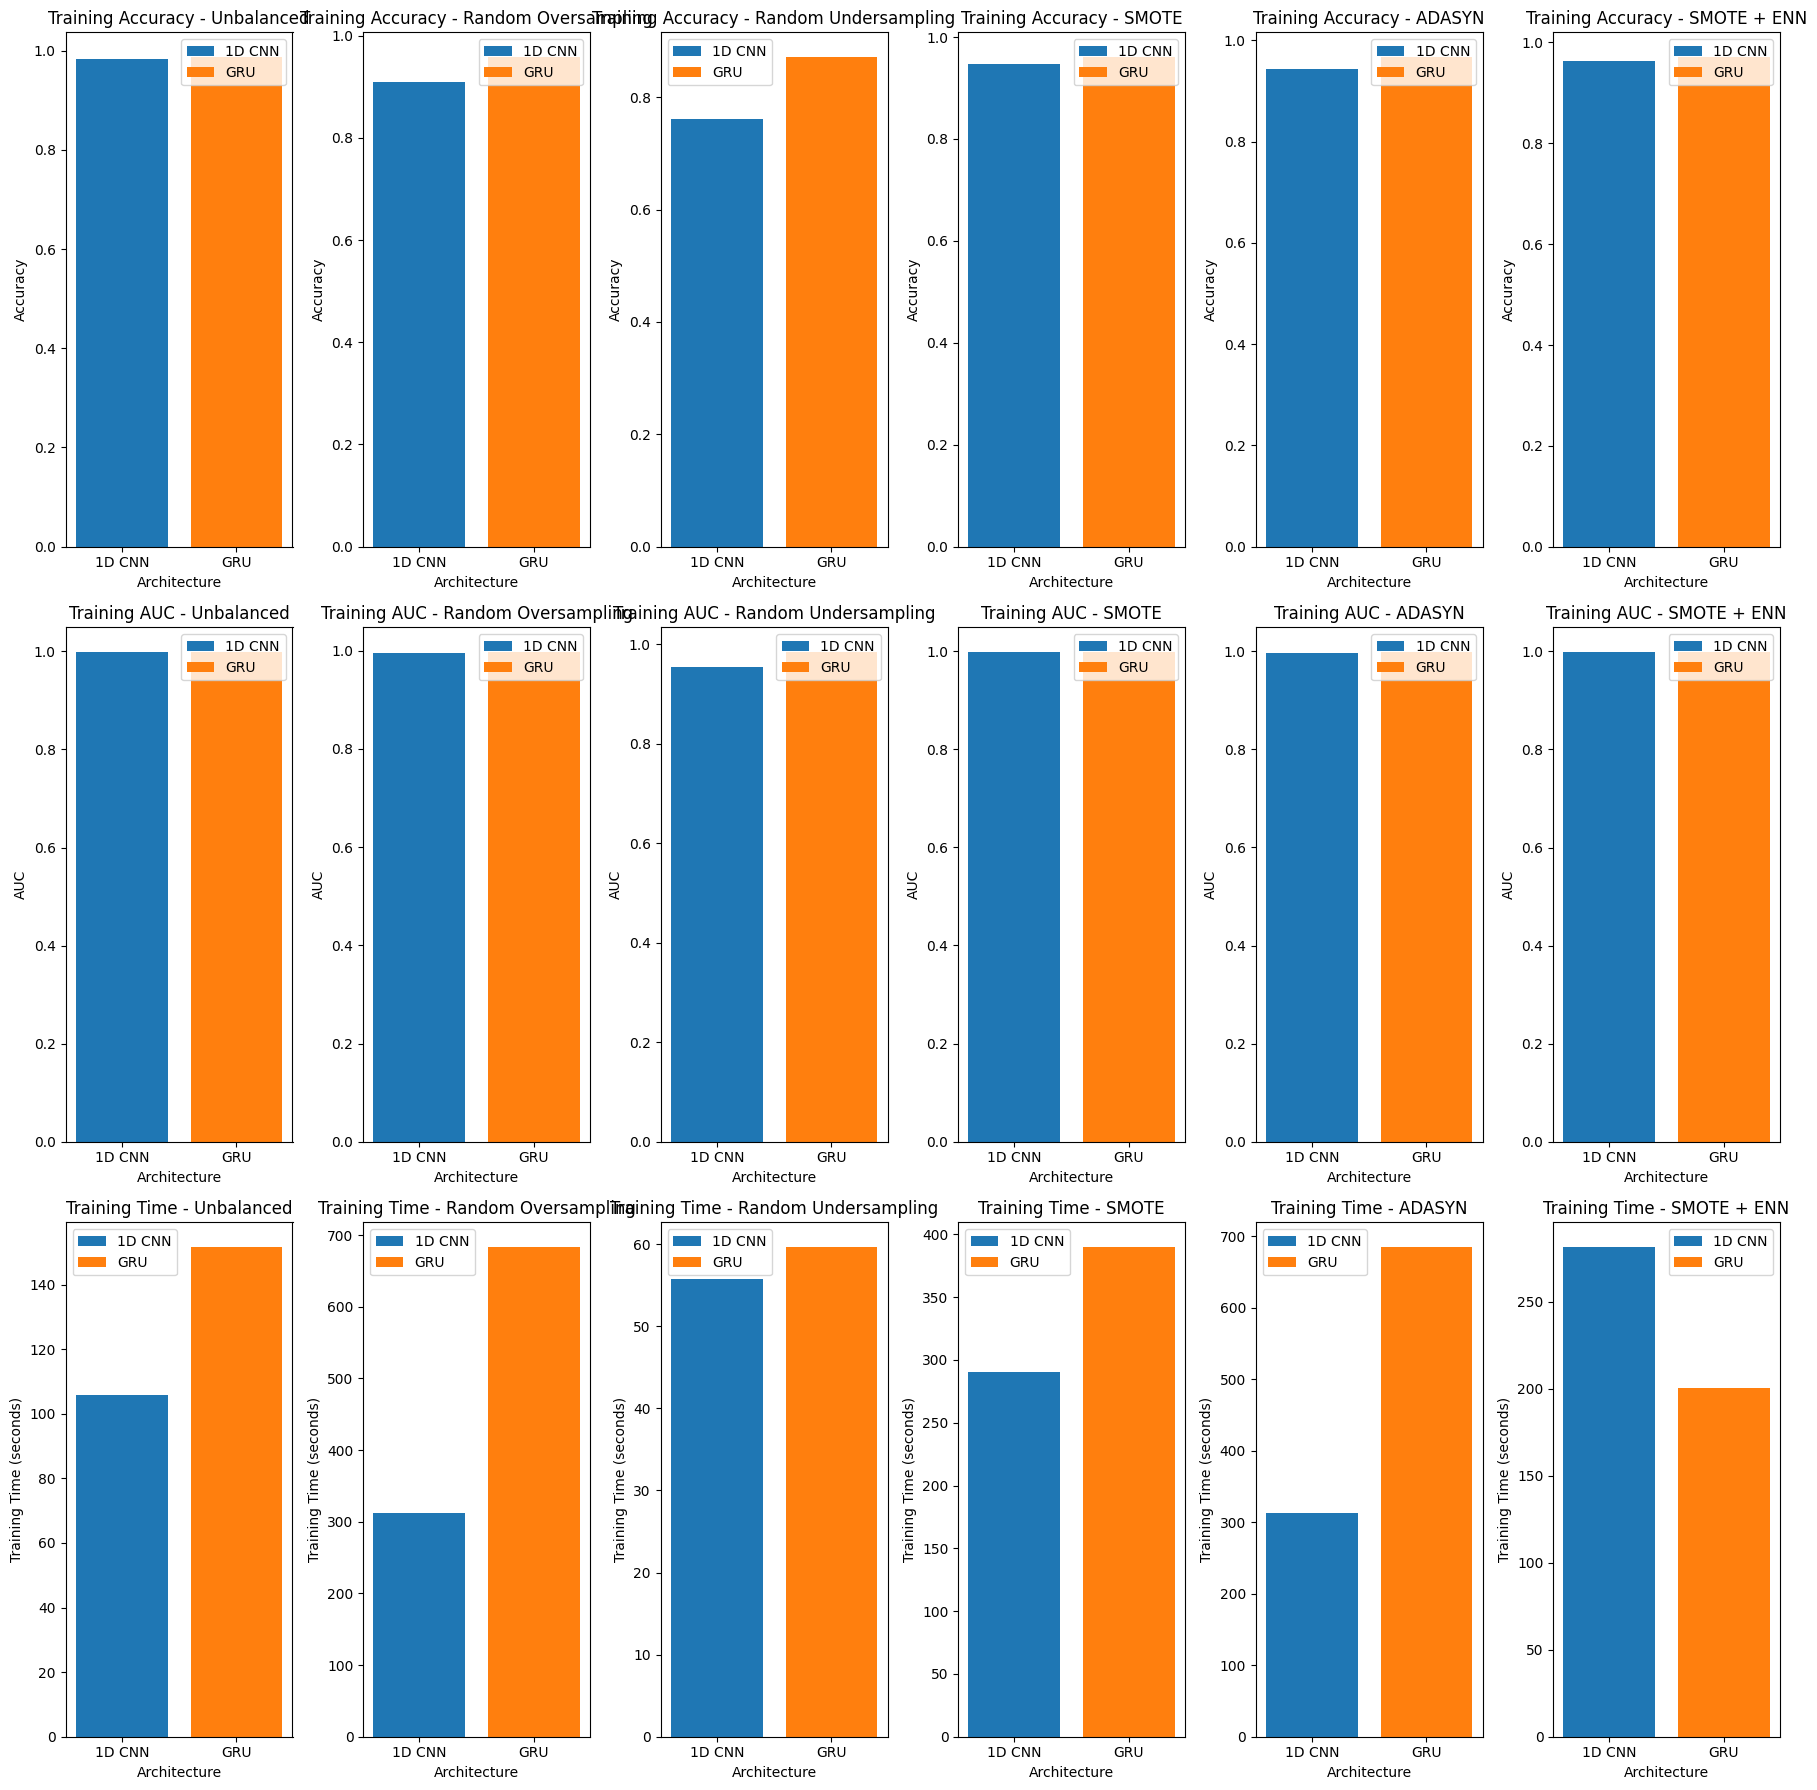

In [ ]:
#results = evaluate_balancing_methods(X, y) #, use_tpu=True)  # Use TPU
# Plot the results
model_names = list(architectures.keys())
balancing_methods = list(results.keys())
    # Plot the results
plot_results(results, model_names, balancing_methods, filename='my_plot_50epochs.png')

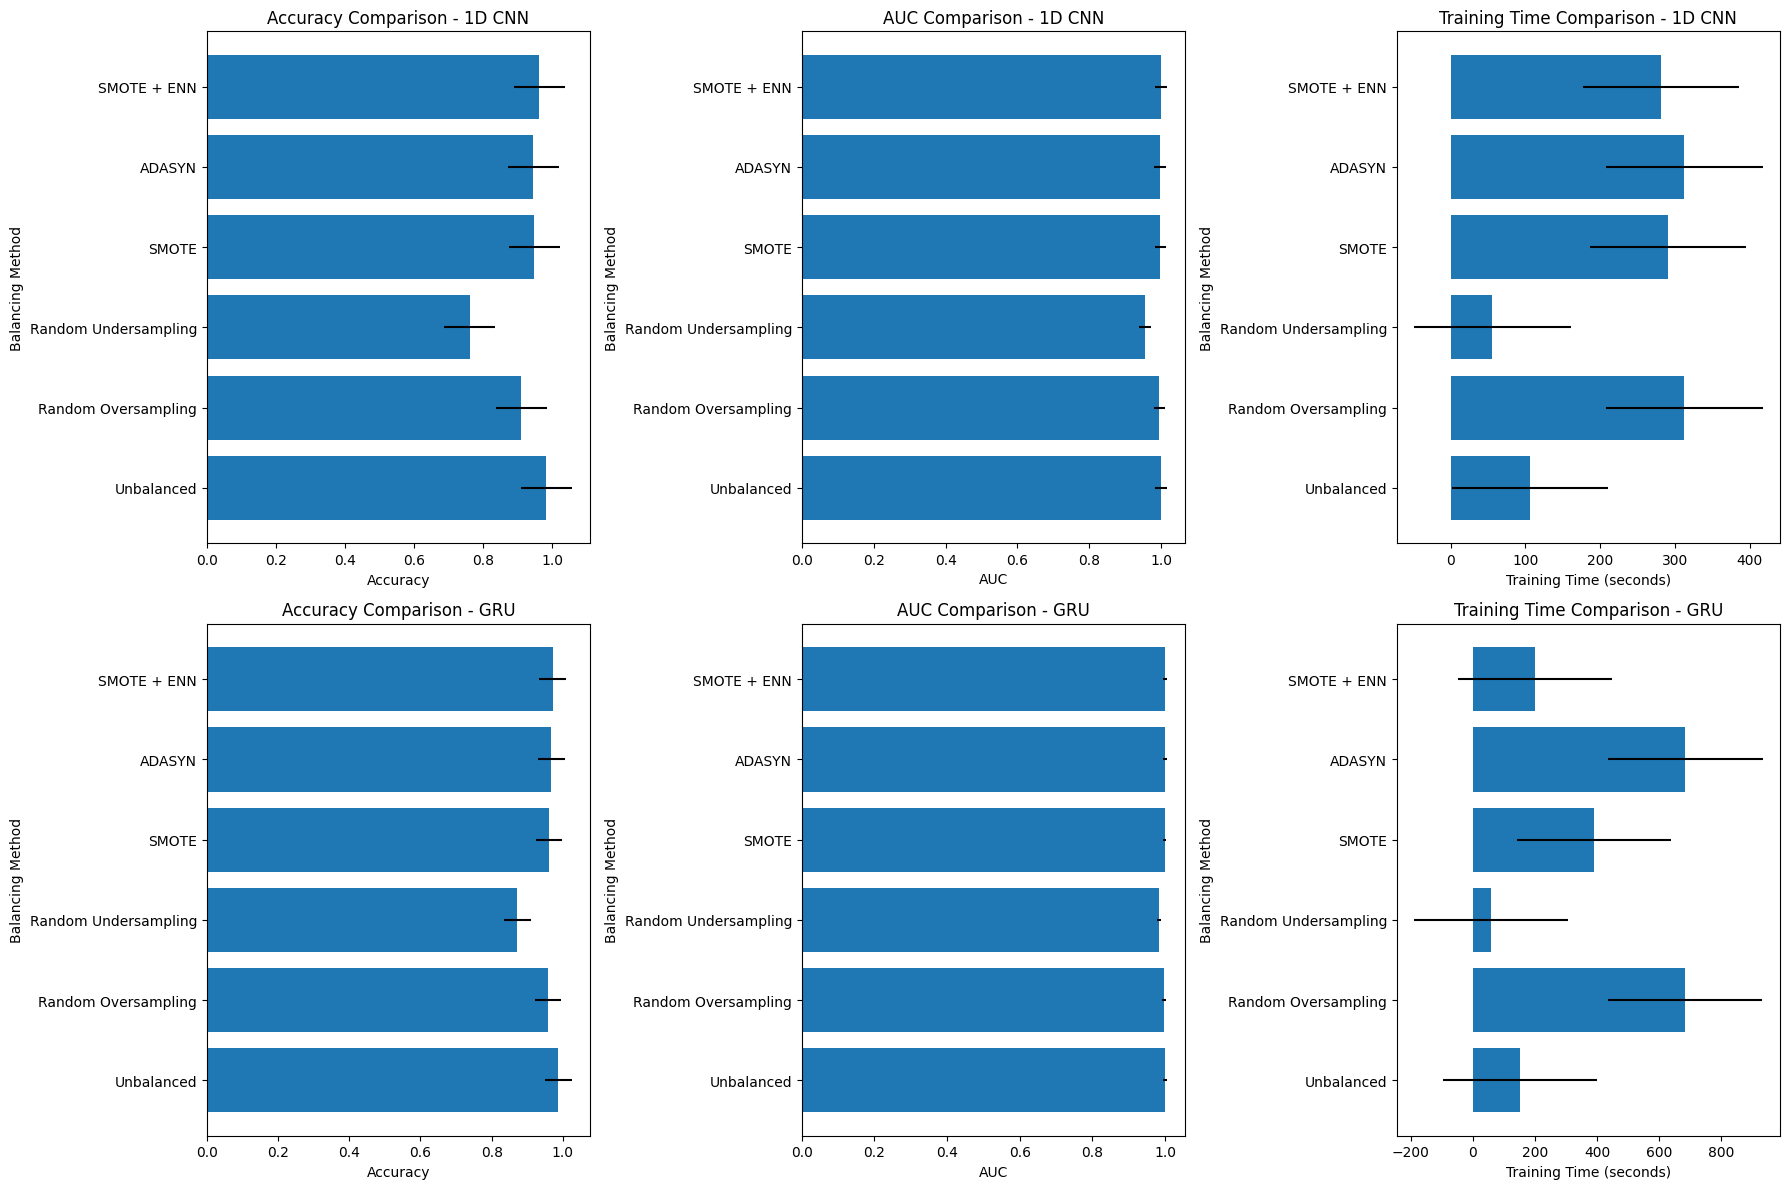

In [ ]:
# Plot the results
model_names = list(architectures.keys())
balancing_methods = list(results.keys())
plot_results2(results, model_names,  filename='my_2plot_50epochs.png')


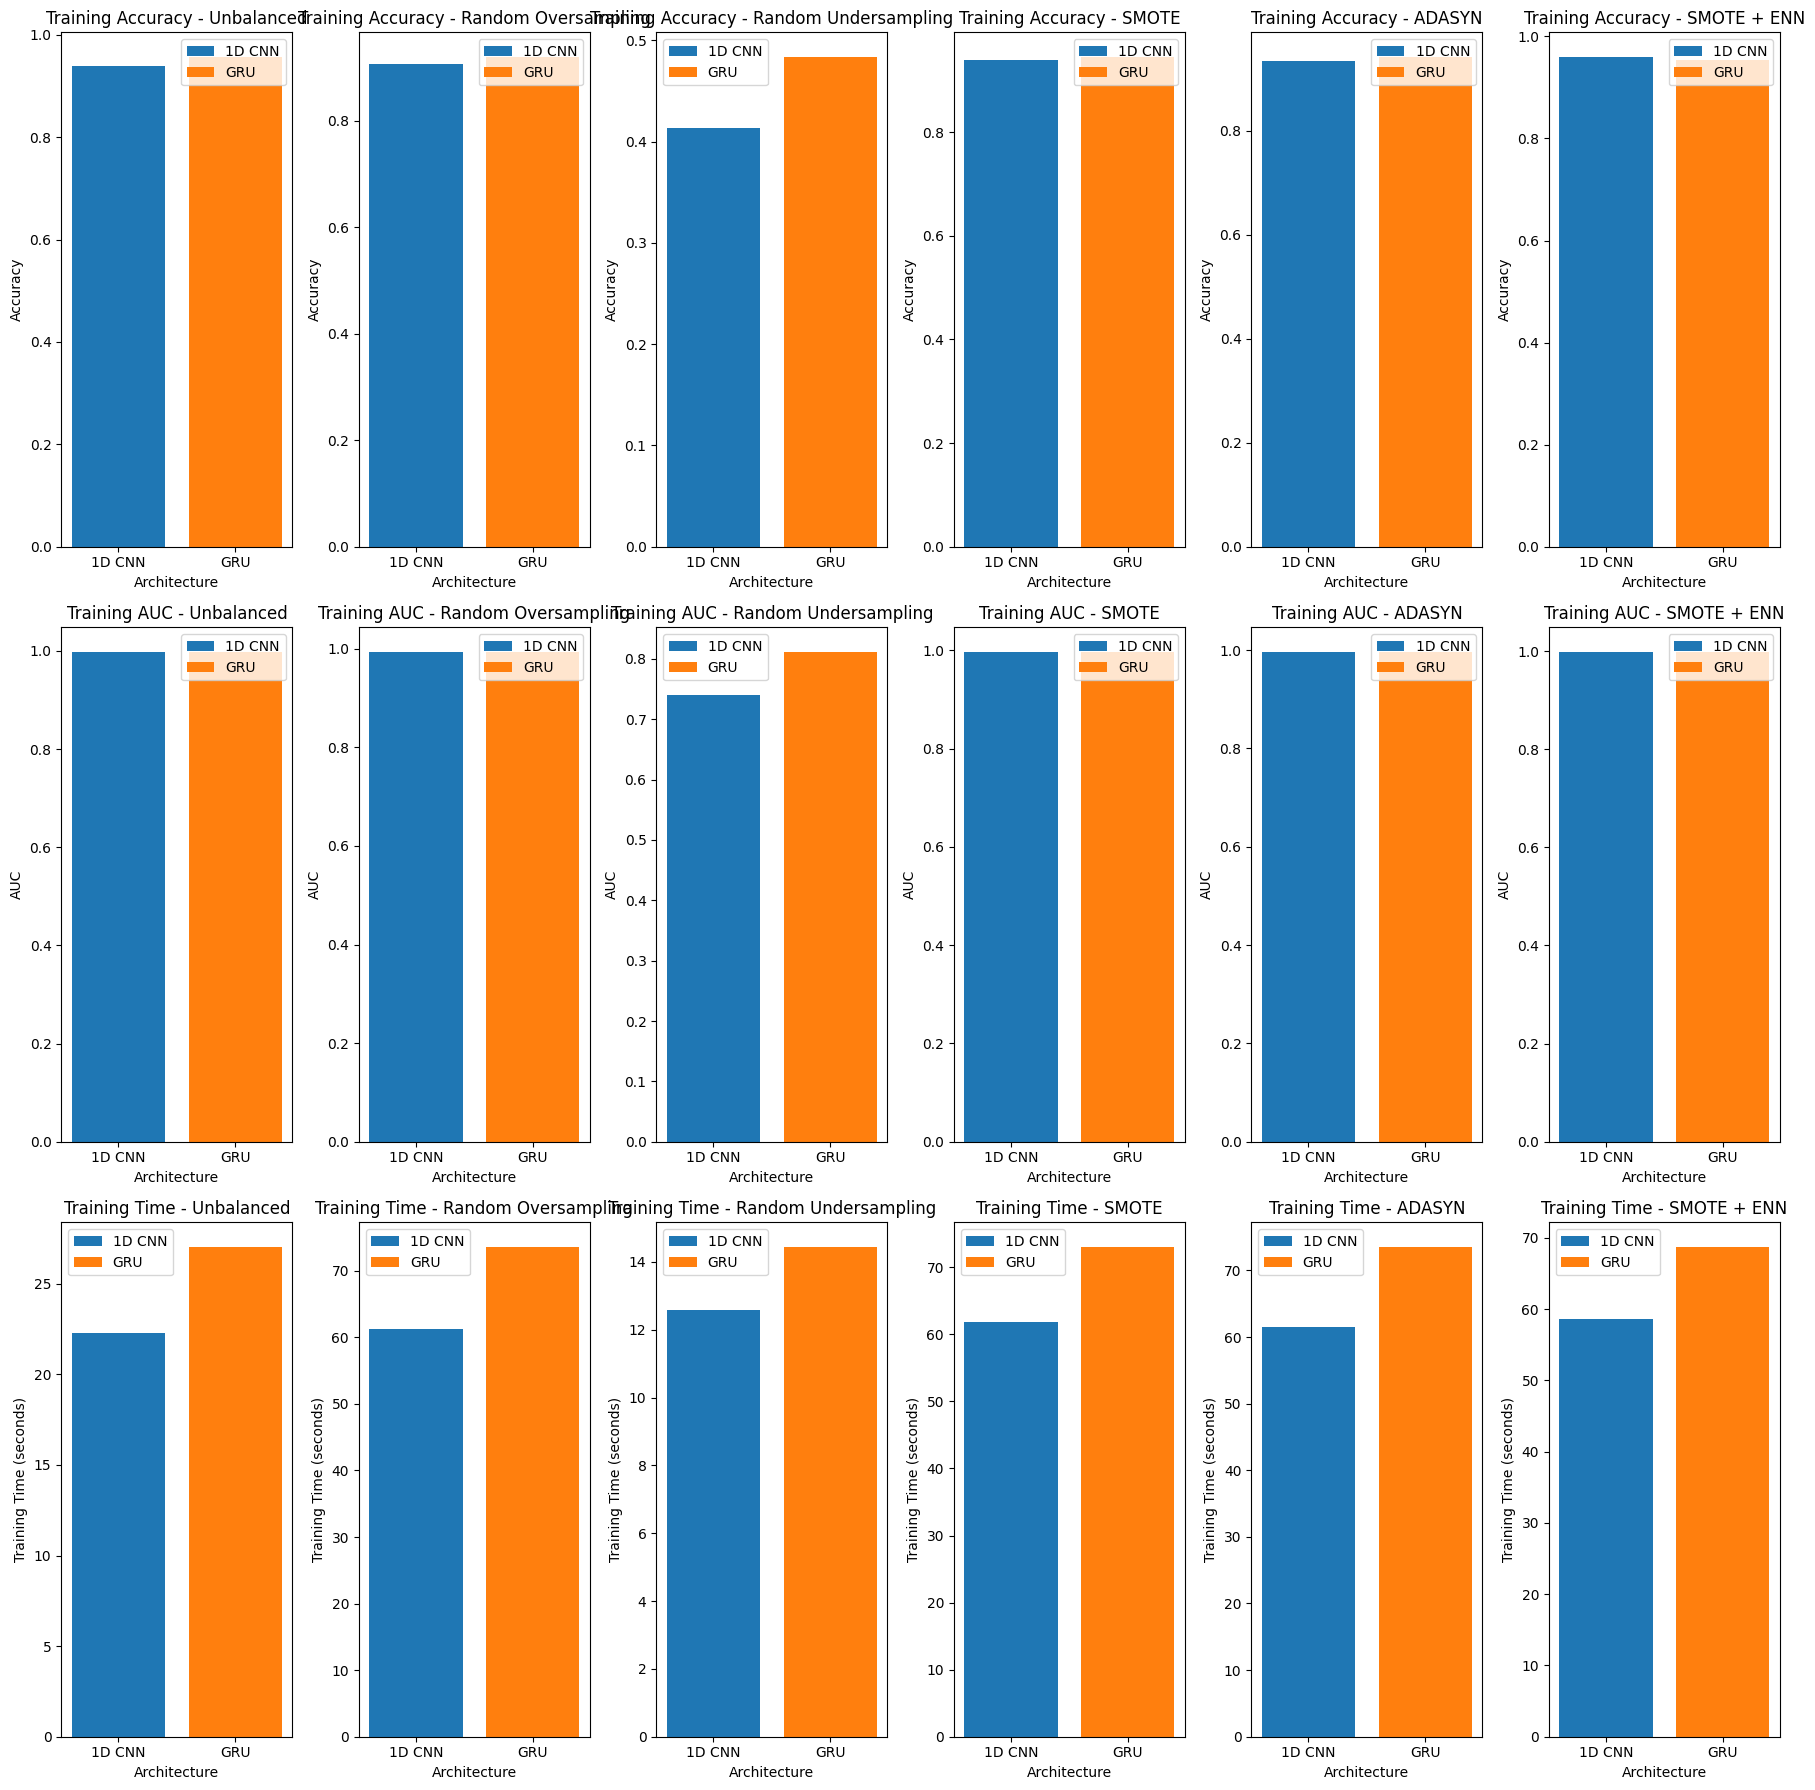

In [ ]:
# Plot the results
model_names = list(architectures.keys())
balancing_methods = list(results.keys())
plot_results(results, model_names, balancing_methods, filename=' my_plot_3epochs.png')

In [ ]:
results = evaluate_balancing_methods(X, y)  # Assuming this function is defined and returns results
plot_results(results, filename='results_plot.png')  # Save the plot as 'my_plot.png'

### For all the DL architectures

In [ ]:
import os  # Ensure os is imported
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import to_categorical
import csv  # Import the csv module

import os
import csv
from typing import Any

def write_to_csv(file_path: str, fieldnames: list, data: dict) -> None:
    """Writes data to a CSV file, creating the file if it doesn't exist."""
    file_exists = os.path.isfile(file_path)

    with open(file_path, mode='a', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Write the header only if the file is new
        if not file_exists:
            writer.writeheader()

        writer.writerow(data)

def save_results(model_name: str, architecture: str, accuracy: float, auc: float, report: str, training_time: float) -> None:
    """Saves model results to a CSV file and a text file."""
    # Define the path for the results summary CSV file
    csv_file_path = "/content/results_summary.csv"

    # Prepare data for CSV
    csv_data = {
        'Model Name': model_name,
        'Architecture': architecture,
        'Test Accuracy': accuracy,
        'Test AUC': auc,
        'Training Time': training_time,
        'Classification Report': report
    }

    # Write results to the CSV file
    try:
        write_to_csv(csv_file_path, csv_data.keys(), csv_data)
    except Exception as e:
        print(f"Error writing to CSV: {e}")

    # Create directory for model results if it doesn't exist
    results_dir = 'model_results'
    os.makedirs(results_dir, exist_ok=True)

    # Save results to a text file
    try:
        with open(os.path.join(results_dir, f'{model_name}_results.txt'), 'w') as f:
            f.write(f'Model Name: {model_name}\n')
            f.write(f'DL Architecture: {architecture}\n')
            f.write(f'Test Accuracy: {accuracy:.4f}\n')
            f.write(f'Test AUC: {auc:.4f}\n')
            f.write(f'Training Time: {training_time:.2f} seconds\n')
            f.write('\nClassification Report:\n')
            f.write(report)
    except Exception as e:
        print(f"Error writing to text file: {e}")



# Update the architectures dictionary to include the new model
architectures = {
    '1D CNN': create_1d_cnn_model,
    'Bidirectional LSTM': create_bidirectional_lstm_model,
    'GRU': create_gru_model,
    'LSTM': create_lstm_model,
    'RNN': create_rnn_model
    #'CNN + ResNet101': create_cnn_resnet_model  # New architecture added here
}
# Function to evaluate model with different balancing methods and architectures
def evaluate_balancing_methods(X, y, use_tpu=False, use_cuda=False):
    # Set up TPU or CUDA strategy
    '''if use_tpu:
        resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
        tf.config.experimental_connect_to_cluster(resolver)
        tf.tpu.experimental.initialize_tpu_system(resolver)
        strategy = tf.distribute.TPUStrategy(resolver)
    elif use_cuda:
        strategy = tf.distribute.MirroredStrategy()  # For multi-GPU
    else:
        strategy = tf.distribute.get_strategy()  # Default strategy (CPU or single GPU)
        '''

    methods = {
        #'Unbalanced': lambda X, y: (X, y),  # Evaluate on the original unbalanced dataset
        #'Random Oversampling': random_oversample,
        #'Random Undersampling': random_undersample,
        #'SMOTE': smote_balance,
        #'ADASYN': adasyn_balance,
        'SMOTE + ENN': smote_enn_balance
    }

    results = {}

    # Start timing the evaluation process
    start_time = time.time()  # Record start time

    for method_name, method in methods.items():
        print("\n ******************************************************************************************************************************************* \n")
        print(f" *** \t Evaluating method: {method_name}")
        print("\n ********************************************************** \n")

        X_resampled, y_resampled = method(X, y)

        # Convert labels to categorical (if not already)
        if len(y_resampled.shape) == 1:  # Check if y_resampled is 1D (not one-hot encoded)
            y_resampled = to_categorical(y_resampled)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=np.argmax(y_resampled, axis=1), random_state=42)

        # Plot the distribution of the target variable for dataset
        plot_target_distribution(np.argmax(y_resampled, axis=1), method_name, filename=method_name + '_dataset_target_distribution.png')

        # Plot the distribution of the target variable for train and test sets
        plot_target_distribution(np.argmax(y_train, axis=1), method_name + ' - Train', filename=method_name + '_train_target_distribution.png')
        plot_target_distribution(np.argmax(y_test, axis=1), method_name + ' - Test', filename=method_name + '_test_target_distribution.png')

        for architecture_name, architecture in architectures.items():
            print("\n********************************************************** \n")
            print(f"*** \t Evaluating architecture: {architecture_name}")
            print("\n********************************************************** \n")
            # Reshape the input data to add a timesteps dimension
            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

            # Create the model within the strategy scope
            with strategy.scope():
                model = architecture(X_train.shape[1:])

                # Callbacks for early stopping, model checkpointing, and TensorBoard
                log_dir = os.path.join("logs", method_name, architecture_name, "fit")
                tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                model_checkpoint = ModelCheckpoint(f'{architecture_name}_best_model.h5', save_best_only=True)

                # Start timing the training process
                train_start_time = time.time()  # Record start time for training
                history = model.fit(X_train, y_train, epochs=50, batch_size=1024, #cv = 3,
                                    validation_split=0.2, verbose=0,
                                    callbacks=[early_stopping, model_checkpoint, tensorboard_callback])
                train_end_time = time.time()  # Record end time for training

                # Calculate training time for this fold
                training_time = train_end_time - train_start_time

                # Evaluate the model on the test set
                test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)

                # Generate predictions and evaluate
                y_pred = model.predict(X_test)
                y_pred_classes = np.argmax(y_pred, axis=1)
                y_true_classes = np.argmax(y_test, axis=1)

                # Print confusion matrix and classification report
                print(f"Confusion Matrix for method: {method_name} and architecture: {architecture_name}")
                print(confusion_matrix(y_true_classes, y_pred_classes))
                print(classification_report(y_true_classes, y_pred_classes))

                # Save results
                model_name = f"{method_name}_{architecture_name}"
                report = classification_report(y_true_classes, y_pred_classes)
                save_results(model_name, architecture_name, test_accuracy, test_auc, report, training_time)

                # Store results including training time
                if method_name not in results:
                    results[method_name] = {}
                results[method_name][architecture_name] = {
                    'accuracy': test_accuracy,
                    'auc': test_auc,
                    'training_time': training_time  # Store total training time
                }

                # Plot training-testing history for the last fold
                print("\n********************************************************** \n")
                print("\n********************************************************** \n")
                plot_history(history, architecture_name, method_name)
                print("\n********************************************************** \n")
                print("\n********************************************************** \n")

    # End timing the evaluation process
    end_time = time.time()  # Record end time
    total_time = end_time - start_time  # Calculate total elapsed time

    # Print total evaluation time
    print(f"Total evaluation time: {total_time:.2f} seconds")

    return results

# Example usage:
#results = evaluate_balancing_methods(X, y, use_tpu=True)  # Use TPU
# results = evaluate_balancing_methods(X, y, use_cuda=True)  # Use CUDA (GPU)

#### Main execution block

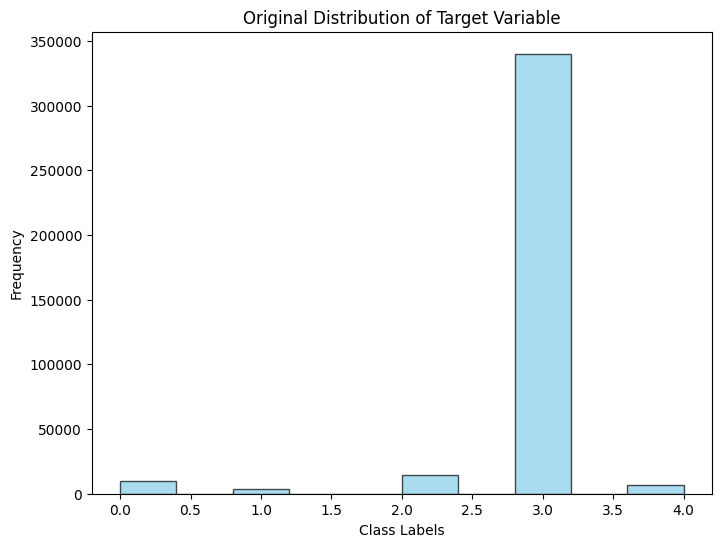

# ******************************************************************************************************************************************* 

# Evaluate all balancing methods and architectures: 


 ******************************************************************************************************************************************* 

 *** 	 Evaluating method: SMOTE + ENN

 ********************************************************** 



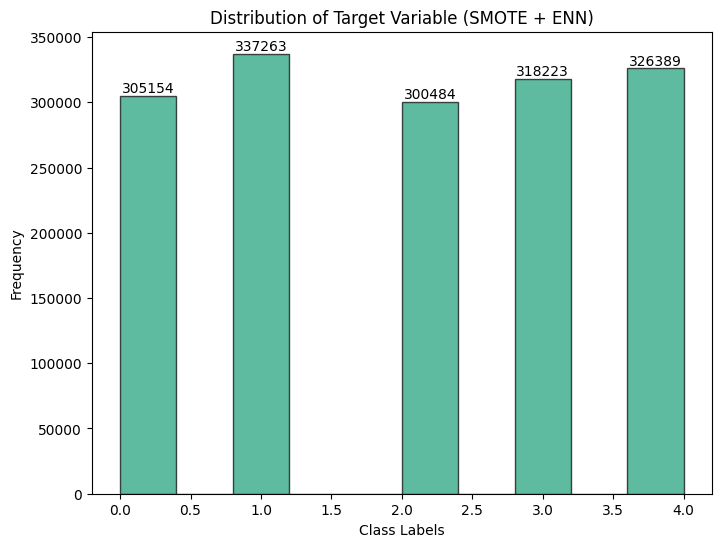

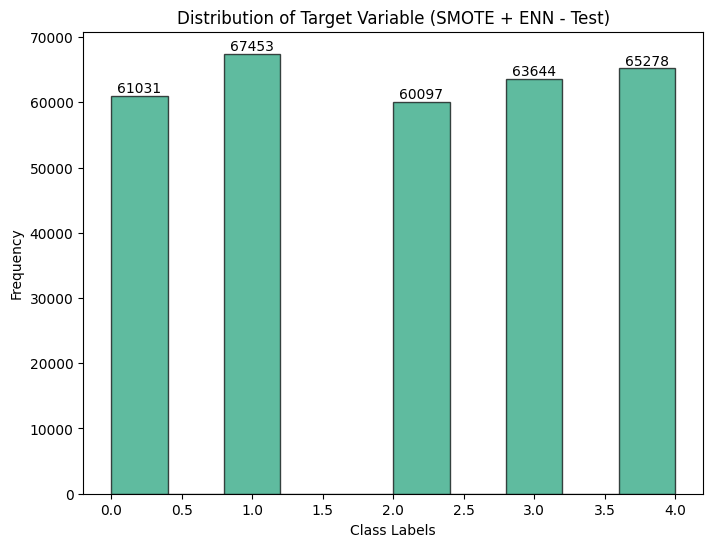


********************************************************** 

*** 	 Evaluating architecture: 1D CNN

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9922/9922 [==============================] - 77s 8ms/step
Confusion Matrix for method: SMOTE + ENN and architecture: 1D CNN
[[59832     0  1197     0     2]
 [    0 67445     8     0     0]
 [ 8829     0 51267     0     1]
 [    0     2    38 63598     6]
 [    6     0    64  1545 63663]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     61031
           1       1.00      1.00      1.00     67453
           2       0.98      0.85      0.91     60097
           3       0.98      1.00      0.99     63644
           4       1.00      0.98      0.99     65278

    accuracy                           0.96    317503
   macro avg       0.96      0.96      0.96    317503
weighted avg       0.97      0.96      0.96    317503


********************************************************** 


********************************************************** 



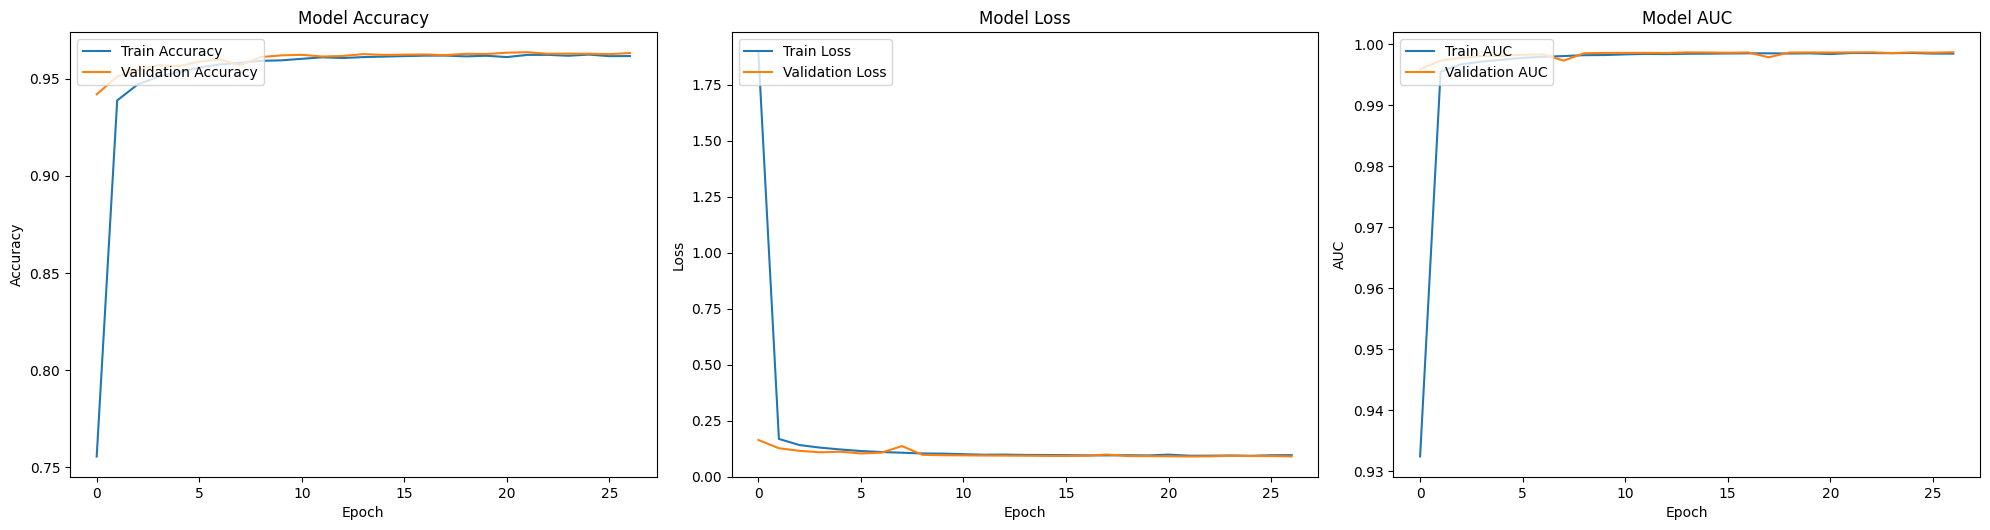


********************************************************** 


********************************************************** 


********************************************************** 

*** 	 Evaluating architecture: Bidirectional LSTM

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9922/9922 [==============================] - 86s 9ms/step
Confusion Matrix for method: SMOTE + ENN and architecture: Bidirectional LSTM
[[60539     0   492     0     0]
 [    0 67453     0     0     0]
 [  857     0 59238     0     2]
 [    0     2    15 63550    77]
 [    3     0     9  1063 64203]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     61031
           1       1.00      1.00      1.00     67453
           2       0.99      0.99      0.99     60097
           3       0.98      1.00      0.99     63644
           4       1.00      0.98      0.99     65278

    accuracy                           0.99    317503
   macro avg       0.99      0.99      0.99    317503
weighted avg       0.99      0.99      0.99    317503


********************************************************** 


********************************************************** 



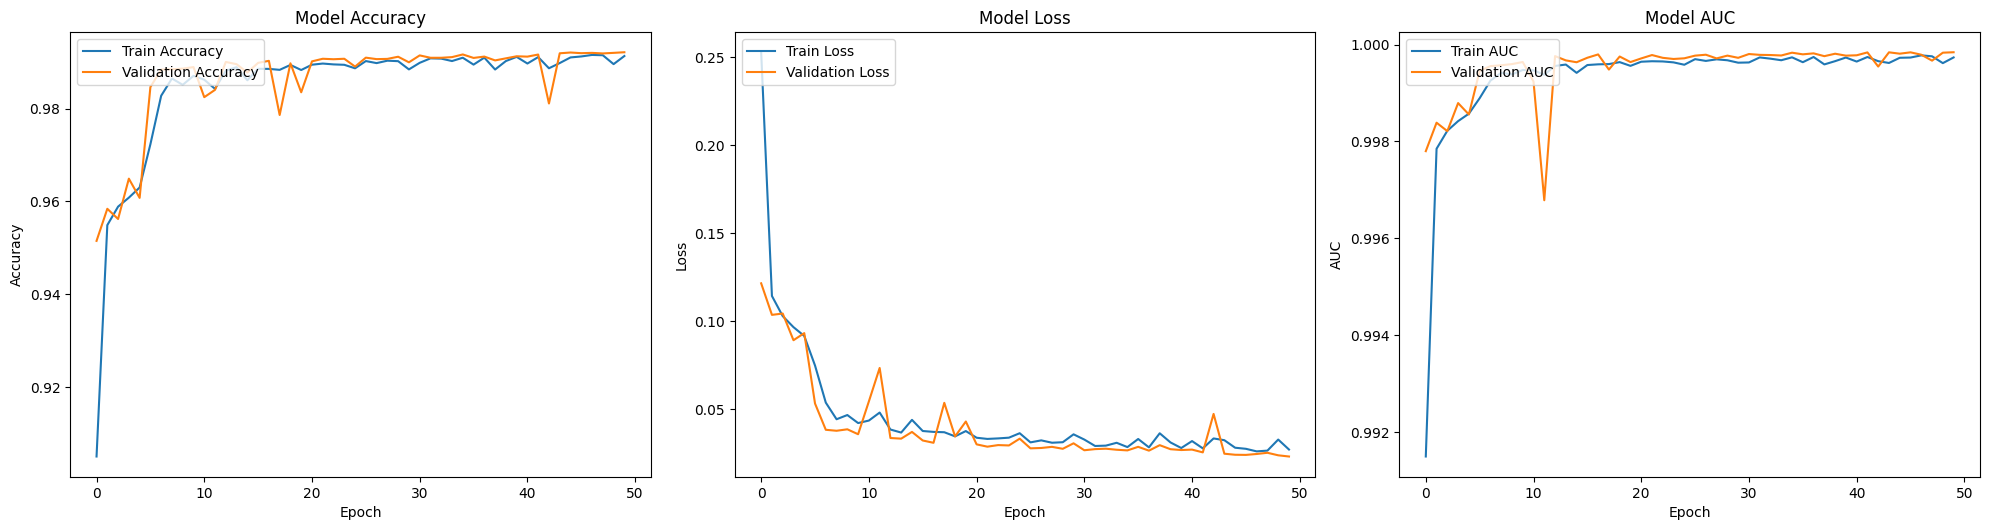


********************************************************** 


********************************************************** 


********************************************************** 

*** 	 Evaluating architecture: GRU

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9922/9922 [==============================] - 80s 8ms/step
Confusion Matrix for method: SMOTE + ENN and architecture: GRU
[[59639     0  1392     0     0]
 [    0 67444     7     2     0]
 [ 3999     0 56095     0     3]
 [    0     4    15 63578    47]
 [    0     0    28  1269 63981]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     61031
           1       1.00      1.00      1.00     67453
           2       0.97      0.93      0.95     60097
           3       0.98      1.00      0.99     63644
           4       1.00      0.98      0.99     65278

    accuracy                           0.98    317503
   macro avg       0.98      0.98      0.98    317503
weighted avg       0.98      0.98      0.98    317503


********************************************************** 


********************************************************** 




********************************************************** 


********************************************************** 


********************************************************** 

*** 	 Evaluating architecture: LSTM

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9922/9922 [==============================] - 81s 8ms/step
Confusion Matrix for method: SMOTE + ENN and architecture: LSTM
[[59151     0  1860     0    20]
 [    0 67424    13    12     4]
 [ 3861     0 56185     1    50]
 [    0     6    22 63596    20]
 [    1     0     5  1383 63889]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     61031
           1       1.00      1.00      1.00     67453
           2       0.97      0.93      0.95     60097
           3       0.98      1.00      0.99     63644
           4       1.00      0.98      0.99     65278

    accuracy                           0.98    317503
   macro avg       0.98      0.98      0.98    317503
weighted avg       0.98      0.98      0.98    317503


********************************************************** 


********************************************************** 




********************************************************** 


********************************************************** 


********************************************************** 

*** 	 Evaluating architecture: RNN

********************************************************** 



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9922/9922 [==============================] - 78s 8ms/step
Confusion Matrix for method: SMOTE + ENN and architecture: RNN
[[59958     0  1070     0     3]
 [    0 67446     4     0     3]
 [ 4545     0 55535     0    17]
 [    0     4    27 63587    26]
 [    0     0     7  1362 63909]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     61031
           1       1.00      1.00      1.00     67453
           2       0.98      0.92      0.95     60097
           3       0.98      1.00      0.99     63644
           4       1.00      0.98      0.99     65278

    accuracy                           0.98    317503
   macro avg       0.98      0.98      0.98    317503
weighted avg       0.98      0.98      0.98    317503


********************************************************** 


********************************************************** 



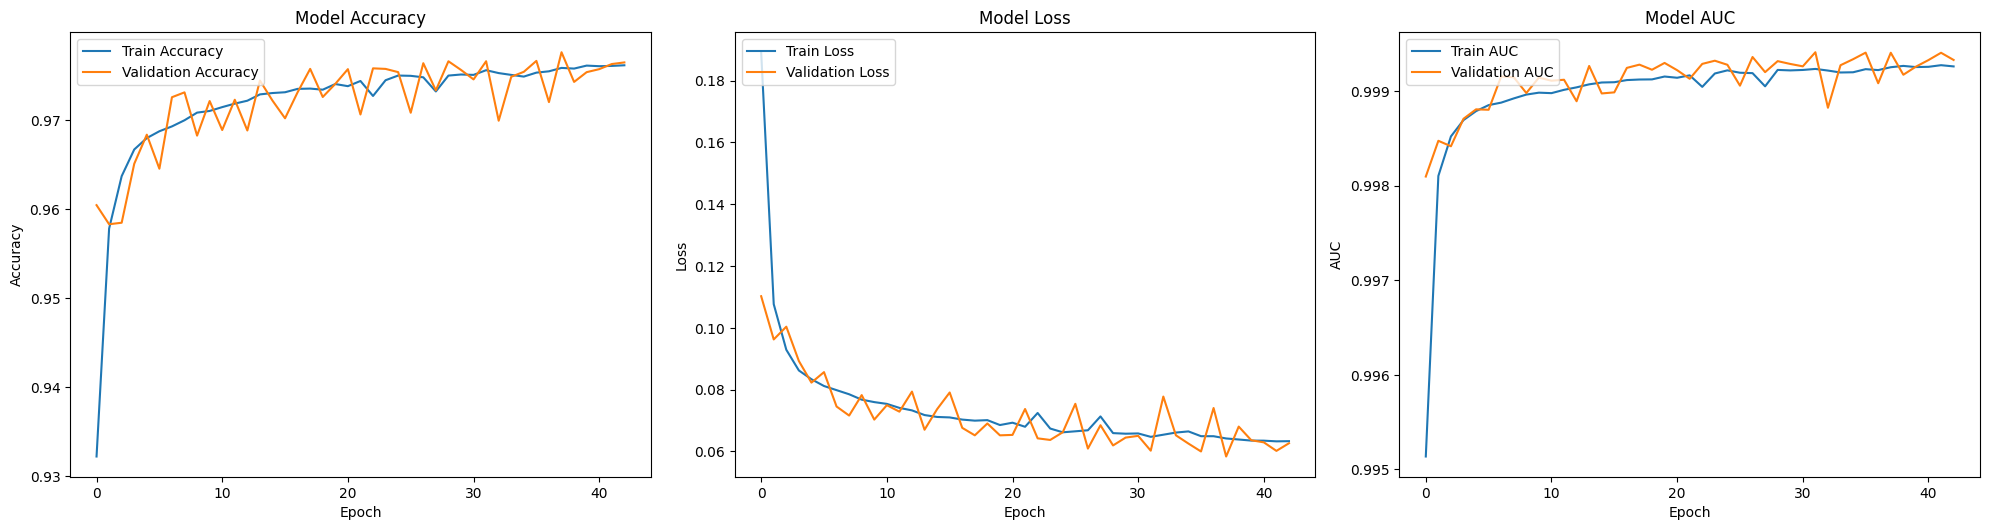


********************************************************** 


********************************************************** 

Total evaluation time: 3999.28 seconds


In [ ]:
import os  # Ensure os is imported
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import to_categorical
import csv  # Import the csv module
import matplotlib.pyplot as plt
import seaborn as sns


# Main execution block
if __name__ == "__main__":

    # Load and preprocess the dataset
    file_path = '/content/WSN-DS.csv'  # Replace with your actual data file
    label_column = 'Attack type'  # Replace with the actual label column name
    X, y = load_and_preprocess_data(file_path, label_column)

    #results_path= "/content/results_summary.csv"

    # Convert one-hot encoded labels to class indices
    y_classes = np.argmax(y, axis=1)

    # Plot the original distribution of the target variable
    plt.figure(figsize=(8, 6))
    # Use a single color instead of a palette
    plt.hist(y_classes, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Original Distribution of Target Variable')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.show()

    print("# ******************************************************************************************************************************************* \n")
    print("# Evaluate all balancing methods and architectures: \n")
    # Evaluate all balancing methods and architectures

    results = evaluate_balancing_methods(X, y) #, use_tpu=True)  # Use TPU

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

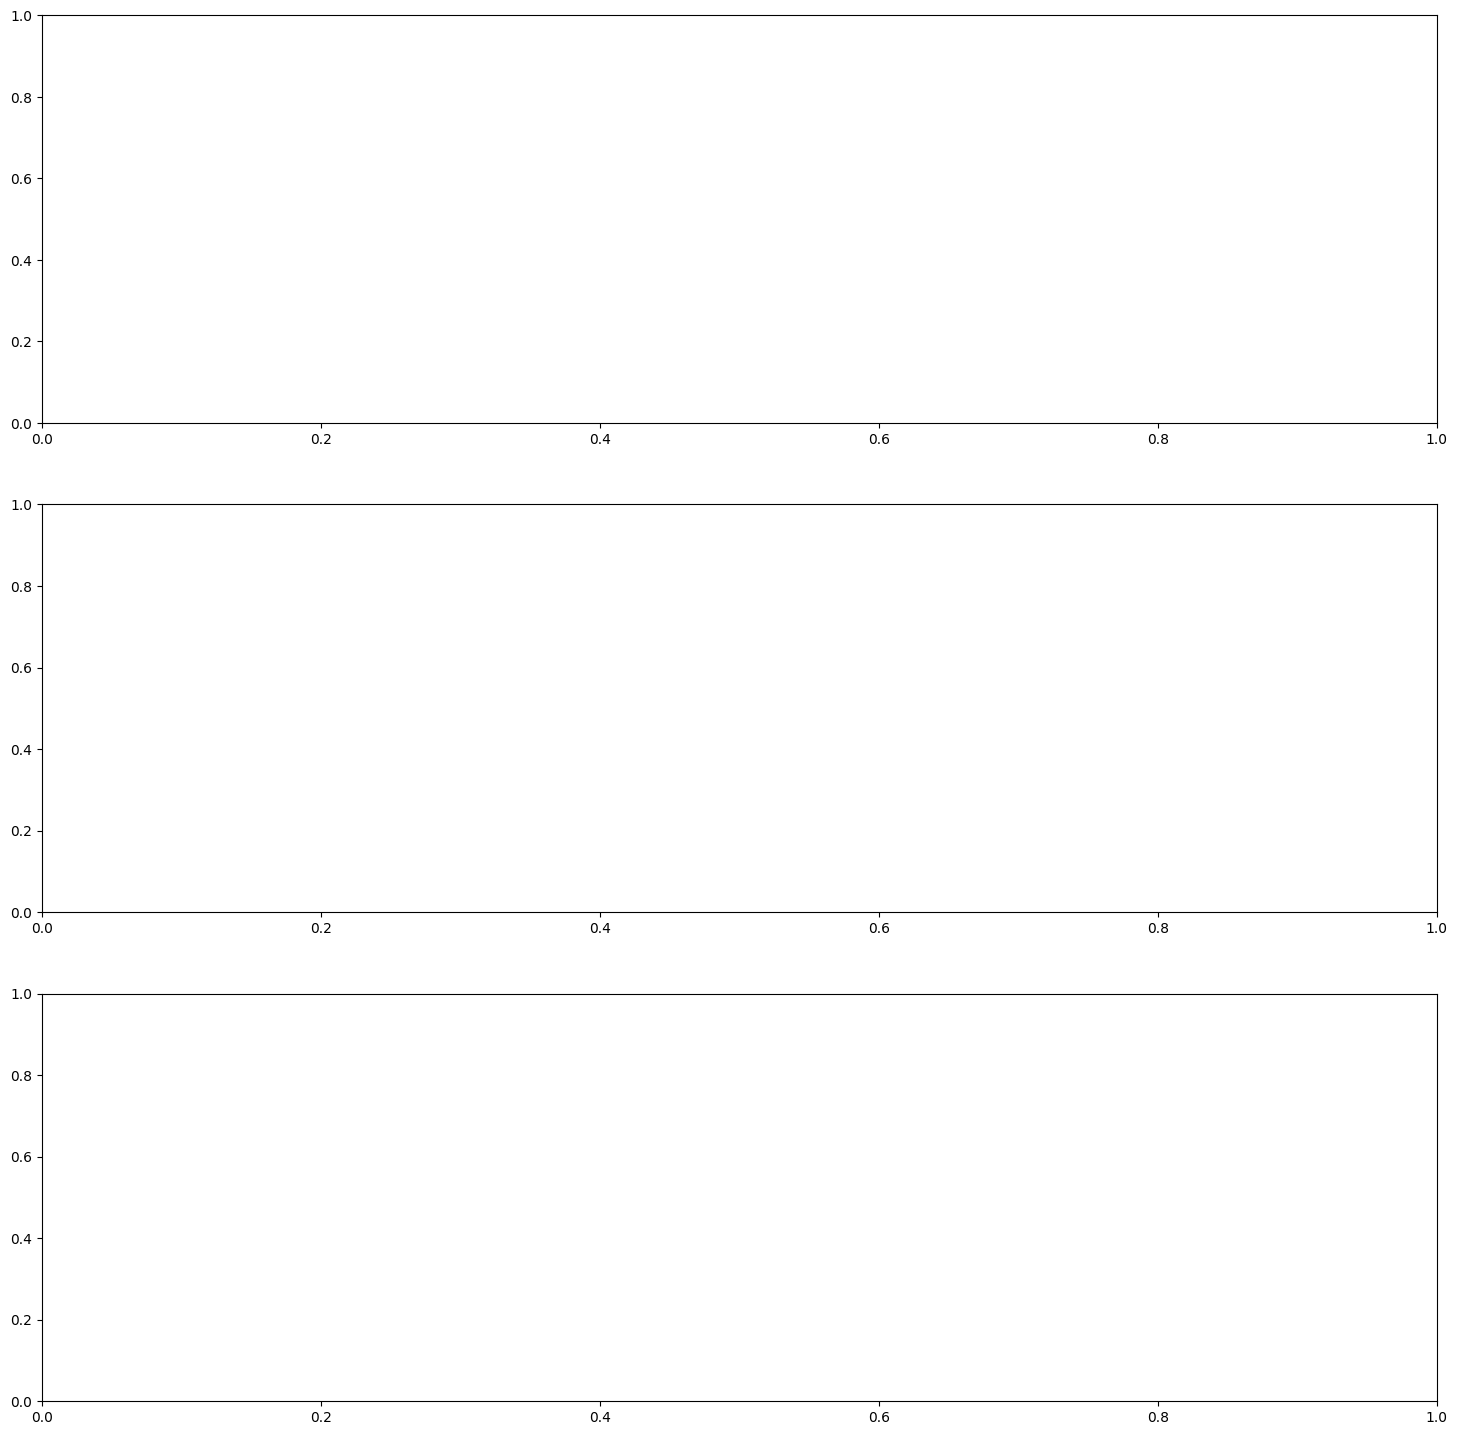

In [ ]:
# Plot the results
# Plot the results
model_names = list(architectures.keys())
balancing_methods = list(results.keys())
plot_results(results, model_names,balancing_methods, filename=' all_my_plot_50epochs.png')

In [ ]:
# Plot the results
model_names = list(architectures.keys())
balancing_methods = list(results.keys())
plot_results2(results, model_names,  filename='all_my_plot_50epochs.png')


##### Results

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

csv_file_path = "/content/results_summary_final.csv"

results_data = pd.read_csv(csv_file_path)

results_data

Model Name        Architecture  Test Accuracy  Test AUC  \
0             Unbalanced              1D CNN       0.982371  0.999083   
1             Unbalanced  Bidirectional LSTM       0.985707  0.999111   
2             Unbalanced                 GRU       0.980890  0.999077   
3             Unbalanced                LSTM       0.984079  0.999009   
4             Unbalanced                 RNN       0.986828  0.999162   
5    Random Oversampling              1D CNN       0.910950  0.994520   
6    Random Oversampling  Bidirectional LSTM       0.937803  0.996171   
7    Random Oversampling                 GRU       0.950636  0.997184   
8    Random Oversampling                LSTM       0.962034  0.998606   
9    Random Oversampling                 RNN       0.957282  0.998132   
10  Random Undersampling              1D CNN       0.884058  0.985575   
11  Random Undersampling  Bidirectional LSTM       0.888889  0.990122   
12  Random Undersampling                 GRU       0.856582  0.980594   
13  Random Undersampling                LSTM       0.636473  0.880649   
14  Random Undersampling                 RNN       0.891304  0.990992   
15                 SMOTE              1D CNN       0.945881  0.997350   
16                 SMOTE  Bidirectional LSTM       0.986317  0.999496   
17                 SMOTE                 GRU       0.965995  0.998699   
18                 SMOTE                LSTM       0.952330  0.995379   
19                 SMOTE                 RNN       0.959214  0.998228   
20                ADASYN              1D CNN       0.946129  0.997366   
21                ADASYN  Bidirectional LSTM       0.987445  0.999591   
22                ADASYN                 GRU       0.967947  0.998777   
23                ADASYN                LSTM       0.960128  0.998381   
24                ADASYN                 RNN       0.959896  0.998016   
25           SMOTE + ENN              1D CNN       0.963156  0.998653   
26           SMOTE + ENN  Bidirectional LSTM       0.992063  0.999809   
27           SMOTE + ENN                 GRU       0.978690  0.999423   
28           SMOTE + ENN                LSTM       0.977140  0.999285   
29           SMOTE + ENN                 RNN       0.977739  0.999411   

    Training Time                              Classification Report  
0      155.256784                precision    recall  f1-score   ...  
1      213.933008                precision    recall  f1-score   ...  
2      131.956855                precision    recall  f1-score   ...  
3      192.985629                precision    recall  f1-score   ...  
4      125.016157                precision    recall  f1-score   ...  
5      285.488235                precision    recall  f1-score   ...  
6      173.590628                precision    recall  f1-score   ...  
7      324.779666                precision    recall  f1-score   ...  
8      688.957321                precision    recall  f1-score   ...  
9      382.338740                precision    recall  f1-score   ...  
10      58.065483                precision    recall  f1-score   ...  
11      64.644872                precision    recall  f1-score   ...  
12      58.995793                precision    recall  f1-score   ...  
13      30.871294                precision    recall  f1-score   ...  
14      39.607422                precision    recall  f1-score   ...  
15     342.028477                precision    recall  f1-score   ...  
16     414.259162                precision    recall  f1-score   ...  
17     693.051866                precision    recall  f1-score   ...  
18     689.061822                precision    recall  f1-score   ...  
19     194.284147                precision    recall  f1-score   ...  
20     436.720958                precision    recall  f1-score   ...  
21     803.723843                precision    recall  f1-score   ...  
22     695.074479                precision    recall  f1-score   ...  
23     487.478541                precision    

In [ ]:
methods = {
        'Unbalanced': lambda X, y: (X, y),  # Evaluate on the original unbalanced dataset
        'Random Oversampling': random_oversample,
        'Random Undersampling': random_undersample,
        'SMOTE': smote_balance,
        'ADASYN': adasyn_balance,
        'SMOTE + ENN': smote_enn_balance
    }

# Update the architectures dictionary to include the new model
architectures = {
    '1D CNN': create_1d_cnn_model,
    'Bidirectional LSTM': create_bidirectional_lstm_model,
    'GRU': create_gru_model,
    'LSTM': create_lstm_model,
    'RNN': create_rnn_model
}
model_names = list(architectures.keys())
balancing_methods = list(methods.keys())


In [ ]:
model_names

['1D CNN', 'Bidirectional LSTM', 'GRU', 'LSTM', 'RNN']

In [ ]:
balancing_methods

['Unbalanced',
 'Random Oversampling',
 'Random Undersampling',
 'SMOTE',
 'ADASYN',
 'SMOTE + ENN']

In [ ]:
# Define the balancing methods
balancing_methods = ['Unbalanced', 'Random Oversampling', 'Random Undersampling', 'SMOTE', 'ADASYN', 'SMOTE + ENN']  # Remove leading spaces

df = results_data.copy()
# Create a mapping for the prefixes
prefix_mapping = {
    'Unbalanced': 'Unbalanced',
    'Random Oversampling': 'Random Oversampling',
    'Random Undersampling': 'Random Undersampling',
    'SMOTE': 'SMOTE',
    'ADASYN': 'ADASYN',
    'SMOTE + ENN': 'SMOTE + ENN'
}

# Update the Model Name column
for method in balancing_methods:
    df['Model Name'] = df['Model Name'].str.replace(method, prefix_mapping[method], regex=False)

# Display the updated DataFrame
df

Model Name        Architecture  \
0                         Unbalanced_1D CNN              1D CNN   
1             Unbalanced_Bidirectional LSTM  Bidirectional LSTM   
2                            Unbalanced_GRU                 GRU   
3                           Unbalanced_LSTM                LSTM   
4                            Unbalanced_RNN                 RNN   
5                Random Oversampling_1D CNN              1D CNN   
6    Random Oversampling_Bidirectional LSTM  Bidirectional LSTM   
7                   Random Oversampling_GRU                 GRU   
8                  Random Oversampling_LSTM                LSTM   
9                   Random Oversampling_RNN                 RNN   
10              Random Undersampling_1D CNN              1D CNN   
11  Random Undersampling_Bidirectional LSTM  Bidirectional LSTM   
12                 Random Undersampling_GRU                 GRU   
13                Random Undersampling_LSTM                LSTM   
14                 Random Undersampling_RNN                 RNN   
15                             SMOTE_1D CNN              1D CNN   
16                 SMOTE_Bidirectional LSTM  Bidirectional LSTM   
17                                SMOTE_GRU                 GRU   
18                               SMOTE_LSTM                LSTM   
19                                SMOTE_RNN                 RNN   
20                            ADASYN_1D CNN              1D CNN   
21                ADASYN_Bidirectional LSTM  Bidirectional LSTM   
22                               ADASYN_GRU                 GRU   
23                              ADASYN_LSTM                LSTM   
24                               ADASYN_RNN                 RNN   
25                       SMOTE + ENN_1D CNN              1D CNN   
26           SMOTE + ENN_Bidirectional LSTM  Bidirectional LSTM   
27                          SMOTE + ENN_GRU                 GRU   
28                         SMOTE + ENN_LSTM                LSTM   
29                          SMOTE + ENN_RNN                 RNN   

    Test Accuracy  Test AUC  Training Time  \
0        0.982371  0.999083     155.256784   
1        0.985707  0.999111     213.933008   
2        0.980890  0.999077     131.956855   
3        0.984079  0.999009     192.985629   
4        0.986828  0.999162     125.016157   
5        0.910950  0.994520     285.488235   
6        0.937803  0.996171     173.590628   
7        0.950636  0.997184     324.779666   
8        0.962034  0.998606     688.957321   
9        0.957282  0.998132     382.338740   
10       0.884058  0.985575      58.065483   
11       0.888889  0.990122      64.644872   
12       0.856582  0.980594      58.995793   
13       0.636473  0.880649      30.871294   
14       0.891304  0.990992      39.607422   
15       0.945881  0.997350     342.028477   
16       0.986317  0.999496     414.259162   
17       0.965995  0.998699     693.051866   
18       0.952330  0.995379     689.061822   
19       0.959214  0.998228     194.284147   
20       0.946129  0.997366     436.720958   
21       0.987445  0.999591     803.723843   
22       0.967947  0.998777     695.074479   
23       0.960128  0.998381     487.478541   
24       0.959896  0.998016     244.493674   
25       0.963156  0.998653     309.045243   
26       0.992063  0.999809     749.251783   
27       0.978690  0.999423     636.004996   
28       0.977140  0.999285     640.394532   
29       0.977739  0.999411     502.022571   

                                Classification Report  
0                 precision    recall  f1-score   ...  
1                 precision    recall  f1-score   ...  
2                 precision    recall  f1-score   ...  
3                 precision    recall  f1-score   ...  
4                 precision    recall  f1-score   ...  
5                 precision    recall  f1-score   ...  
6                 precision    recall  f1-score   ...  
7                 precision    recall  f1-score   ...  
8                 precis

In [ ]:
# Update the Model Name column to only keep the prefix before the underscore
df['Model Name'] = df['Model Name'].str.split('_').str[0]

df

Model Name        Architecture  Test Accuracy  Test AUC  \
0             Unbalanced              1D CNN       0.982371  0.999083   
1             Unbalanced  Bidirectional LSTM       0.985707  0.999111   
2             Unbalanced                 GRU       0.980890  0.999077   
3             Unbalanced                LSTM       0.984079  0.999009   
4             Unbalanced                 RNN       0.986828  0.999162   
5    Random Oversampling              1D CNN       0.910950  0.994520   
6    Random Oversampling  Bidirectional LSTM       0.937803  0.996171   
7    Random Oversampling                 GRU       0.950636  0.997184   
8    Random Oversampling                LSTM       0.962034  0.998606   
9    Random Oversampling                 RNN       0.957282  0.998132   
10  Random Undersampling              1D CNN       0.884058  0.985575   
11  Random Undersampling  Bidirectional LSTM       0.888889  0.990122   
12  Random Undersampling                 GRU       0.856582  0.980594   
13  Random Undersampling                LSTM       0.636473  0.880649   
14  Random Undersampling                 RNN       0.891304  0.990992   
15                 SMOTE              1D CNN       0.945881  0.997350   
16                 SMOTE  Bidirectional LSTM       0.986317  0.999496   
17                 SMOTE                 GRU       0.965995  0.998699   
18                 SMOTE                LSTM       0.952330  0.995379   
19                 SMOTE                 RNN       0.959214  0.998228   
20                ADASYN              1D CNN       0.946129  0.997366   
21                ADASYN  Bidirectional LSTM       0.987445  0.999591   
22                ADASYN                 GRU       0.967947  0.998777   
23                ADASYN                LSTM       0.960128  0.998381   
24                ADASYN                 RNN       0.959896  0.998016   
25           SMOTE + ENN              1D CNN       0.963156  0.998653   
26           SMOTE + ENN  Bidirectional LSTM       0.992063  0.999809   
27           SMOTE + ENN                 GRU       0.978690  0.999423   
28           SMOTE + ENN                LSTM       0.977140  0.999285   
29           SMOTE + ENN                 RNN       0.977739  0.999411   

    Training Time                              Classification Report  
0      155.256784                precision    recall  f1-score   ...  
1      213.933008                precision    recall  f1-score   ...  
2      131.956855                precision    recall  f1-score   ...  
3      192.985629                precision    recall  f1-score   ...  
4      125.016157                precision    recall  f1-score   ...  
5      285.488235                precision    recall  f1-score   ...  
6      173.590628                precision    recall  f1-score   ...  
7      324.779666                precision    recall  f1-score   ...  
8      688.957321                precision    recall  f1-score   ...  
9      382.338740                precision    recall  f1-score   ...  
10      58.065483                precision    recall  f1-score   ...  
11      64.644872                precision    recall  f1-score   ...  
12      58.995793                precision    recall  f1-score   ...  
13      30.871294                precision    recall  f1-score   ...  
14      39.607422                precision    recall  f1-score   ...  
15     342.028477                precision    recall  f1-score   ...  
16     414.259162                precision    recall  f1-score   ...  
17     693.051866                precision    recall  f1-score   ...  
18     689.061822                precision    recall  f1-score   ...  
19     194.284147                precision    recall  f1-score   ...  
20     436.720958                precision    recall  f1-score   ...  
21     803.723843                precision    recall  f1-score   ...  
22     695.074479                precision    recall  f1-score   ...  
23     487.478541                precision    

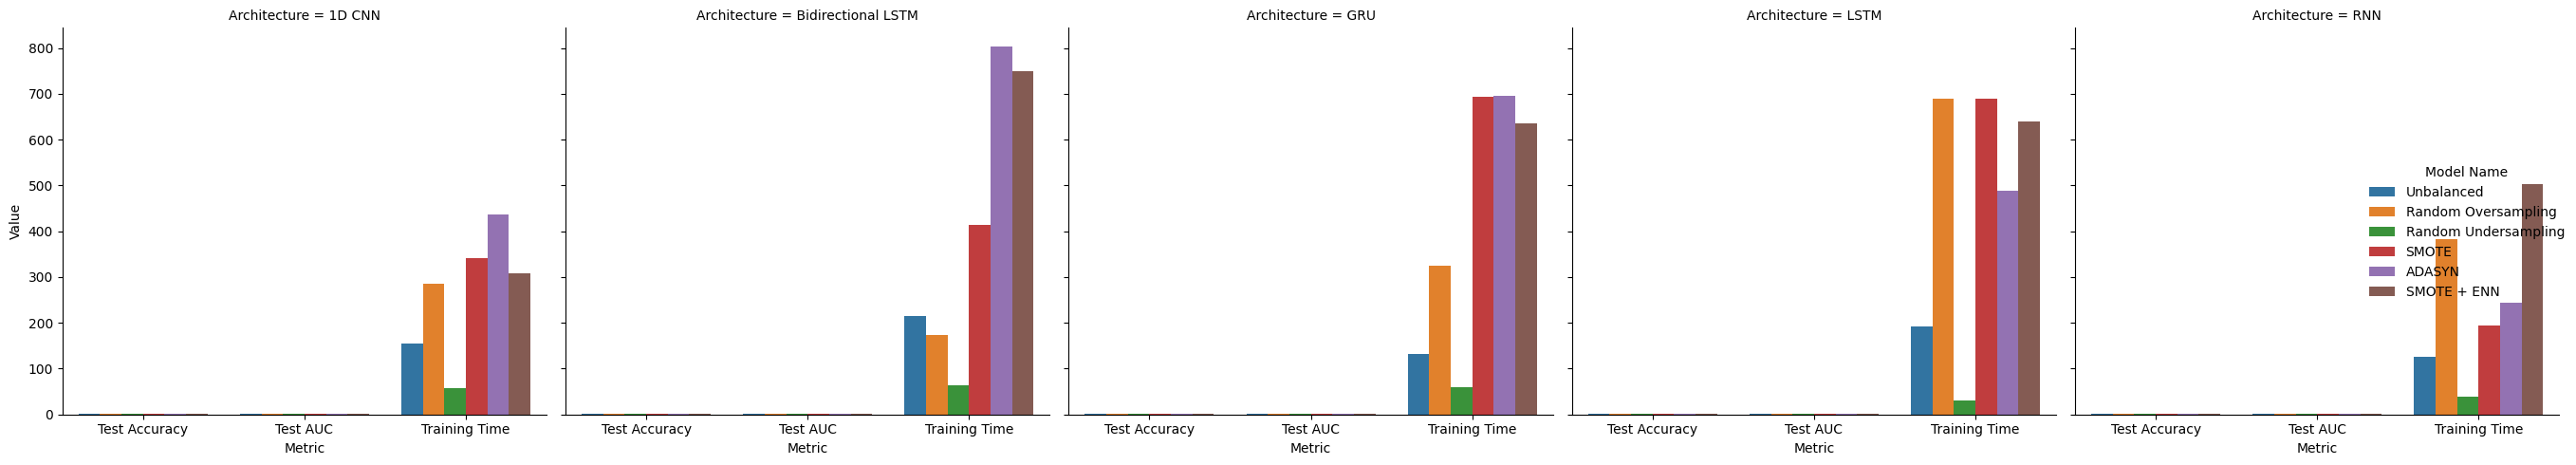

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming results_data is your DataFrame containing the relevant data
df = results_data.copy()

# Reshape the data for plotting
df_melted = df.melt(id_vars=['Model Name', 'Architecture'],
                     value_vars=['Test Accuracy', 'Test AUC', 'Training Time'],
                     var_name='Metric', value_name='Value')

# Create a categorical plot
g = sns.catplot(x='Metric', y='Value', hue='Model Name', col='Architecture',
                data=df_melted, kind='bar', height=5, aspect=1)

# Adjust layout
plt.tight_layout()

# Save the plot to a file
g.savefig('model_comparison_plot.png')  # You can change the filename and format as needed

# Show the plot
plt.show()

<ipython-input-39-818a09fb201f>:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Model_Architecture', y='Value', hue='Metric', data=metrics_df_melted,


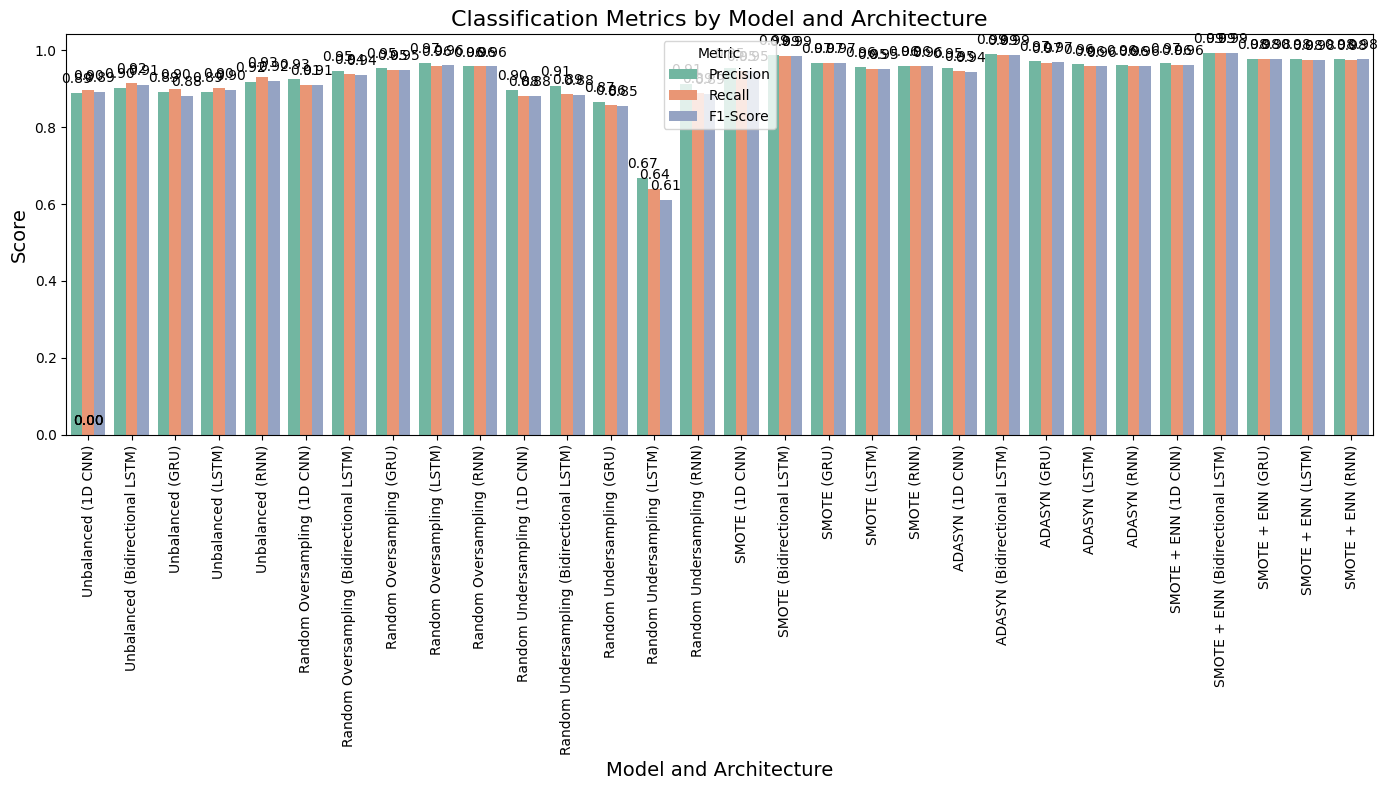

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

# Assuming results_data is your DataFrame
df = results_data.copy()

# Function to extract precision, recall, and f1-score from the classification report
def extract_metrics(report):
    lines = report.split('\n')[2:-2]  # Skip the header and footer
    metrics = {}
    for line in lines:
        parts = re.split(r'\s+', line.strip())
        # Check if the line contains valid metrics (avoid 'accuracy' and average lines)
        if len(parts) >= 5 and parts[0].isdigit():  # Check if the first part is a digit (class label)
            metrics[parts[0]] = {
                'precision': float(parts[1]),
                'recall': float(parts[2]),
                'f1-score': float(parts[3])
            }
    return metrics

# Create a new DataFrame for the extracted metrics
metrics_data = []
for index, row in df.iterrows():
    model_metrics = extract_metrics(row['Classification Report'])
    for label, metrics in model_metrics.items():
        metrics_data.append({
            'Model Name': row['Model Name'],
            'Architecture': row['Architecture'],
            'Label': label,
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1-score']
        })

metrics_df = pd.DataFrame(metrics_data)

# Combine Model Name and Architecture for x-axis labels
metrics_df['Model_Architecture'] = metrics_df['Model Name'] + ' (' + metrics_df['Architecture'] + ')'

# Plotting the metrics
plt.figure(figsize=(14, 8))
metrics_df_melted = metrics_df.melt(id_vars=['Model_Architecture', 'Label'],
                                      value_vars=['Precision', 'Recall', 'F1-Score'],
                                      var_name='Metric', value_name='Value')

ax = sns.barplot(x='Model_Architecture', y='Value', hue='Metric', data=metrics_df_melted,
                 palette='Set2', ci=None)

# Add value annotations on the bars in black
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black',  # Set color to black
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Classification Metrics by Model and Architecture', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Model and Architecture', fontsize=14)

# Set x-tick labels to be vertical
plt.xticks(rotation=90)

plt.legend(title='Metric')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('classification_metrics_plot.png', format='png', dpi=300)  # You can change the filename and format as needed

# Show the plot
plt.show()

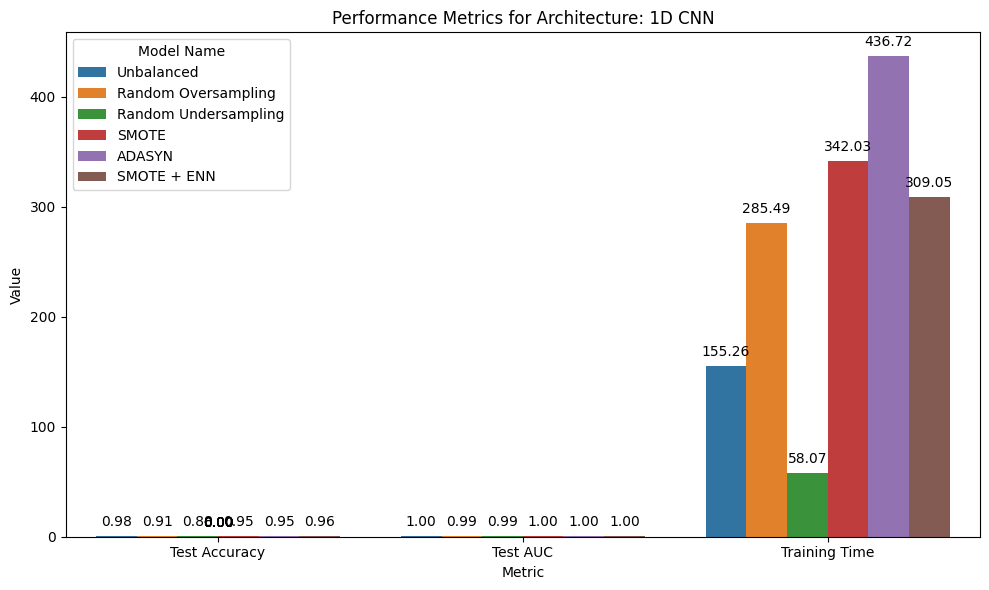

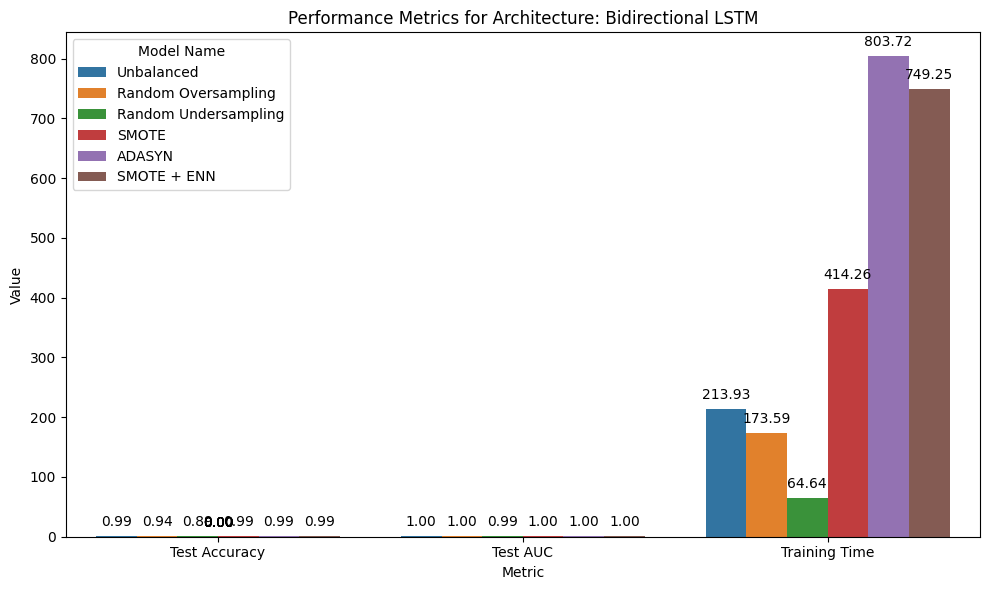

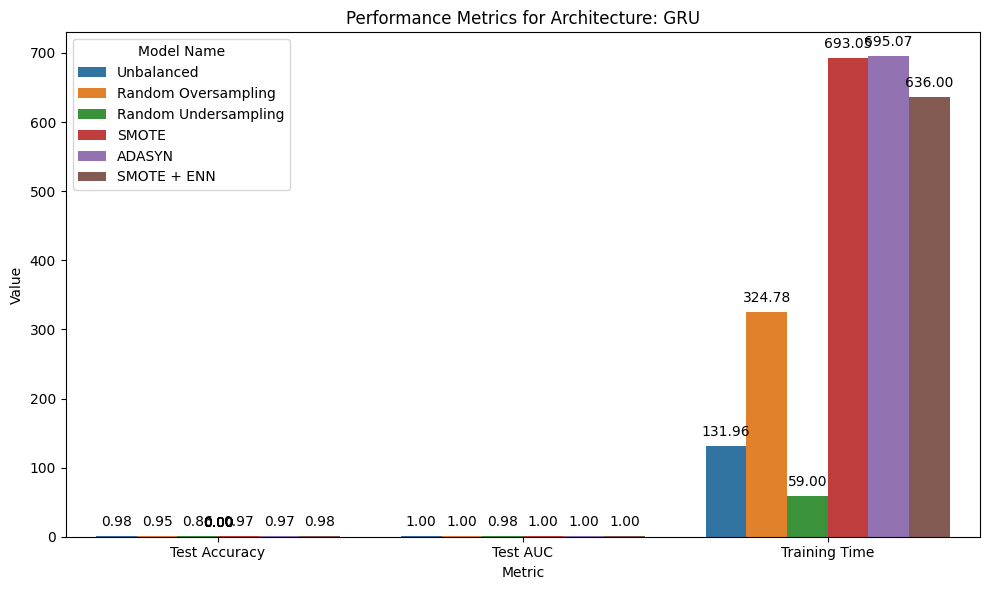

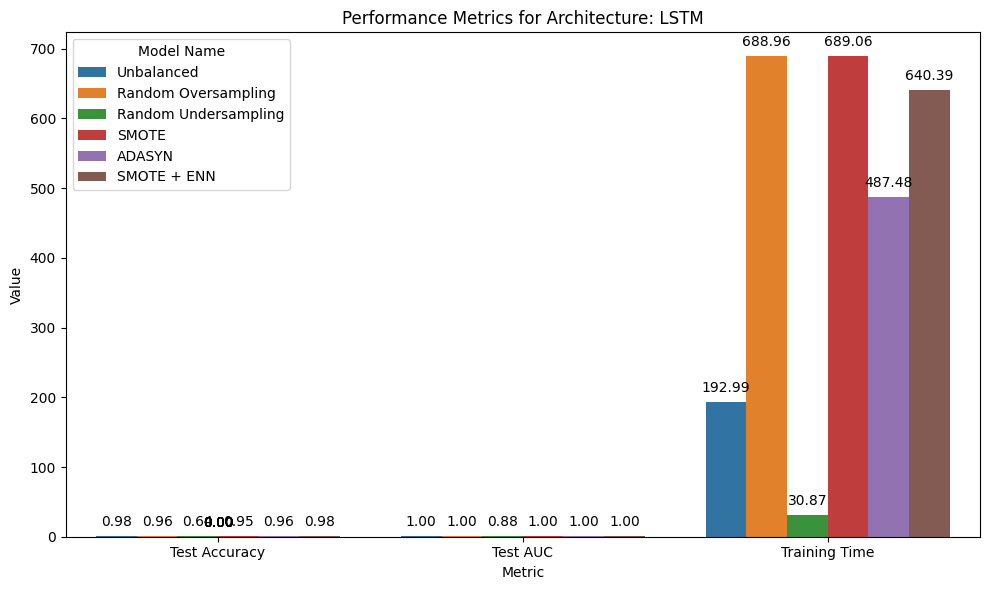

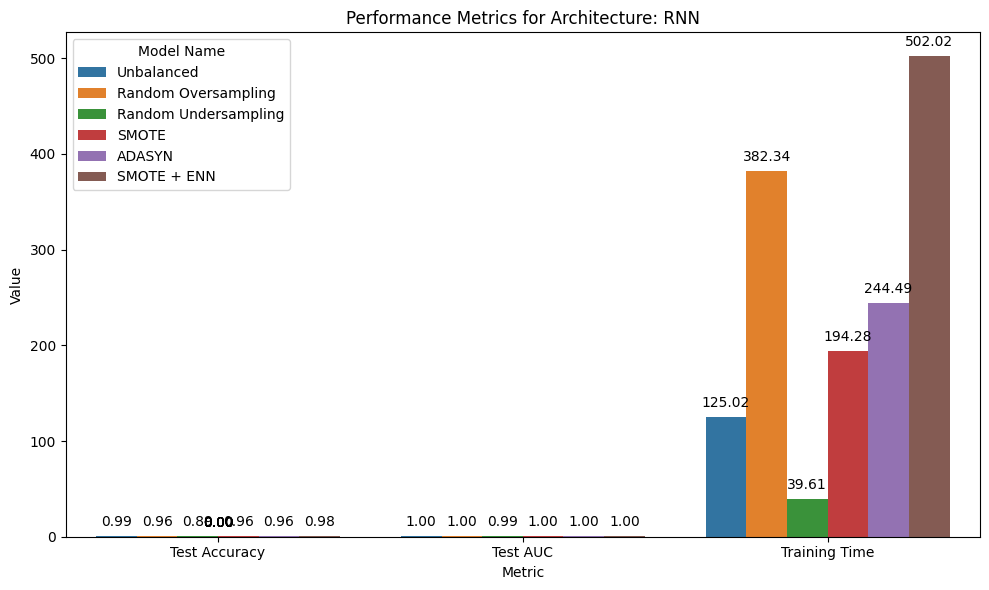

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the relevant data
# Reshape the data for plotting
df_melted = df.melt(id_vars=['Model Name', 'Architecture'],
                     value_vars=['Test Accuracy', 'Test AUC', 'Training Time'],
                     var_name='Metric', value_name='Value')

# Get unique architectures
architectures = df['Architecture'].unique()

# Create a bar plot for each architecture
for architecture in architectures:
    plt.figure(figsize=(10, 6))

    # Filter data for the current architecture
    df_architecture = df_melted[df_melted['Architecture'] == architecture]

    # Create the bar plot
    ax = sns.barplot(x='Metric', y='Value', hue='Model Name', data=df_architecture)

    # Add value annotations on the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=10, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.title(f'Performance Metrics for Architecture: {architecture}')
    plt.ylabel('Value')
    plt.xlabel('Metric')
    plt.legend(title='Model Name')
    plt.tight_layout()
    plt.show()

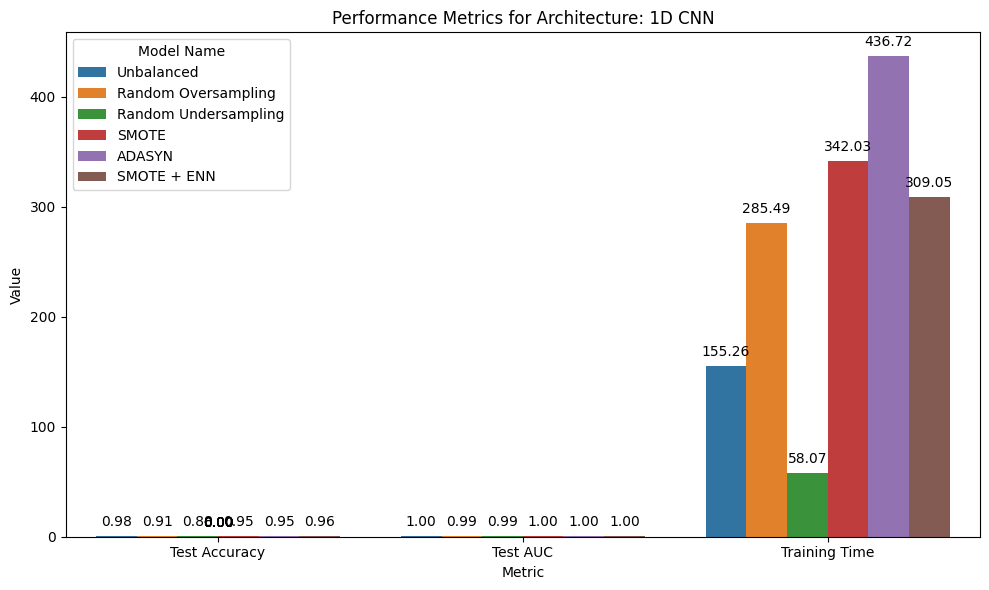

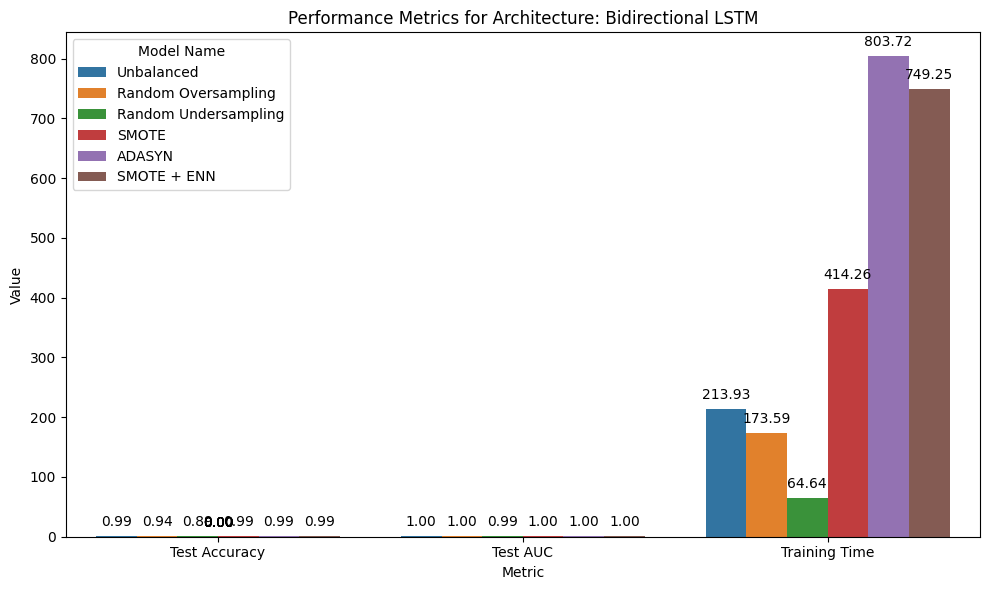

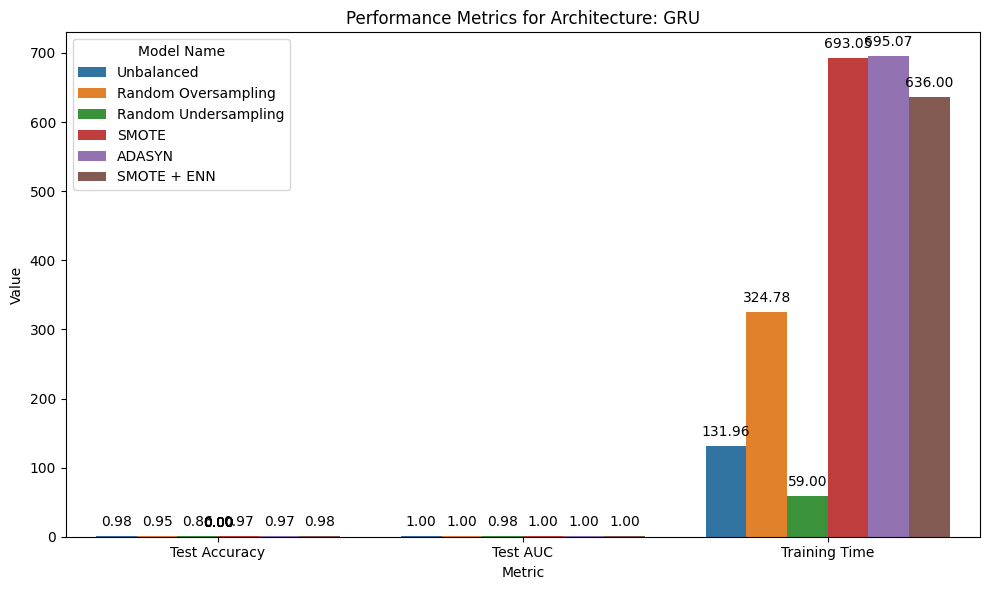

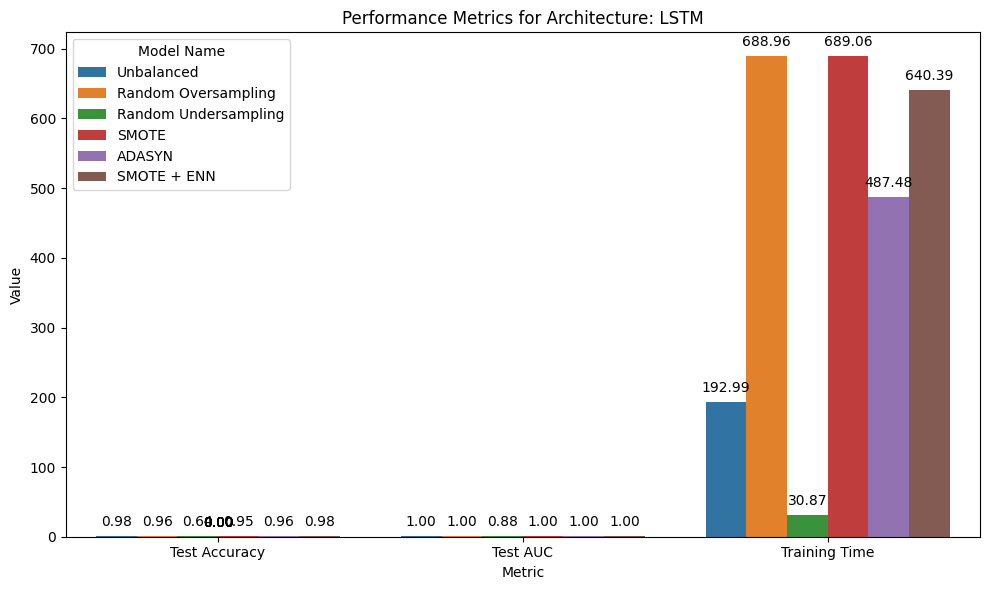

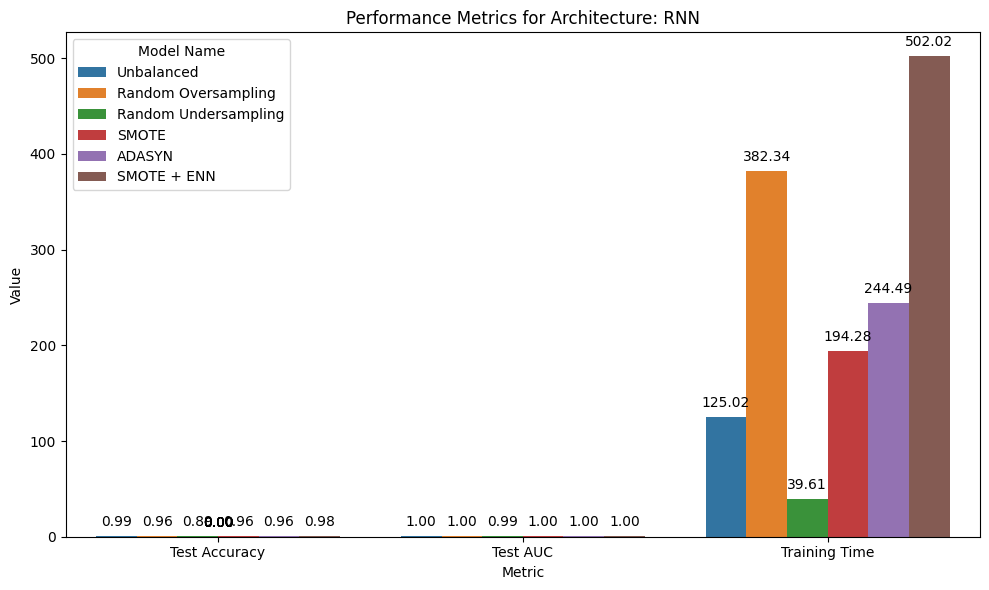

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the relevant data
# Reshape the data for plotting
df_melted = df.melt(id_vars=['Model Name', 'Architecture'],
                     value_vars=['Test Accuracy', 'Test AUC', 'Training Time'],
                     var_name='Metric', value_name='Value')

# Get unique architectures
architectures = df['Architecture'].unique()

# Create a bar plot for each architecture
for architecture in architectures:
    plt.figure(figsize=(10, 6))

    # Filter data for the current architecture
    df_architecture = df_melted[df_melted['Architecture'] == architecture]

    # Create the bar plot
    ax = sns.barplot(x='Metric', y='Value', hue='Model Name', data=df_architecture)

    # Add value annotations on the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=10, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.title(f'Performance Metrics for Architecture: {architecture}')
    plt.ylabel('Value')
    plt.xlabel('Metric')
    plt.legend(title='Model Name')
    plt.tight_layout()

    # Save the plot to a file
    plt.savefig(f'performance_metrics_{architecture}.png')  # Save as PNG file with architecture name

    # Show the plot
    plt.show()

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('results_summary_final.csv', index=False)

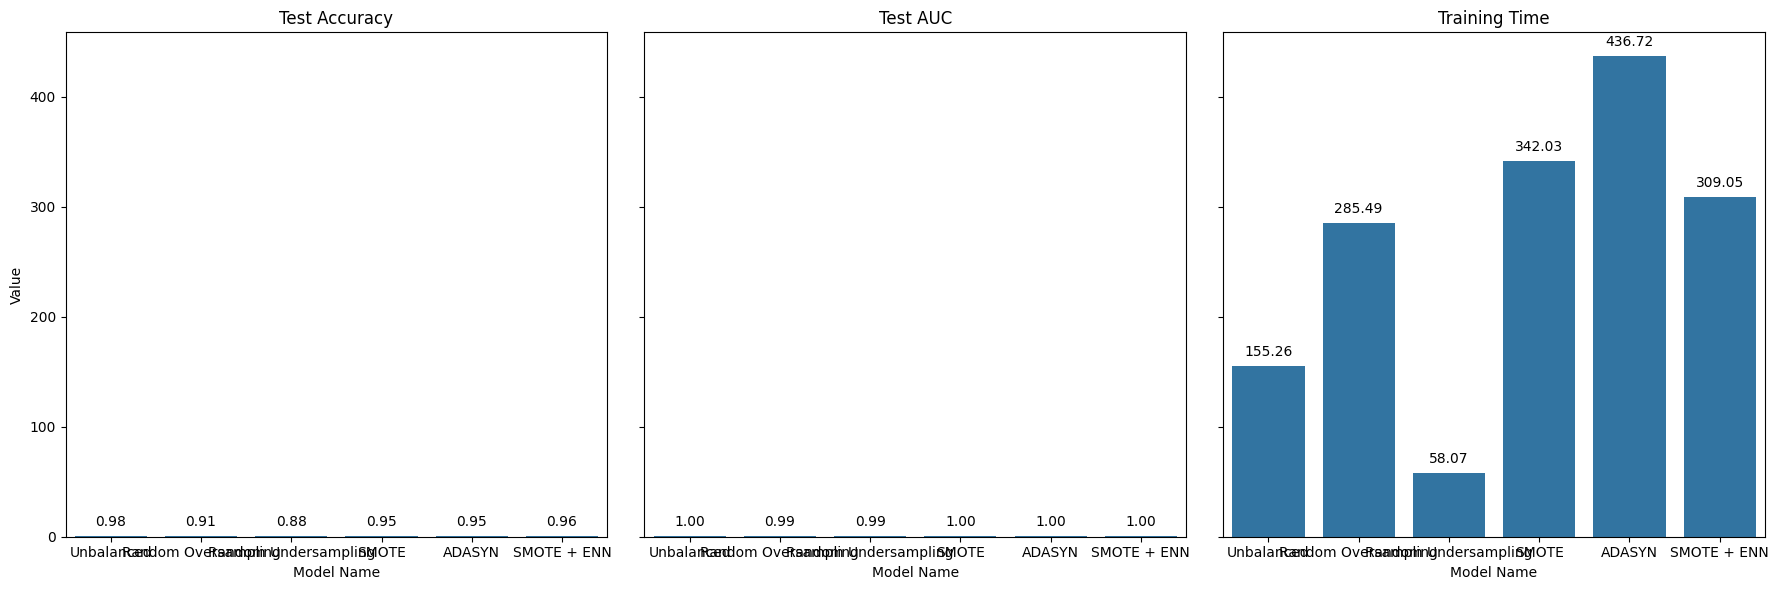

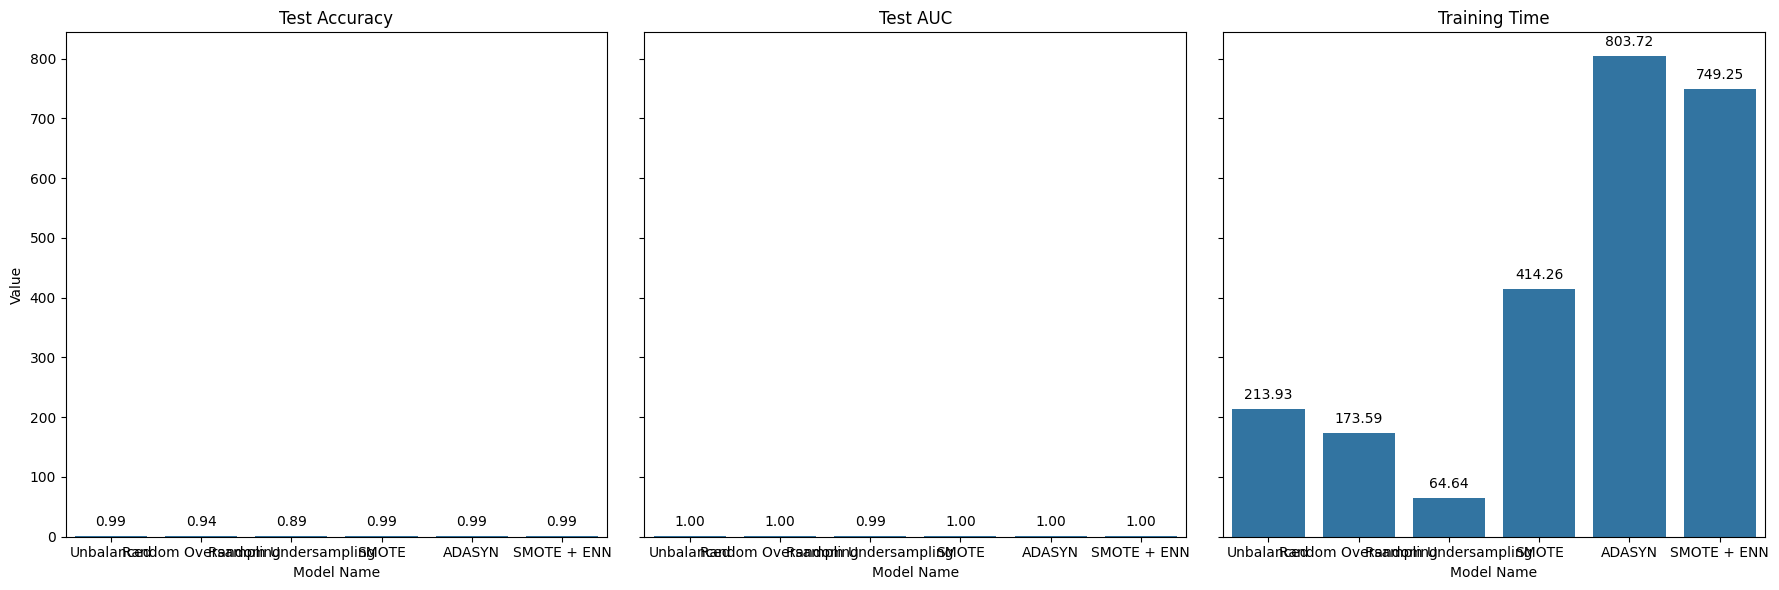

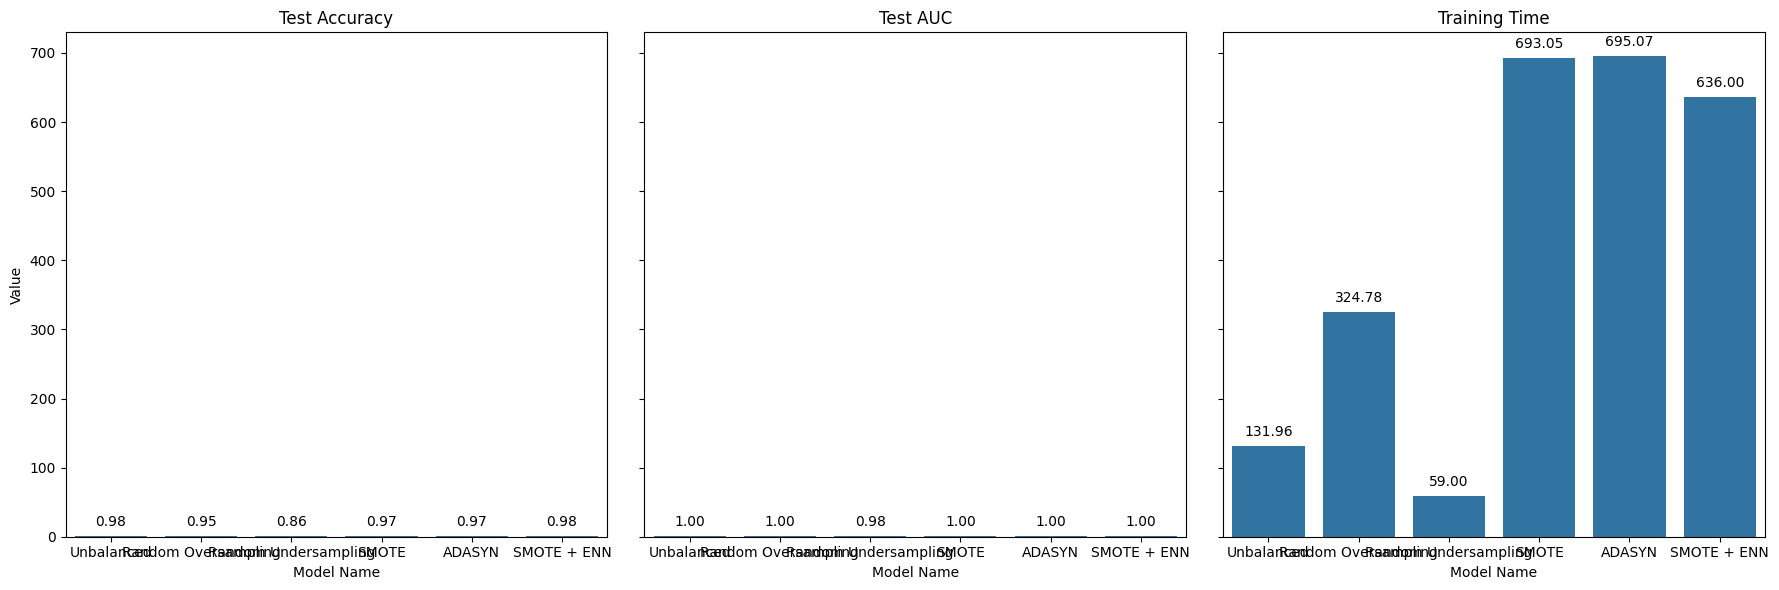

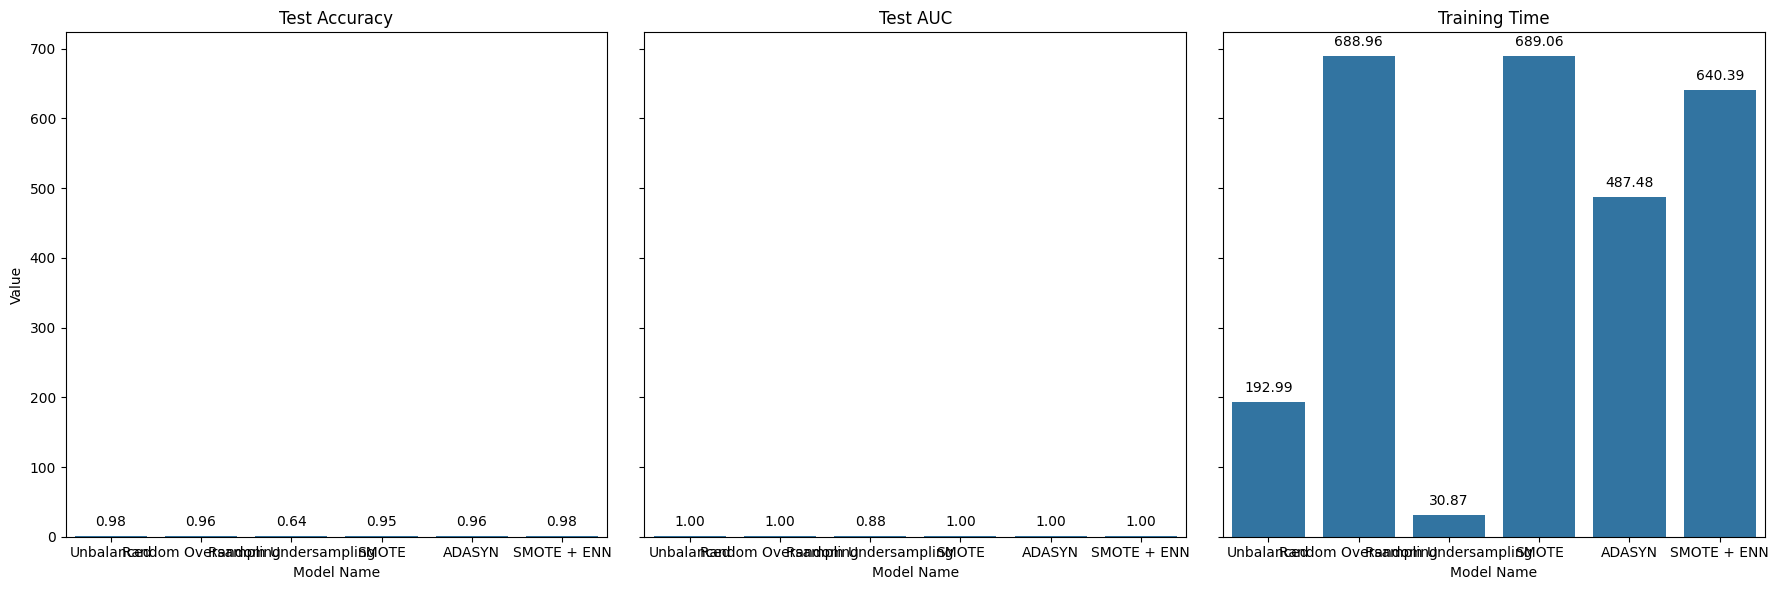

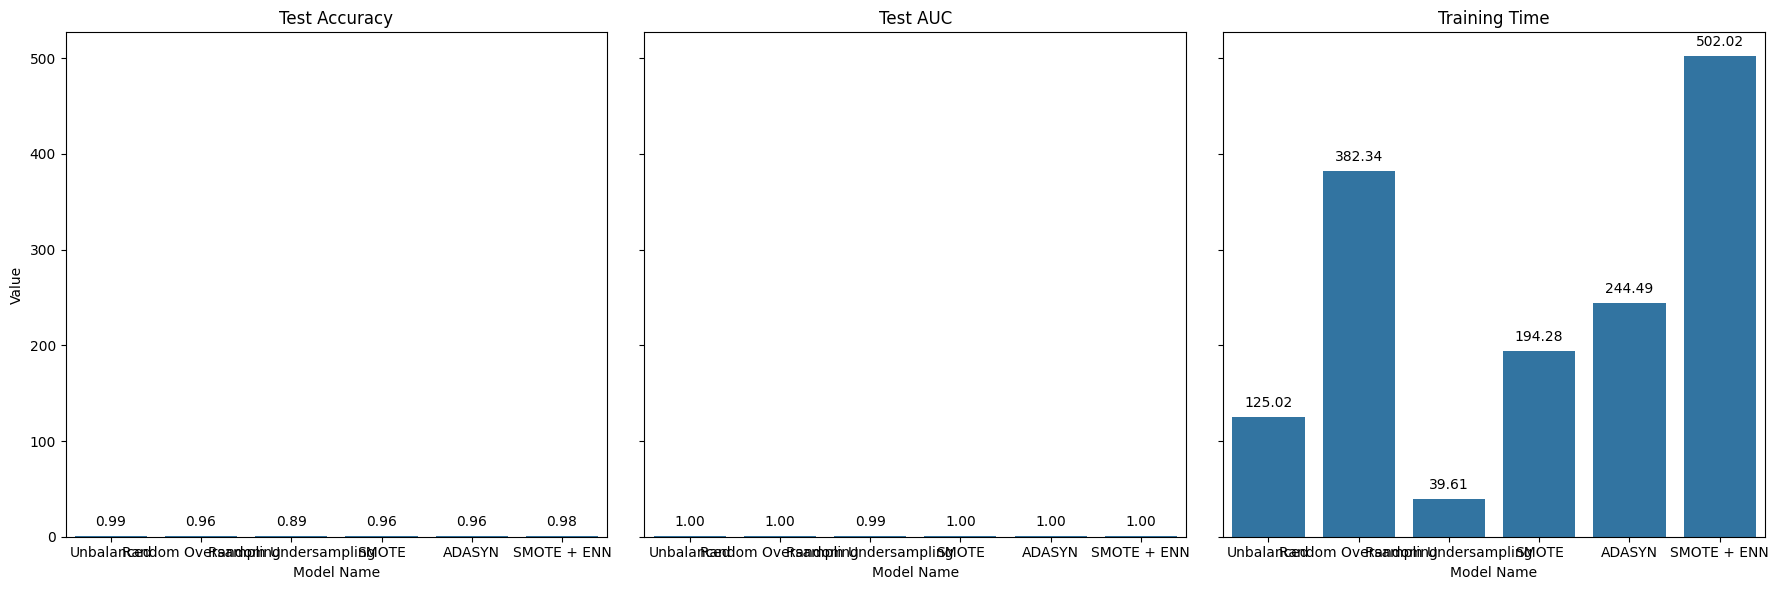

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the relevant data
# Reshape the data for plotting
df_melted = df.melt(id_vars=['Model Name', 'Architecture'],
                     value_vars=['Test Accuracy', 'Test AUC', 'Training Time'],
                     var_name='Metric', value_name='Value')

# Get unique architectures
architectures = df['Architecture'].unique()

# Create a bar plot for each architecture
for architecture in architectures:
    # Create a figure with subplots for each metric
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

    # Define the metrics to plot
    metrics = ['Test Accuracy', 'Test AUC', 'Training Time']

    for ax, metric in zip(axes, metrics):
        # Filter data for the current architecture and metric
        df_metric = df_melted[(df_melted['Architecture'] == architecture) & (df_melted['Metric'] == metric)]

        # Create the bar plot
        sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax)

        # Add value annotations on the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom',
                        fontsize=10, color='black',
                        xytext=(0, 5),
                        textcoords='offset points')

        ax.set_title(metric)
        ax.set_ylabel('Value')
        ax.set_xlabel('Model Name')

    # Adjust layout
    plt.tight_layout()

    # Save the plot to a file
    plt.savefig(f'performance_metrics_{architecture}.png')  # Save as PNG file with architecture name

    # Show the plot
    plt.show()

In [ ]:
df['Test Accuracy'] = df['Test Accuracy'].astype(float)
df['Test AUC'] = df['Test AUC'].astype(float)

<ipython-input-18-5906c02e780a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-18-5906c02e780a>:29: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-18-5906c02e780a>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_metric['Model Name'], rotation=90, ha='center')
<ipython-input-18-5906c02e780a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

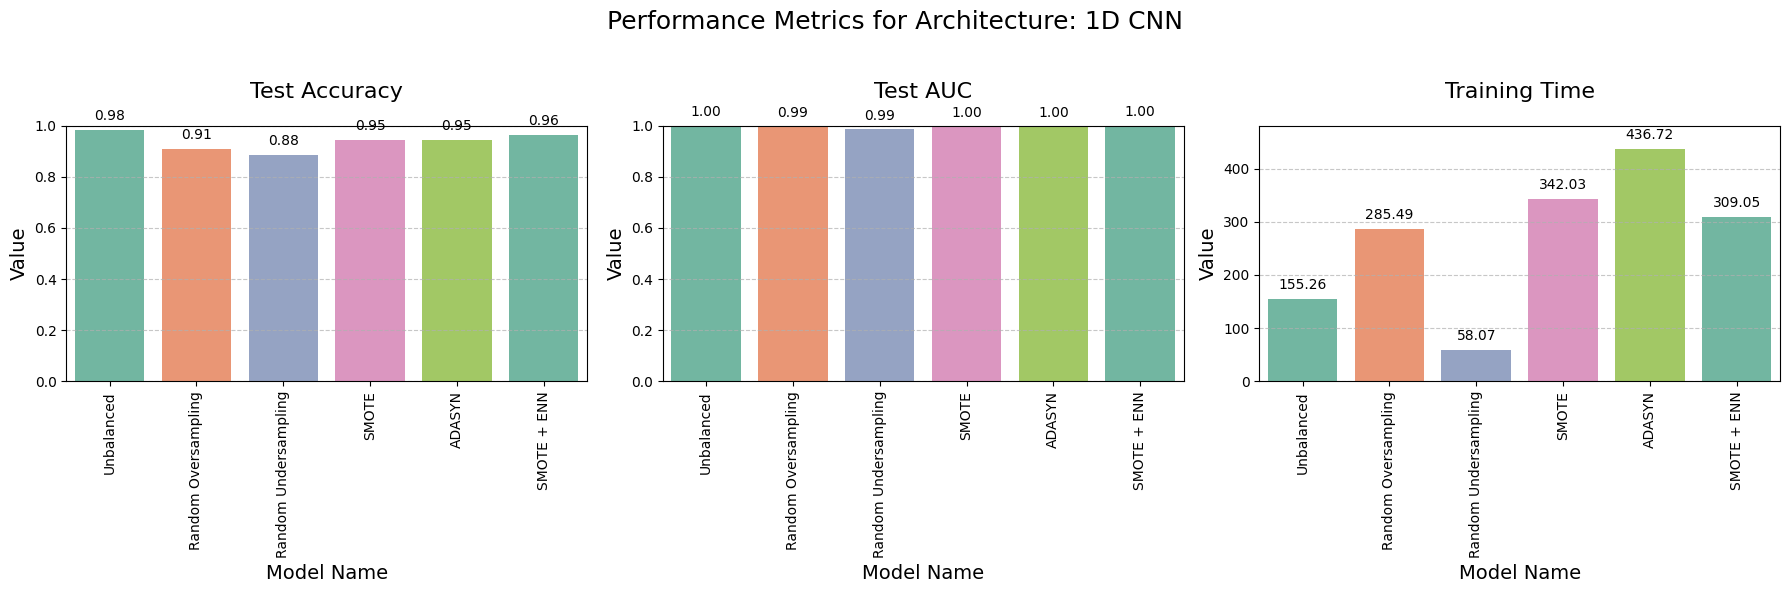

<ipython-input-18-5906c02e780a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-18-5906c02e780a>:29: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-18-5906c02e780a>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_metric['Model Name'], rotation=90, ha='center')
<ipython-input-18-5906c02e780a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

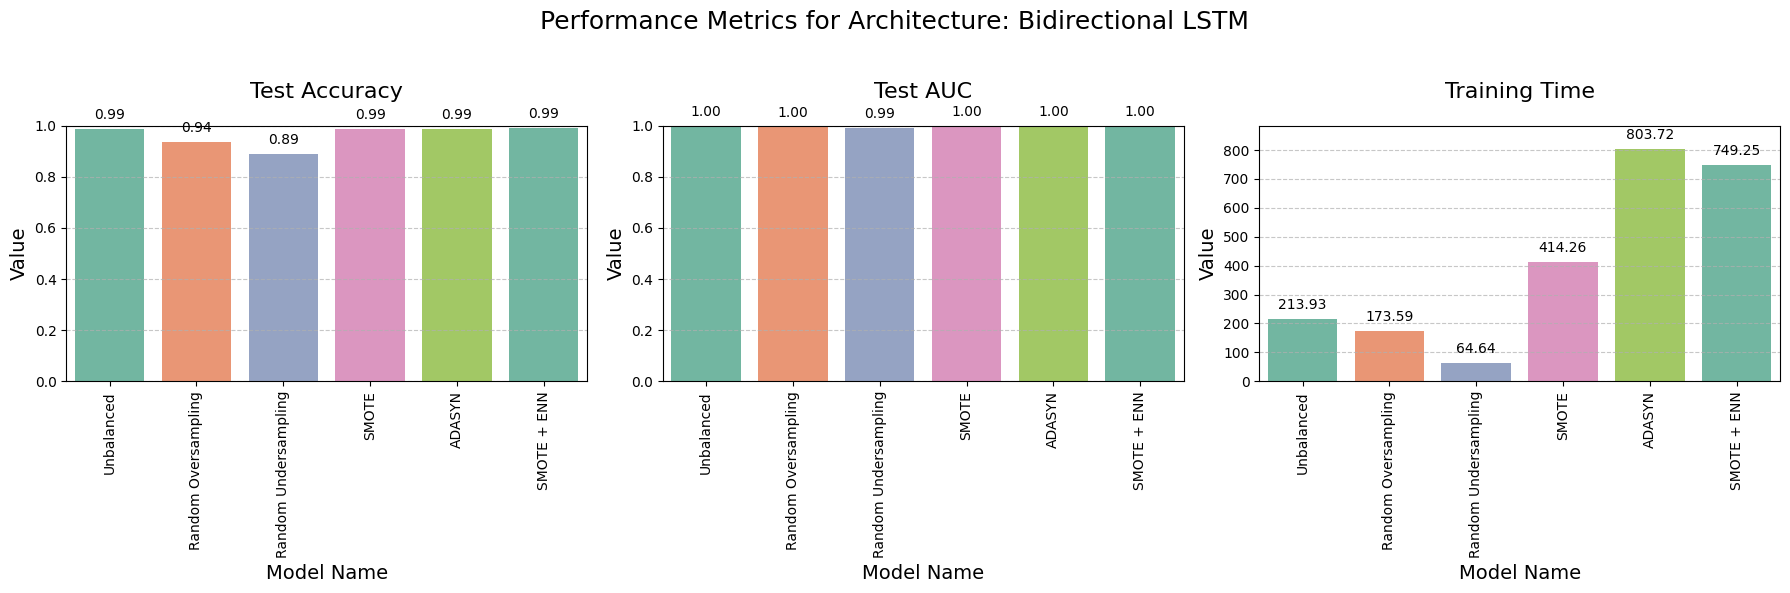

<ipython-input-18-5906c02e780a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-18-5906c02e780a>:29: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-18-5906c02e780a>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_metric['Model Name'], rotation=90, ha='center')
<ipython-input-18-5906c02e780a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

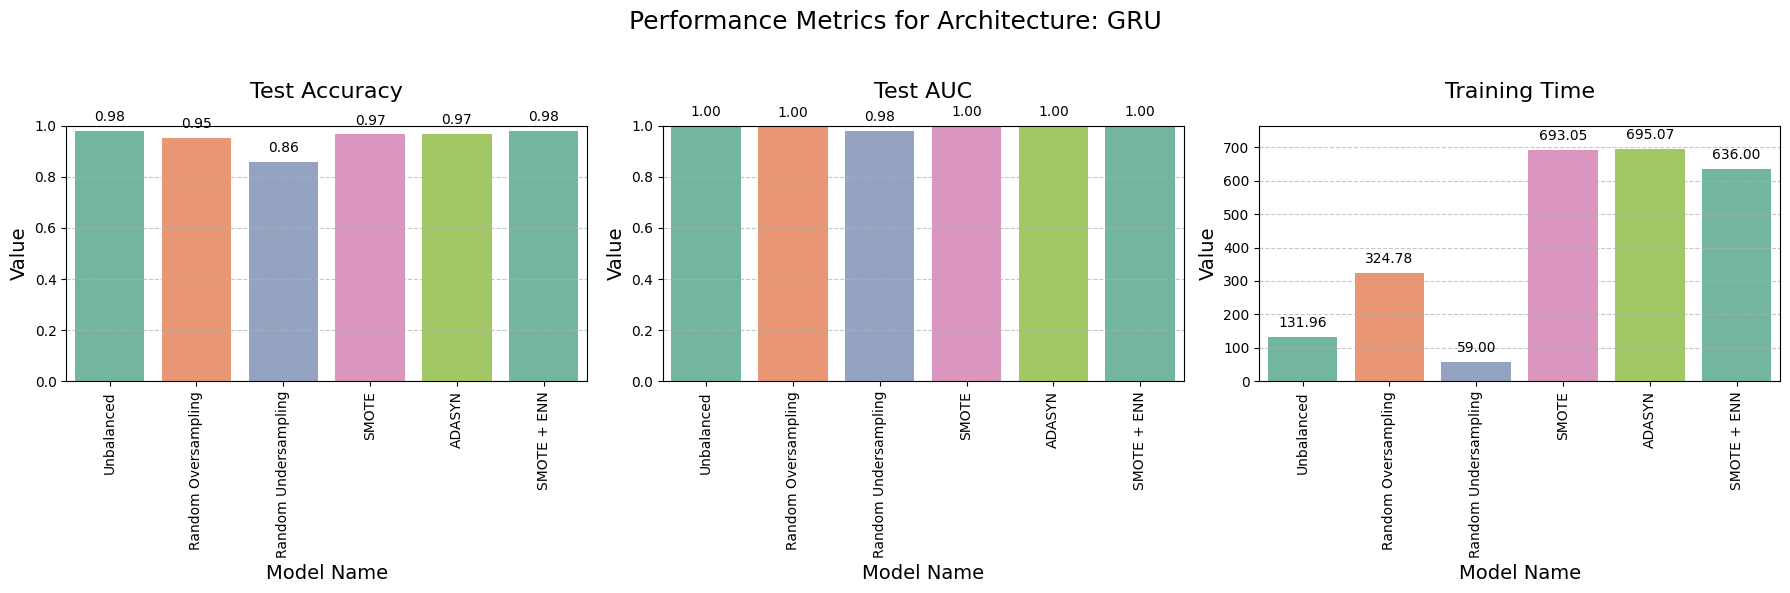

<ipython-input-18-5906c02e780a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-18-5906c02e780a>:29: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-18-5906c02e780a>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_metric['Model Name'], rotation=90, ha='center')
<ipython-input-18-5906c02e780a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

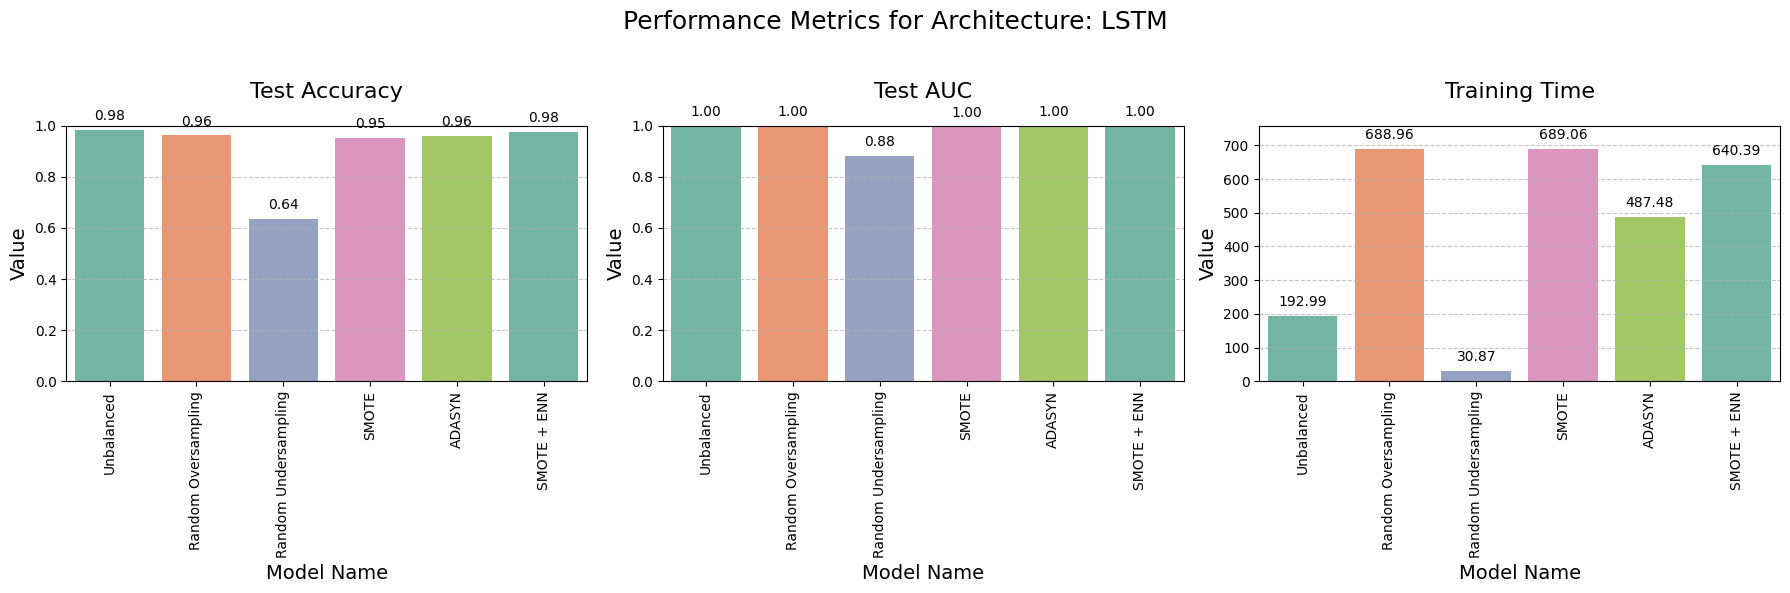

<ipython-input-18-5906c02e780a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-18-5906c02e780a>:29: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-18-5906c02e780a>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_metric['Model Name'], rotation=90, ha='center')
<ipython-input-18-5906c02e780a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

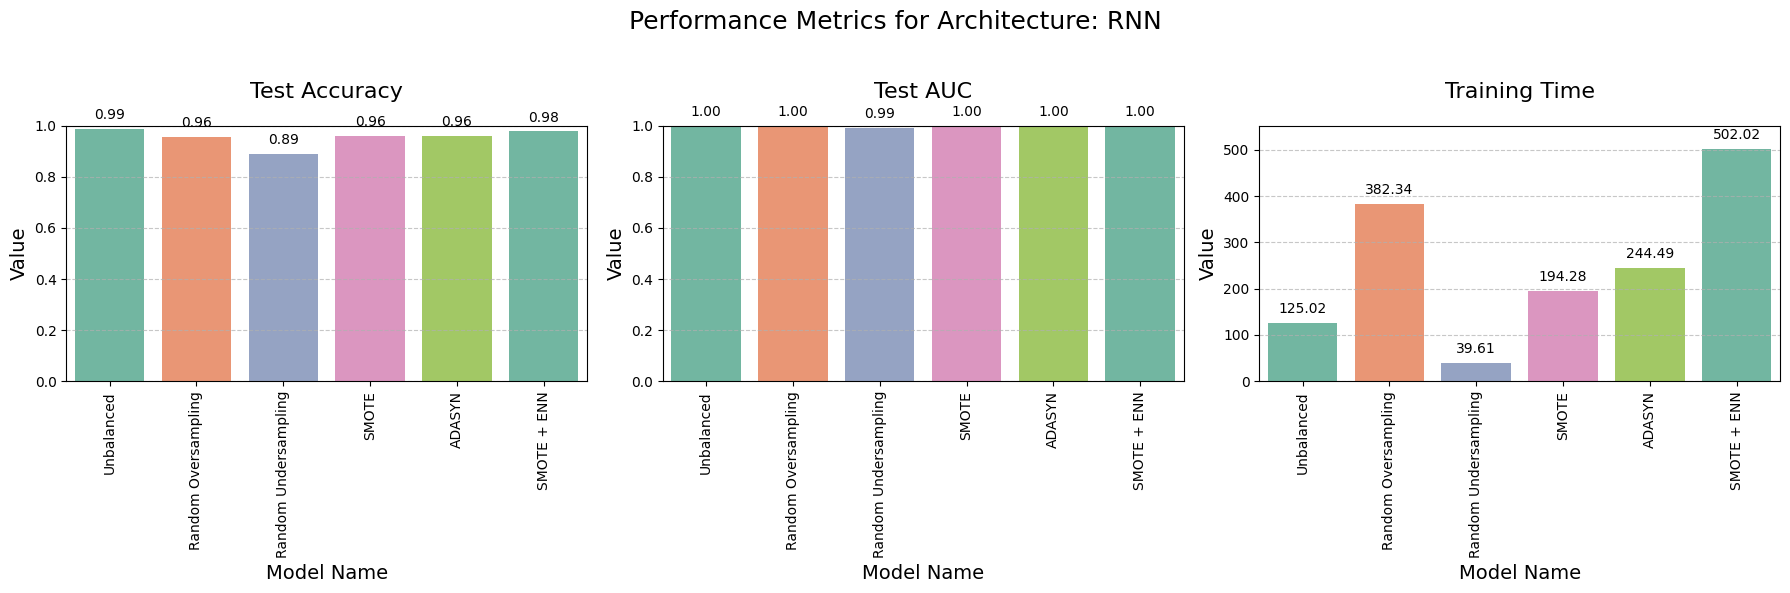

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the relevant data
# Reshape the data for plotting
df_melted = df.melt(id_vars=['Model Name', 'Architecture'],
                     value_vars=['Test Accuracy', 'Test AUC', 'Training Time'],
                     var_name='Metric', value_name='Value')

# Get unique architectures
architectures = df['Architecture'].unique()

# Define a color palette
color_palette = sns.color_palette("Set2", n_colors=len(architectures))

# Create a bar plot for each architecture
for architecture in architectures:
    # Create a figure with subplots for each metric
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=False)

    # Define the metrics to plot
    metrics = ['Test Accuracy', 'Test AUC', 'Training Time']

    for ax, metric in zip(axes, metrics):
        # Filter data for the current architecture and metric
        df_metric = df_melted[(df_melted['Architecture'] == architecture) & (df_melted['Metric'] == metric)]

        # Create the bar plot with a custom color palette
        sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)

        # Add value annotations on the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom',
                        fontsize=10, color='black',
                        xytext=(0, 5),
                        textcoords='offset points')

        # Set the title and labels with padding
        ax.set_title(f'{metric}', fontsize=16, pad=20)  # Increase padding to 20 points
        ax.set_ylabel('Value', fontsize=14)
        ax.set_xlabel('Model Name', fontsize=14)
        ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

        # Set y-axis limits based on the metric
        if metric == 'Test Accuracy' or metric == 'Test AUC':
            ax.set_ylim(0, 1)  # Set limits for accuracy and AUC (0 to 1)
        elif metric == 'Training Time':
            ax.set_ylim(0, df_metric['Value'].max() * 1.1)  # Set limit for training time with a buffer

        # Rotate x-axis labels to vertical
        ax.set_xticklabels(df_metric['Model Name'], rotation=90, ha='center')

    # Set a main title for the figure
    fig.suptitle(f'Performance Metrics for Architecture: {architecture}', fontsize=18)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title

    # Save the plot to a file
    plt.savefig(f'performance_metrics_{architecture}.png', dpi=300)  # Save as PNG file with architecture name

    # Show the plot
    plt.show()

<ipython-input-33-848f6475122c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-33-848f6475122c>:33: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-33-848f6475122c>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_metric['Model Name'], rotation=90, ha='center')
<ipython-input-33-848f6475122c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

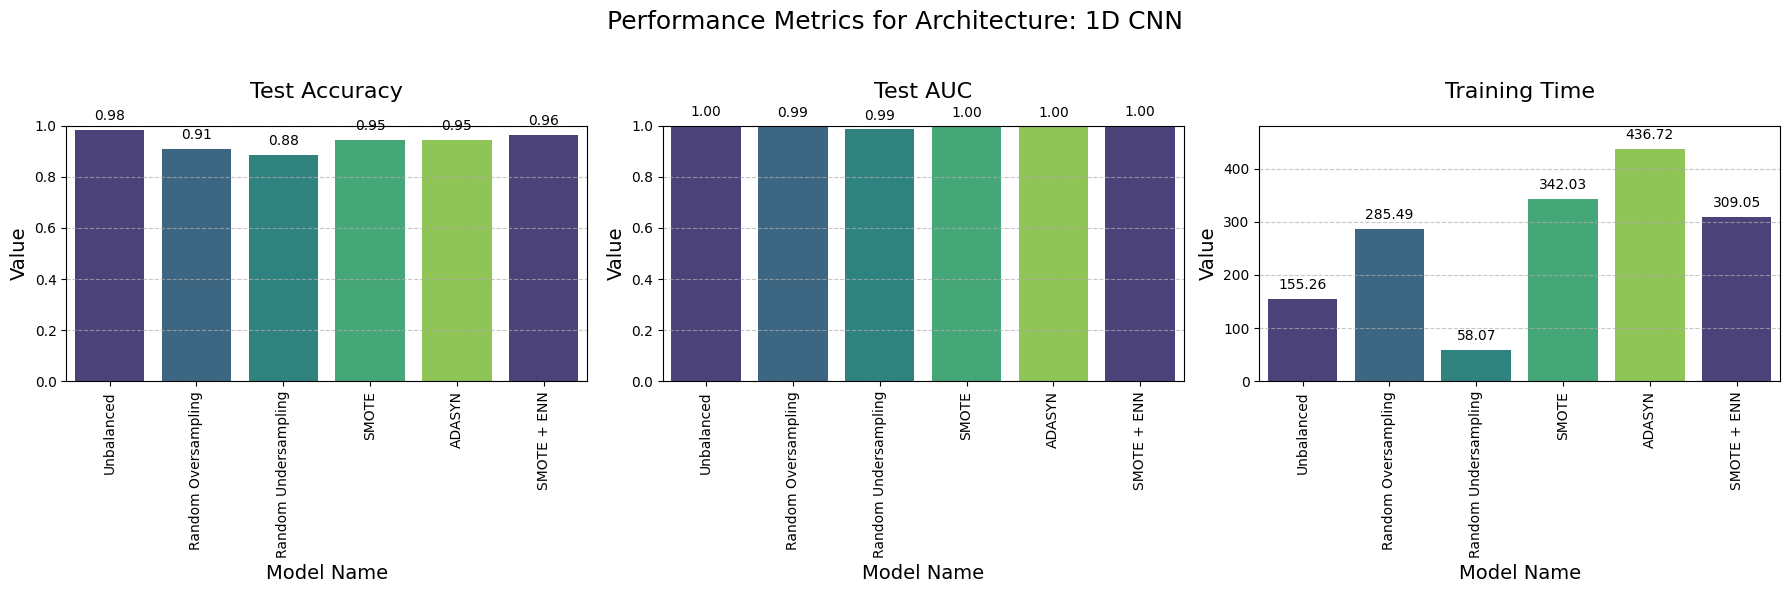

<ipython-input-33-848f6475122c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-33-848f6475122c>:33: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-33-848f6475122c>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_metric['Model Name'], rotation=90, ha='center')
<ipython-input-33-848f6475122c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

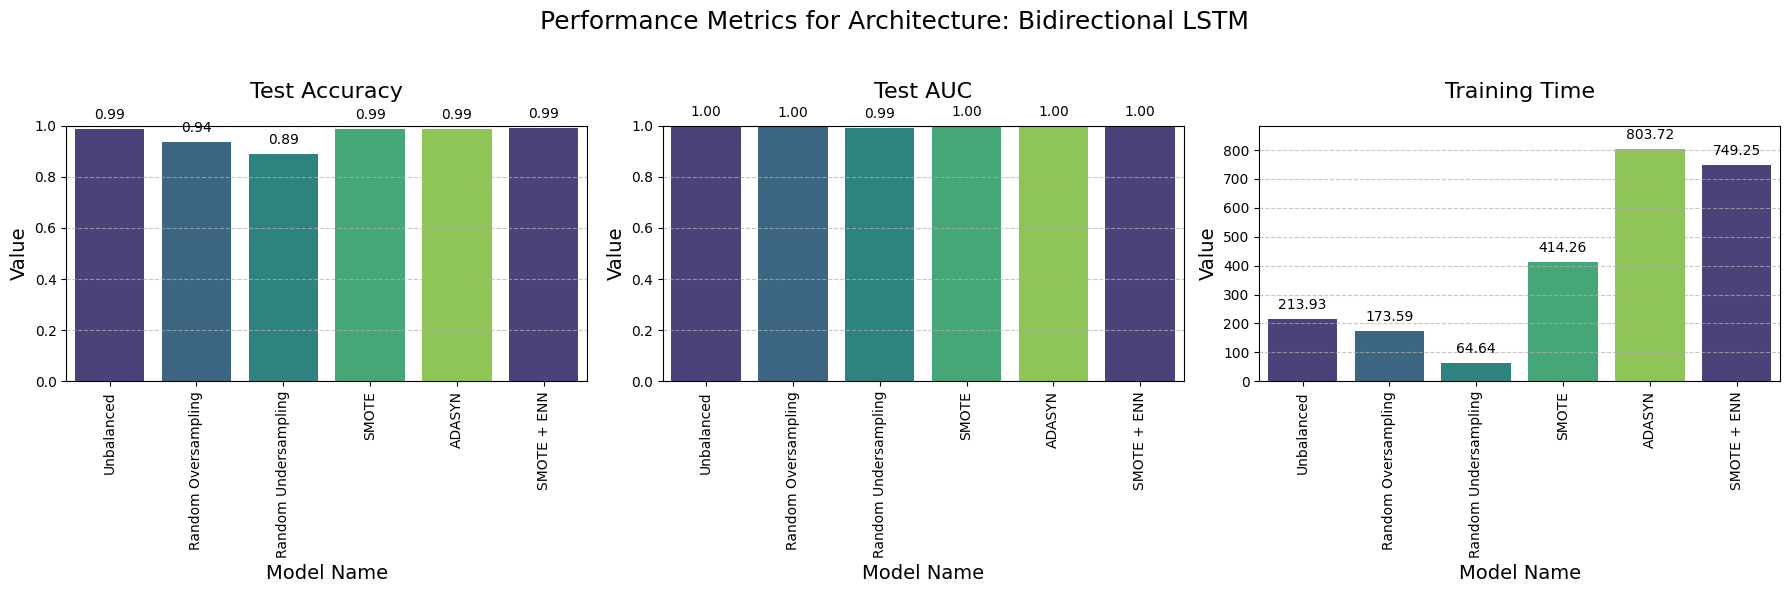

<ipython-input-33-848f6475122c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-33-848f6475122c>:33: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-33-848f6475122c>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_metric['Model Name'], rotation=90, ha='center')
<ipython-input-33-848f6475122c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

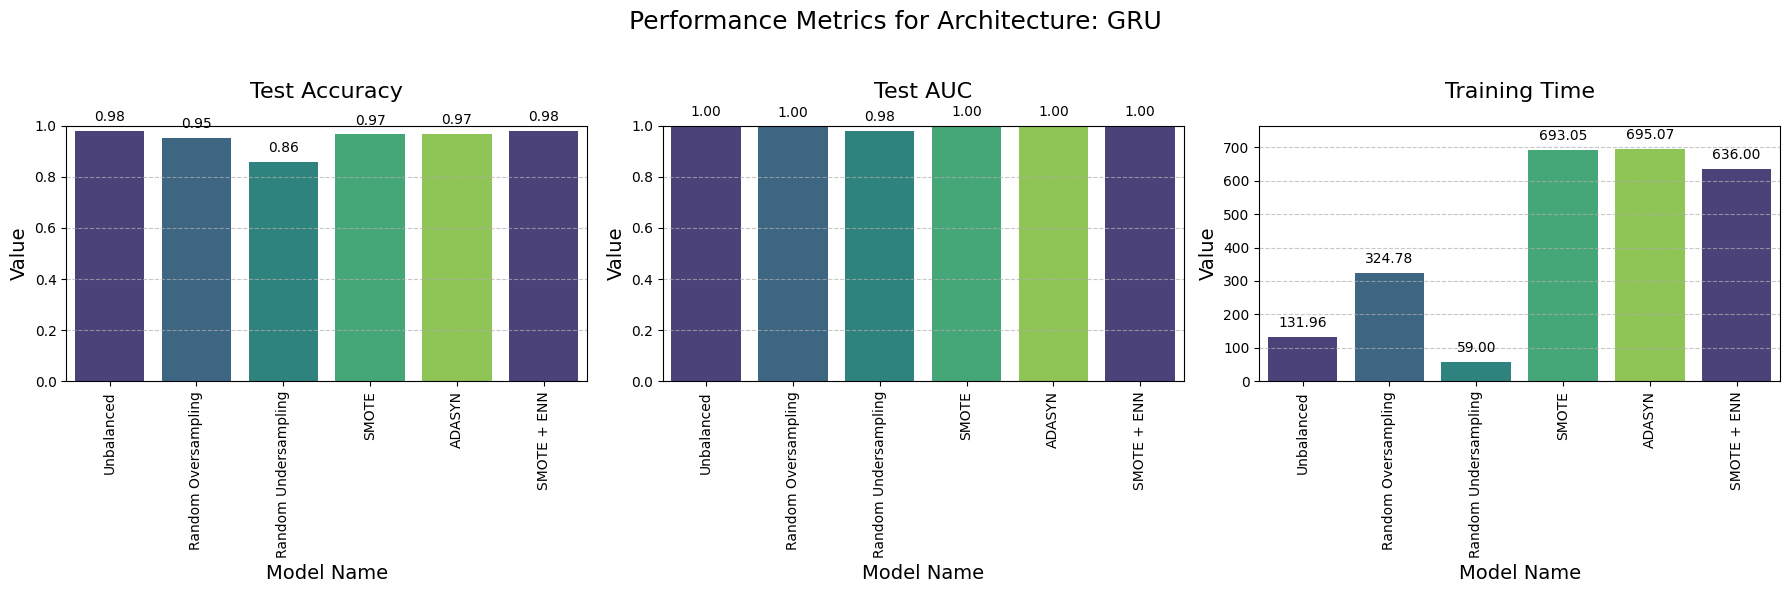

<ipython-input-33-848f6475122c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-33-848f6475122c>:33: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-33-848f6475122c>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_metric['Model Name'], rotation=90, ha='center')
<ipython-input-33-848f6475122c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

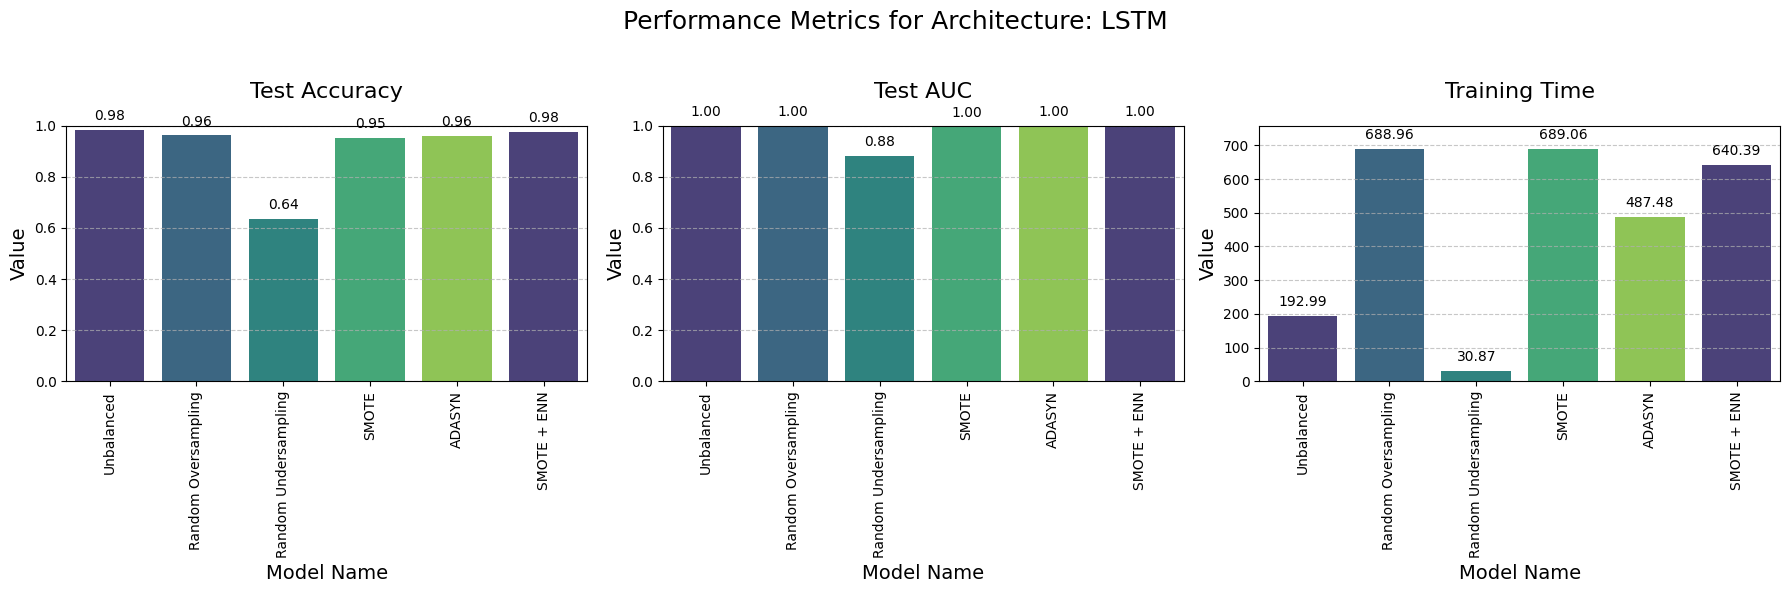

<ipython-input-33-848f6475122c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-33-848f6475122c>:33: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-33-848f6475122c>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_metric['Model Name'], rotation=90, ha='center')
<ipython-input-33-848f6475122c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

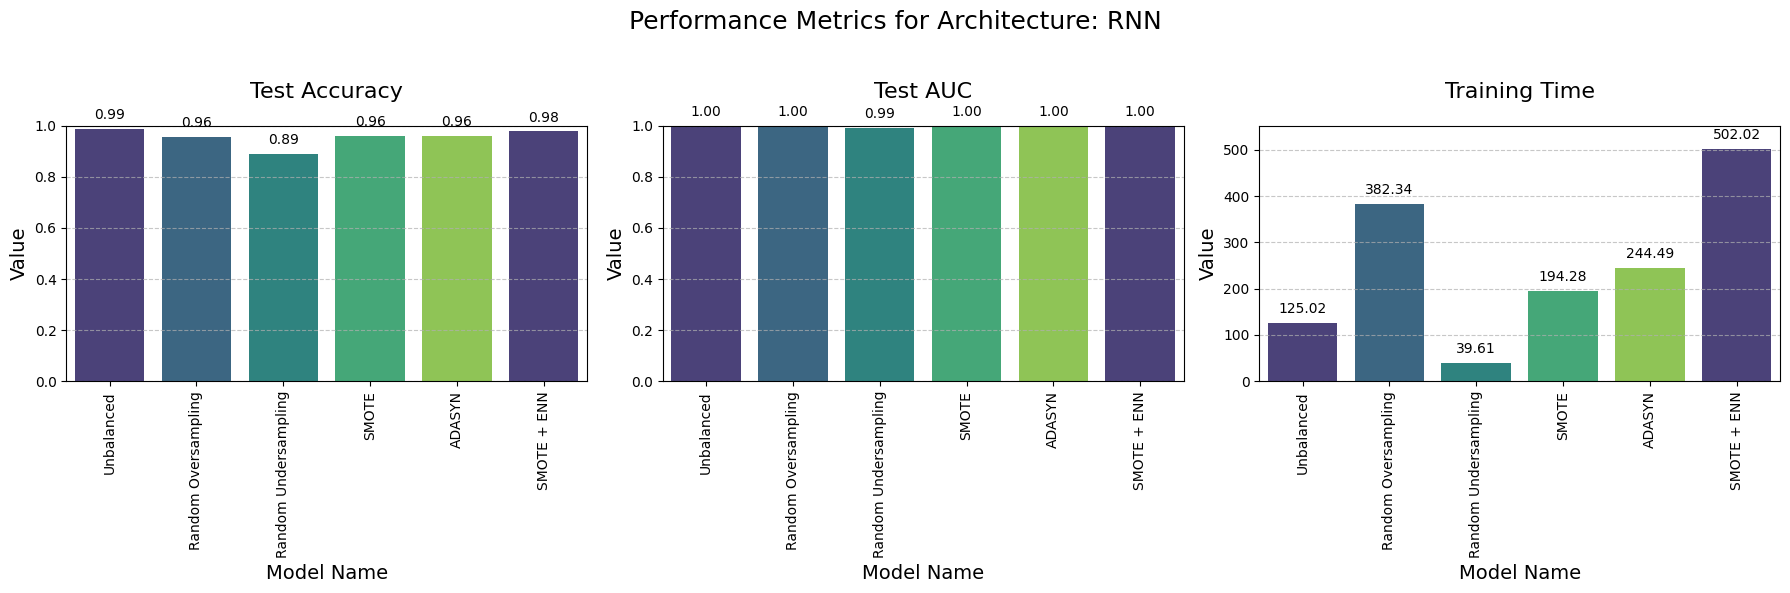

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame for demonstration (replace this with your actual DataFrame)

df = results_data.copy()

# Reshape the data for plotting
df_melted = df.melt(id_vars=['Model Name', 'Architecture'],
                     value_vars=['Test Accuracy', 'Test AUC', 'Training Time'],
                     var_name='Metric', value_name='Value')

# Get unique architectures
architectures = df['Architecture'].unique()

# Define a modern color palette
color_palette = sns.color_palette("viridis", n_colors=len(architectures))

# Create a bar plot for each architecture
for architecture in architectures:
    # Create a figure with subplots for each metric
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=False)

    # Define the metrics to plot
    metrics = ['Test Accuracy', 'Test AUC', 'Training Time']

    for ax, metric in zip(axes, metrics):
        # Filter data for the current architecture and metric
        df_metric = df_melted[(df_melted['Architecture'] == architecture) & (df_melted['Metric'] == metric)]

        # Create the bar plot with a custom color palette
        sns.barplot(x='Model Name', y='Value', data=df_metric, ax=ax, palette=color_palette)

        # Add value annotations on the bars in black
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom',
                        fontsize=10, color='black',  # Set color to black
                        xytext=(0, 5),
                        textcoords='offset points')

        # Set the title and labels with padding
        ax.set_title(f'{metric}', fontsize=16, pad=20)
        ax.set_ylabel('Value', fontsize=14)
        ax.set_xlabel('Model Name', fontsize=14)
        ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

        # Set y-axis limits based on the metric
        if metric in ['Test Accuracy', 'Test AUC']:
            ax.set_ylim(0, 1)  # Set limits for accuracy and AUC (0 to 1)
        elif metric == 'Training Time':
            ax.set_ylim(0, df_metric['Value'].max() * 1.1)  # Set limit for training time with a buffer

        # Rotate x-axis labels to vertical
        ax.set_xticklabels(df_metric['Model Name'], rotation=90, ha='center')

    # Set a main title for the figure
    fig.suptitle(f'Performance Metrics for Architecture: {architecture}', fontsize=18)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title

    # Save the plot to a file
    plt.savefig(f'performance_metrics_{architecture}.png', dpi=300)  # Save as PNG file with architecture name

    # Show the plot
    plt.show()

<ipython-input-21-df7693c7fa67>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Architecture', y='Value', data=df_metric, ax=axes[i, j], palette=custom_colors)
<ipython-input-21-df7693c7fa67>:30: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Architecture', y='Value', data=df_metric, ax=axes[i, j], palette=custom_colors)
<ipython-input-21-df7693c7fa67>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(df_metric['Architecture'], rotation=90, ha='center')
<ipython-input-21-df7693c7fa67>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same e

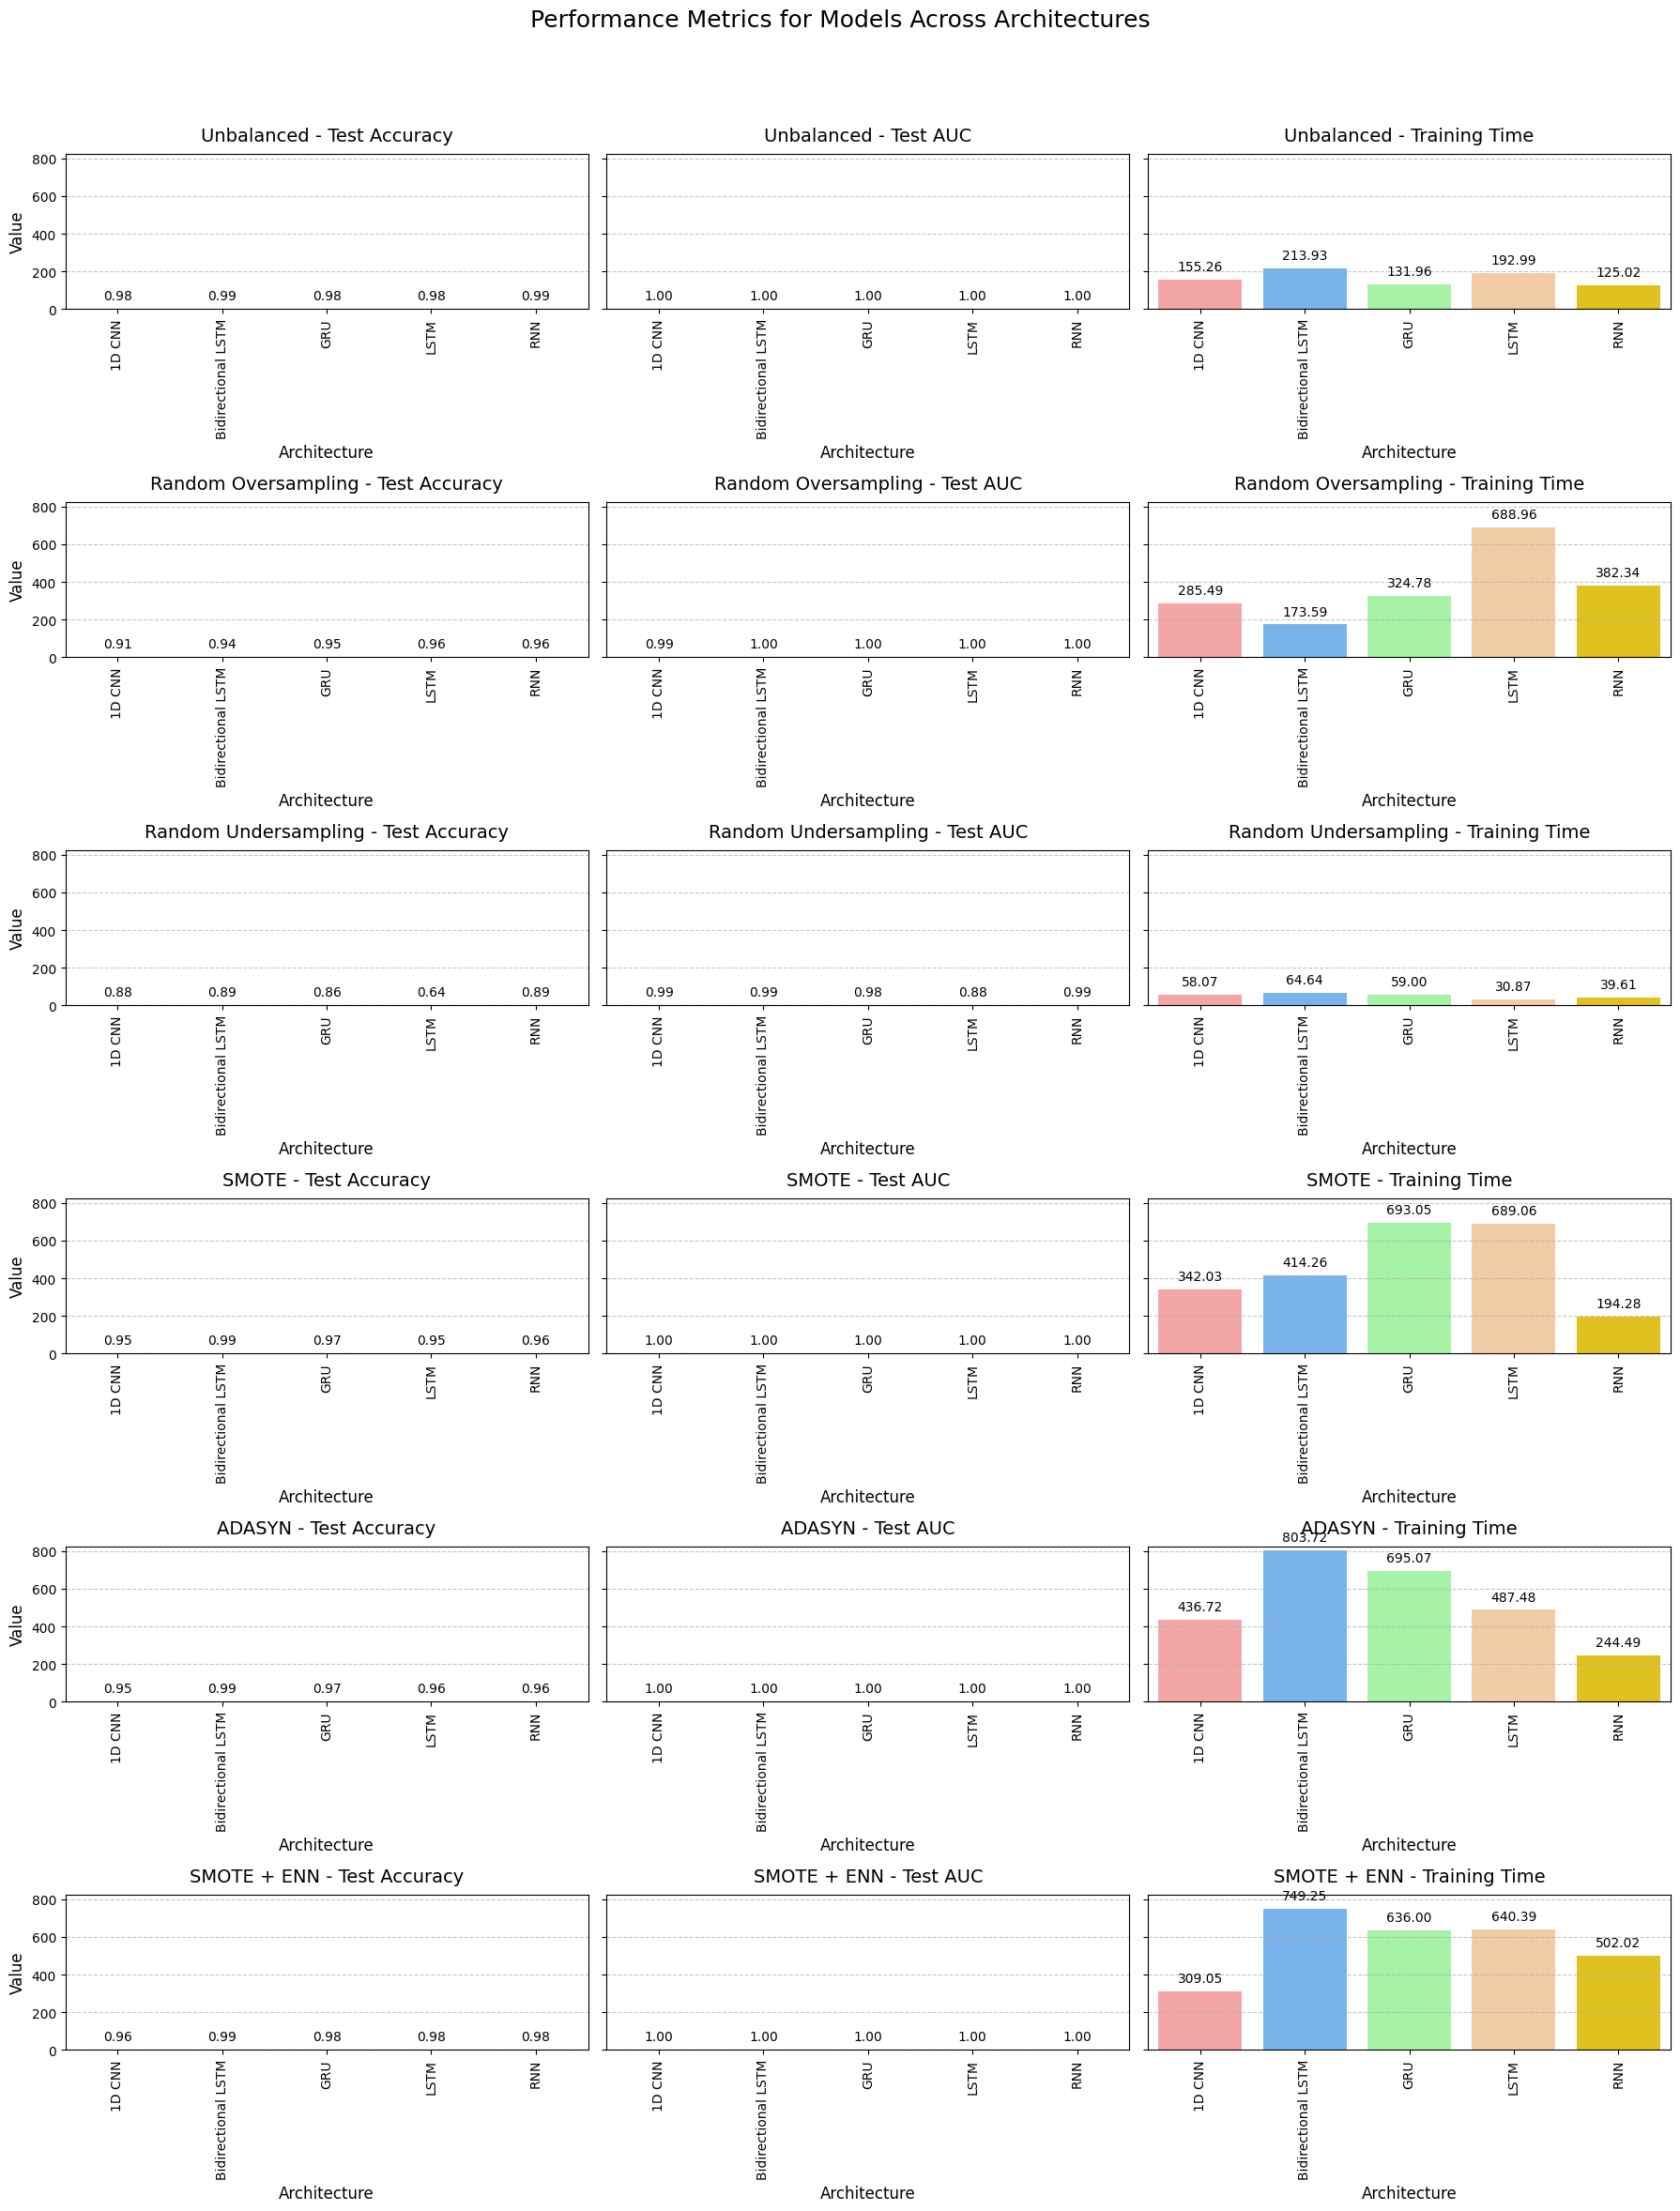

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the relevant data
# Reshape the data for plotting
df_melted = df.melt(id_vars=['Model Name', 'Architecture'],
                     value_vars=['Test Accuracy', 'Test AUC', 'Training Time'],
                     var_name='Metric', value_name='Value')

# Get unique models and metrics
models = df['Model Name'].unique()
metrics = ['Test Accuracy', 'Test AUC', 'Training Time']

# Define a custom color palette
custom_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF69B4']  # Add more colors as needed

# Create a figure with subplots for each model and metric
n_models = len(models)
n_metrics = len(metrics)

fig, axes = plt.subplots(nrows=n_models, ncols=n_metrics, figsize=(18, 4 * n_models), sharey=True)

# Loop through each model and metric to create subplots
for i, model in enumerate(models):
    for j, metric in enumerate(metrics):
        # Filter data for the current model and metric
        df_metric = df_melted[(df_melted['Model Name'] == model) & (df_melted['Metric'] == metric)]

        # Create the bar plot with the custom color palette
        sns.barplot(x='Architecture', y='Value', data=df_metric, ax=axes[i, j], palette=custom_colors)

        # Add value annotations on the bars
        for p in axes[i, j].patches:
            axes[i, j].annotate(f'{p.get_height():.2f}',
                                (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='bottom',
                                fontsize=10, color='black',
                                xytext=(0, 5),
                                textcoords='offset points')

        # Set the title and labels with padding
        axes[i, j].set_title(f'{model} - {metric}', fontsize=14, pad=10)  # Increase padding to 10 points
        axes[i, j].set_ylabel('Value', fontsize=12)
        axes[i, j].set_xlabel('Architecture', fontsize=12)
        axes[i, j].grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

        # Set y-axis limits based on the metric
        if metric == 'Test Accuracy' or metric == 'Test AUC':
            axes[i, j].set_ylim(0, 1)  # Set limits for accuracy and AUC (0 to 1)
        elif metric == 'Training Time':
            axes[i, j].set_ylim(0, df_metric['Value'].max() * 1.1)  # Set limit for training time with a buffer

        # Rotate x-axis labels to vertical
        axes[i, j].set_xticklabels(df_metric['Architecture'], rotation=90, ha='center')

# Set a main title for the figure
fig.suptitle('Performance Metrics for Models Across Architectures', fontsize=18)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title

# Save the plot to a file
plt.savefig('performance_metrics_combined.png', dpi=300)  # Save as PNG file

# Show the plot
plt.show()

<ipython-input-40-a54163b0718c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce 

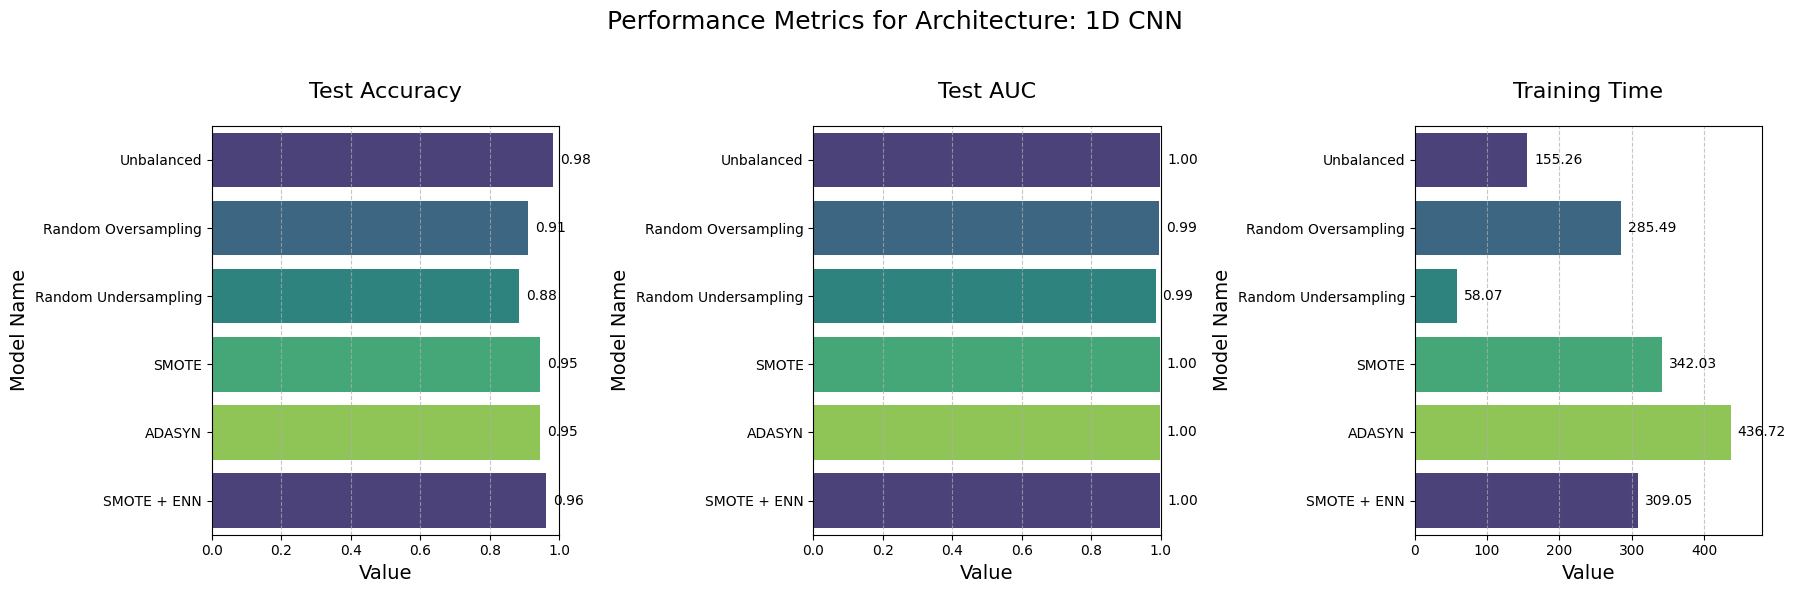

<ipython-input-40-a54163b0718c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce 

<ipython-input-40-a54163b0718c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce 

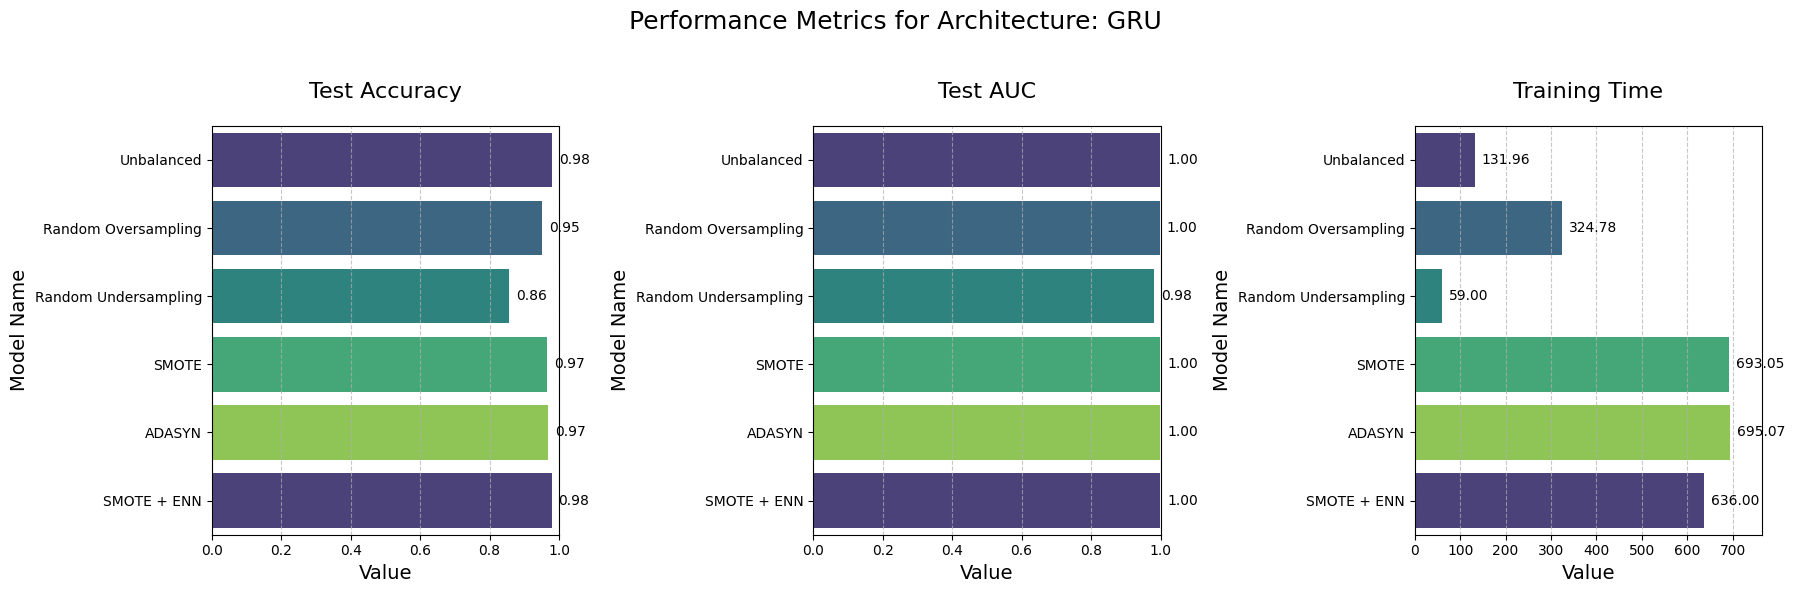

<ipython-input-40-a54163b0718c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce 

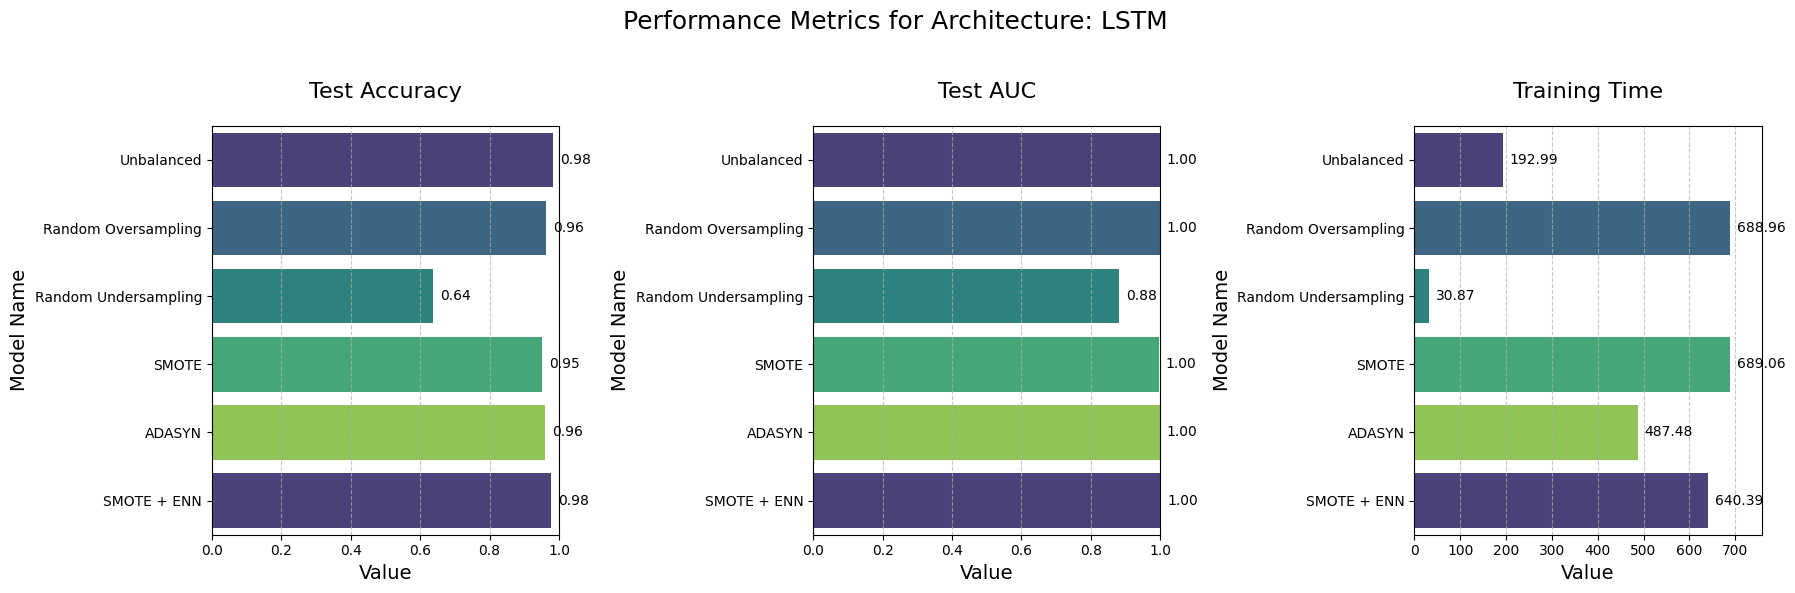

<ipython-input-40-a54163b0718c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-40-a54163b0718c>:32: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame for demonstration (replace this with your actual DataFrame)
df = results_data.copy()

# Reshape the data for plotting
df_melted = df.melt(id_vars=['Model Name', 'Architecture'],
                     value_vars=['Test Accuracy', 'Test AUC', 'Training Time'],
                     var_name='Metric', value_name='Value')

# Get unique architectures
architectures = df['Architecture'].unique()

# Define a modern color palette
color_palette = sns.color_palette("viridis", n_colors=len(architectures))

# Create a bar plot for each architecture
for architecture in architectures:
    # Create a figure with subplots for each metric
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=False)

    # Define the metrics to plot
    metrics = ['Test Accuracy', 'Test AUC', 'Training Time']

    for ax, metric in zip(axes, metrics):
        # Filter data for the current architecture and metric
        df_metric = df_melted[(df_melted['Architecture'] == architecture) & (df_melted['Metric'] == metric)]

        # Create the horizontal bar plot with a custom color palette
        sns.barplot(x='Value', y='Model Name', data=df_metric, ax=ax, palette=color_palette)

        # Add value annotations on the bars in black
        for p in ax.patches:
            width = p.get_width()
            ax.annotate(f'{width:.2f}',
                        (width, p.get_y() + p.get_height() / 2.),
                        ha='left', va='center',
                        fontsize=10, color='black',  # Set color to black
                        xytext=(5, 0),
                        textcoords='offset points')

        # Set the title and labels with padding
        ax.set_title(f'{metric}', fontsize=16, pad=20)
        ax.set_xlabel('Value', fontsize=14)
        ax.set_ylabel('Model Name', fontsize=14)
        ax.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability

        # Set x-axis limits based on the metric
        if metric in ['Test Accuracy', 'Test AUC']:
            ax.set_xlim(0, 1)  # Set limits for accuracy and AUC (0 to 1)
        elif metric == 'Training Time':
            ax.set_xlim(0, df_metric['Value'].max() * 1.1)  # Set limit for training time with a buffer

    # Set a main title for the figure
    fig.suptitle(f'Performance Metrics for Architecture: {architecture}', fontsize=18)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title

    # Save the plot to a file
    plt.savefig(f'performance_metrics_{architecture}.png', dpi=300)  # Save as PNG file with architecture name

    # Show the plot
    plt.show()

<ipython-input-41-f83737cbf3af>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Value', y='Archite

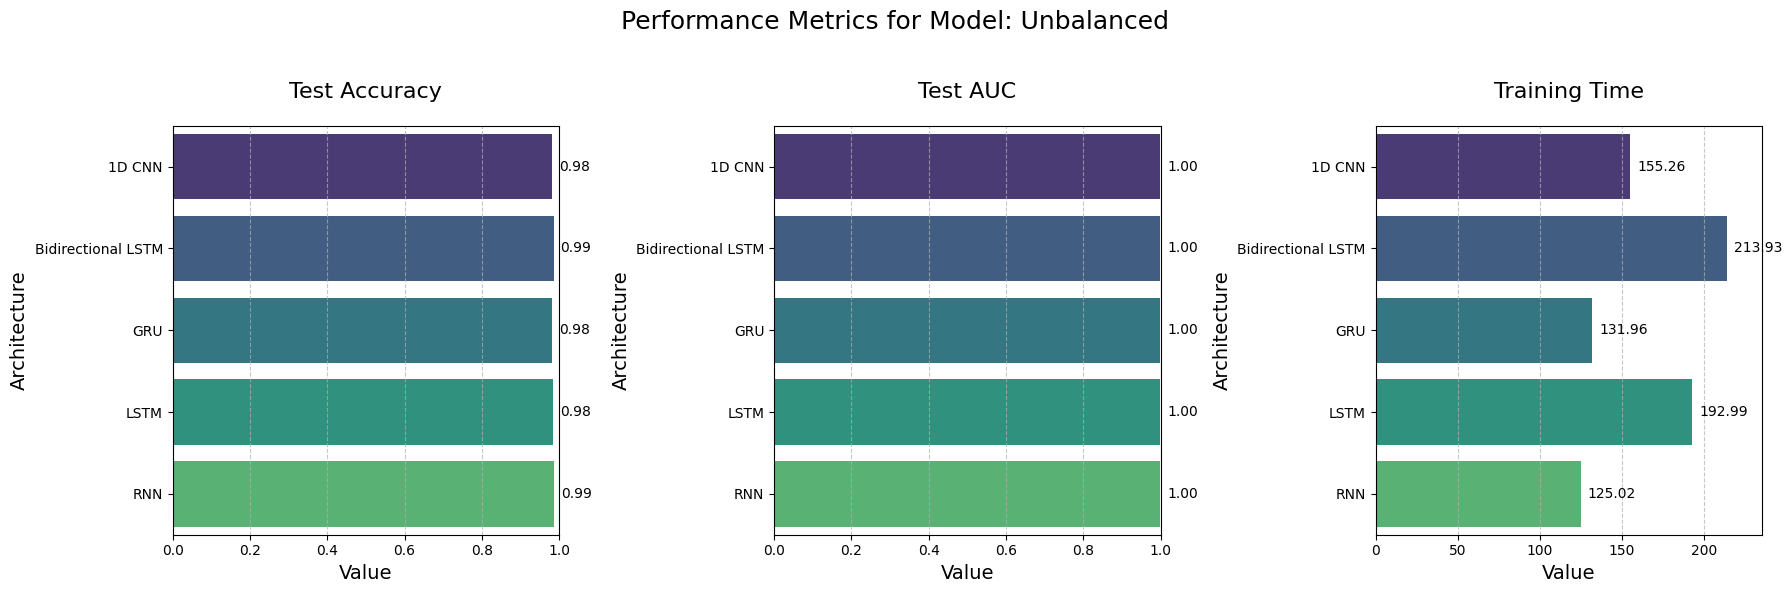

<ipython-input-41-f83737cbf3af>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Value', y='Archite

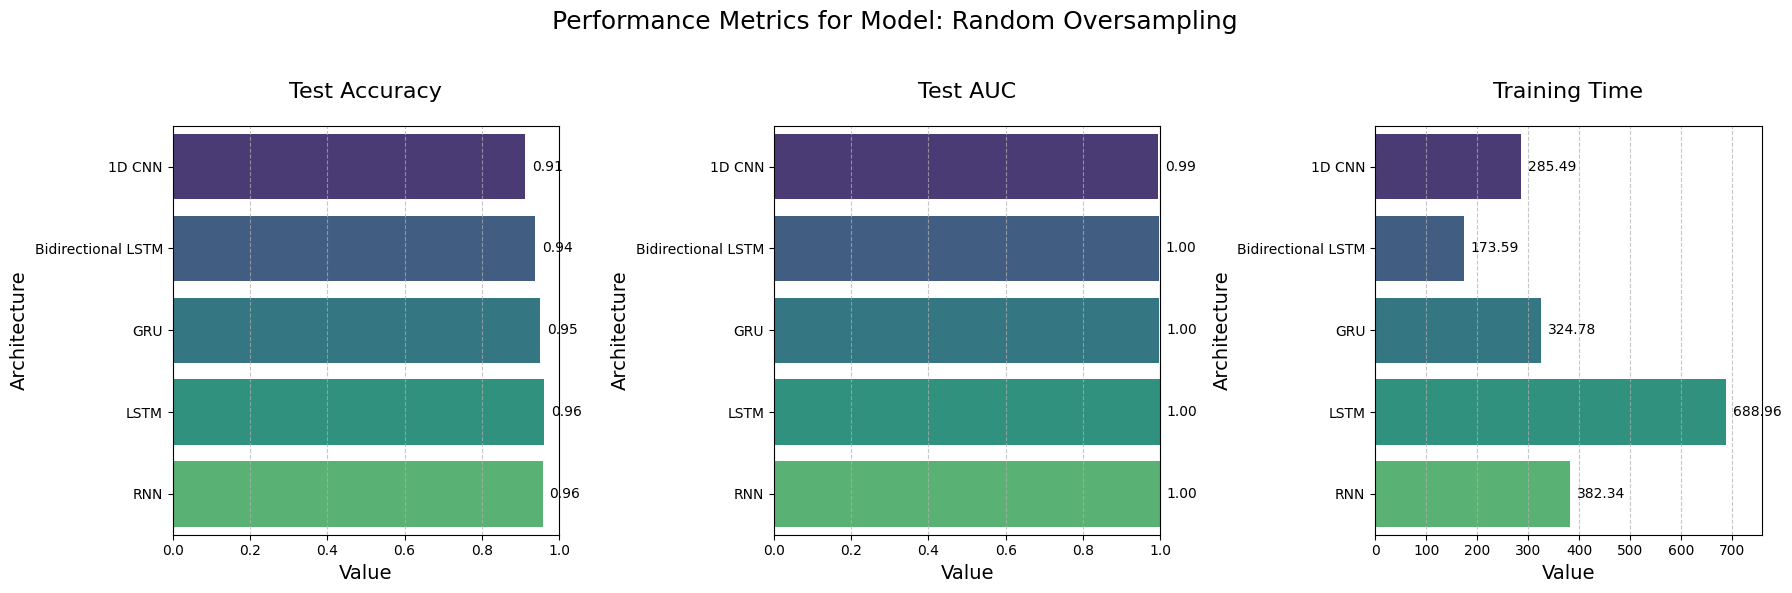

<ipython-input-41-f83737cbf3af>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Value', y='Archite

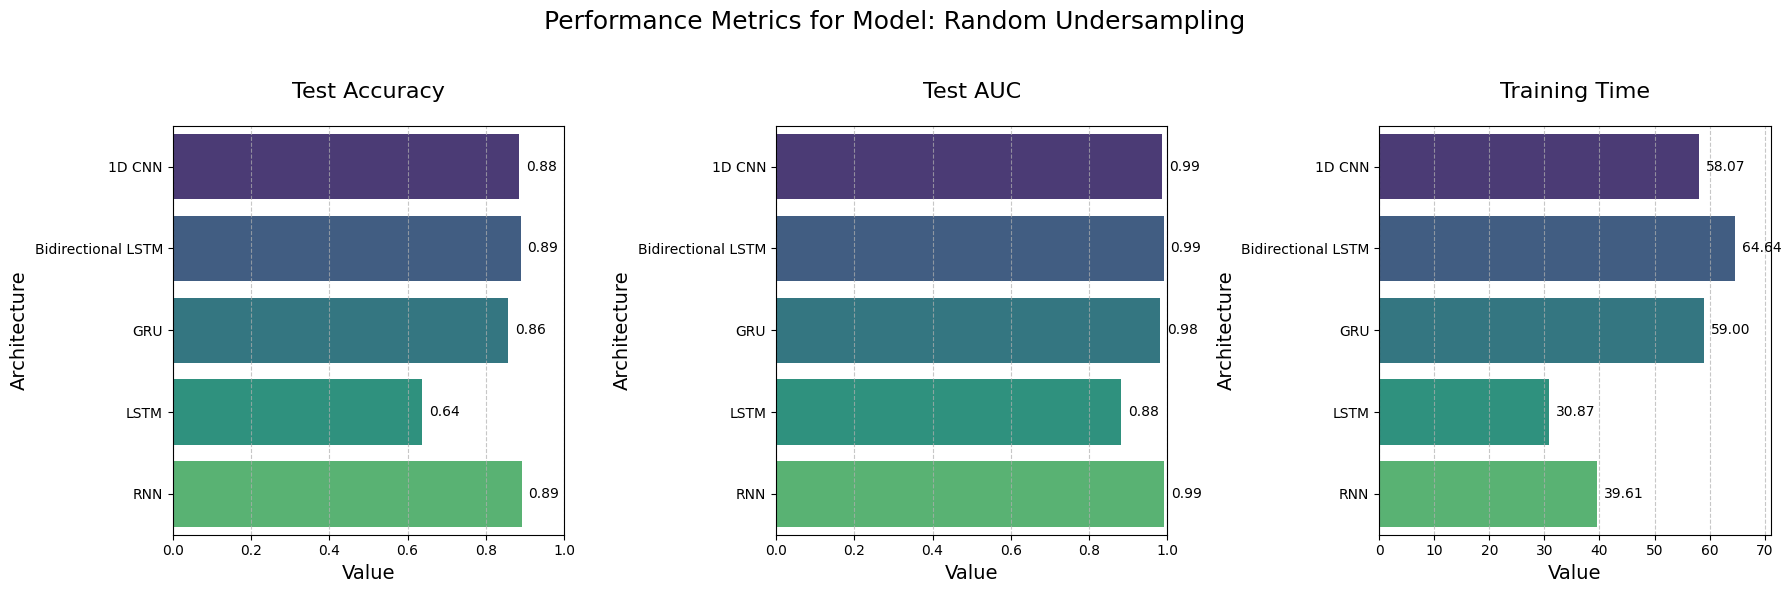

<ipython-input-41-f83737cbf3af>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Value', y='Archite

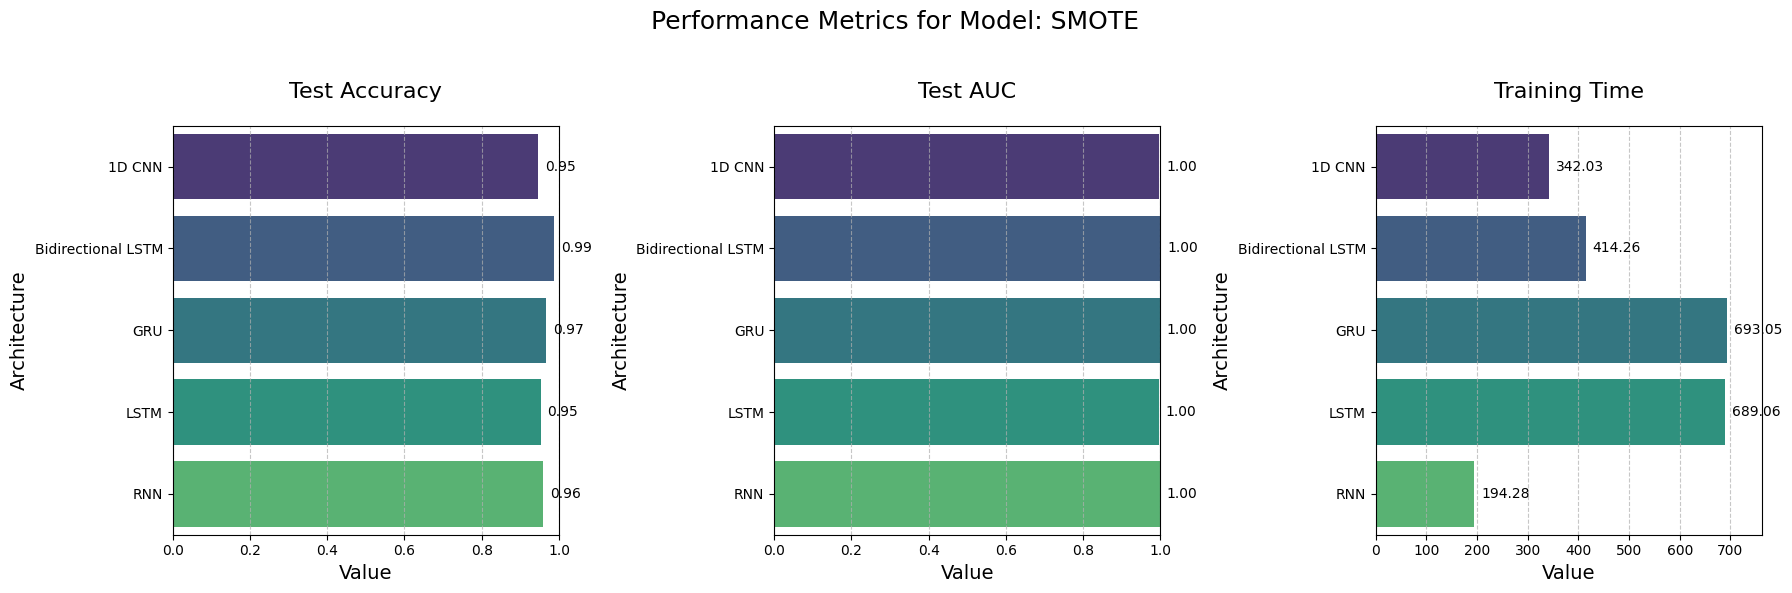

<ipython-input-41-f83737cbf3af>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Value', y='Archite

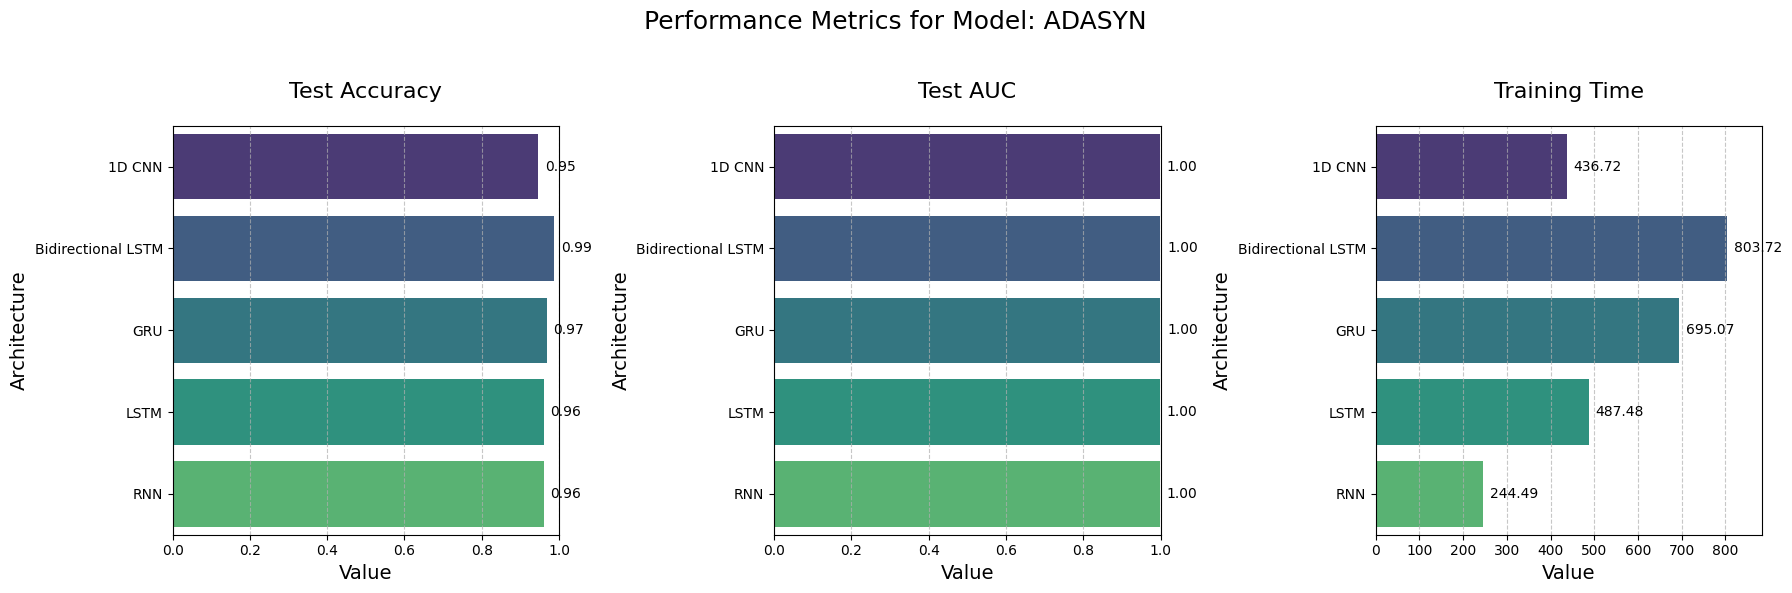

<ipython-input-41-f83737cbf3af>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)
<ipython-input-41-f83737cbf3af>:32: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Value', y='Archite

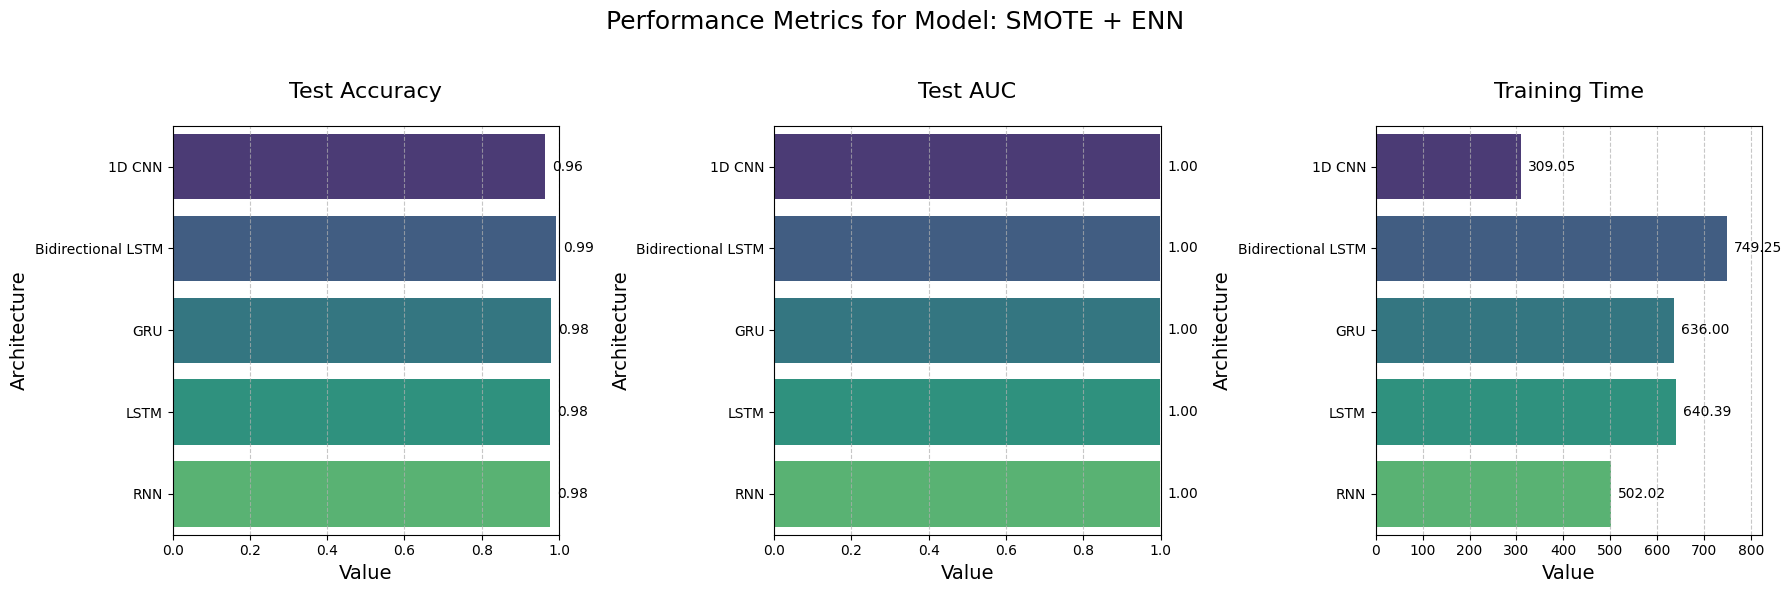

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame for demonstration (replace this with your actual DataFrame)
df = results_data.copy()

# Reshape the data for plotting
df_melted = df.melt(id_vars=['Model Name', 'Architecture'],
                     value_vars=['Test Accuracy', 'Test AUC', 'Training Time'],
                     var_name='Metric', value_name='Value')

# Get unique model names
model_names = df['Model Name'].unique()

# Define a modern color palette
color_palette = sns.color_palette("viridis", n_colors=len(model_names))

# Create a bar plot for each model
for model_name in model_names:
    # Create a figure with subplots for each metric
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=False)

    # Define the metrics to plot
    metrics = ['Test Accuracy', 'Test AUC', 'Training Time']

    for ax, metric in zip(axes, metrics):
        # Filter data for the current model and metric
        df_metric = df_melted[(df_melted['Model Name'] == model_name) & (df_melted['Metric'] == metric)]

        # Create the horizontal bar plot with a custom color palette
        sns.barplot(x='Value', y='Architecture', data=df_metric, ax=ax, palette=color_palette)

        # Add value annotations on the bars in black
        for p in ax.patches:
            width = p.get_width()
            ax.annotate(f'{width:.2f}',
                        (width, p.get_y() + p.get_height() / 2.),
                        ha='left', va='center',
                        fontsize=10, color='black',  # Set color to black
                        xytext=(5, 0),
                        textcoords='offset points')

        # Set the title and labels with padding
        ax.set_title(f'{metric}', fontsize=16, pad=20)
        ax.set_xlabel('Value', fontsize=14)
        ax.set_ylabel('Architecture', fontsize=14)
        ax.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability

        # Set x-axis limits based on the metric
        if metric in ['Test Accuracy', 'Test AUC']:
            ax.set_xlim(0, 1)  # Set limits for accuracy and AUC (0 to 1)
        elif metric == 'Training Time':
            ax.set_xlim(0, df_metric['Value'].max() * 1.1)  # Set limit for training time with a buffer

    # Set a main title for the figure
    fig.suptitle(f'Performance Metrics for Model: {model_name}', fontsize=18)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title

    # Save the plot to a file
    plt.savefig(f'performance_metrics_{model_name}.png', dpi=300)  # Save as PNG file with model name

    # Show the plot
    plt.show()

> ## Additional steps - Load & Preprocess the dataset

In [ ]:
# import the libraries

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
#from cuml.model_selection import train_test_split
#from cuml.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay


data_path = "/content/WSN-DS.csv"

In [ ]:
data_raw = pd.read_csv(data_path)


df = data_raw.copy()
df.head()

id   Time   Is_CH   who CH   Dist_To_CH   ADV_S   ADV_R   JOIN_S  \
0  101000     50       1   101000      0.00000       1       0        0   
1  101001     50       0   101044     75.32345       0       4        1   
2  101002     50       0   101010     46.95453       0       4        1   
3  101003     50       0   101044     64.85231       0       4        1   
4  101004     50       0   101010      4.83341       0       4        1   

    JOIN_R   SCH_S   SCH_R  Rank   DATA_S   DATA_R   Data_Sent_To_BS  \
0       25       1       0     0        0     1200                48   
1        0       0       1     2       38        0                 0   
2        0       0       1    19       41        0                 0   
3        0       0       1    16       38        0                 0   
4        0       0       1    25       41        0                 0   

    dist_CH_To_BS   send_code   Expaned Energy Attack type  
0       130.08535            0         2.46940      Normal  
1         0.00000            4         0.06957      Normal  
2         0.00000            3         0.06898      Normal  
3         0.00000            4         0.06673      Normal  
4         0.00000            3         0.06534      Normal

In [ ]:
df

id   Time   Is_CH   who CH   Dist_To_CH   ADV_S   ADV_R   JOIN_S  \
0       101000     50       1   101000      0.00000     1.0     0.0      0.0   
1       101001     50       0   101044     75.32345     0.0     4.0      1.0   
2       101002     50       0   101010     46.95453     0.0     4.0      1.0   
3       101003     50       0   101044     64.85231     0.0     4.0      1.0   
4       101004     50       0   101010      4.83341     0.0     4.0      1.0   
...        ...    ...     ...      ...          ...     ...     ...      ...   
280655  201092   1003       0   201005     65.20922     0.0     1.0      1.0   
280656  201093   1003       0   201005     49.39159     0.0     1.0      1.0   
280657  201094   1003       0   201005     89.19138     0.0     1.0      1.0   
280658  201095   1003       0   201005     41.44484     0.0     1.0      1.0   
280659  201096   1003       0   201005     85.08600     NaN     NaN      NaN   

         JOIN_R   SCH_S   SCH_R  Rank   DATA_S   DATA_R   Data_Sent_To_BS  \
0          25.0     1.0     0.0   0.0      0.0   1200.0              48.0   
1           0.0     0.0     1.0   2.0     38.0      0.0               0.0   
2           0.0     0.0     1.0  19.0     41.0      0.0               0.0   
3           0.0     0.0     1.0  16.0     38.0      0.0               0.0   
4           0.0     0.0     1.0  25.0     41.0      0.0               0.0   
...         ...     ...     ...   ...      ...      ...               ...   
280655      0.0     0.0     1.0   1.0     14.0      0.0               0.0   
280656      0.0     0.0     1.0   1.0     14.0      0.0               0.0   
280657      0.0     0.0     1.0   1.0     14.0      0.0               0.0   
280658      0.0     0.0     1.0   1.0     14.0      0.0               0.0   
280659      NaN     NaN     NaN   NaN      NaN      NaN               NaN   

         dist_CH_To_BS   send_code   Expaned Energy Attack type  
0            130.08535          0.0         2.46940      Normal  
1              0.00000          4.0         0.06957      Normal  
2              0.00000          3.0         0.06898      Normal  
3              0.00000          4.0         0.06673      Normal  
4              0.00000          3.0         0.06534      Normal  
...                ...          ...             ...         ...  
280655         0.00000          1.0         0.03042      Normal  
280656         0.00000          1.0         0.02972      Normal  
280657         0.00000          1.0         0.03256      Normal  
280658         0.00000          1.0         0.02946      Normal  
280659             NaN          NaN             NaN         NaN  

[280660 rows x 19 columns]

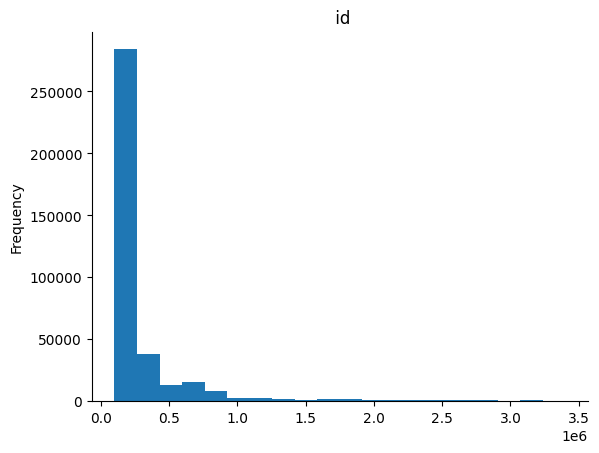

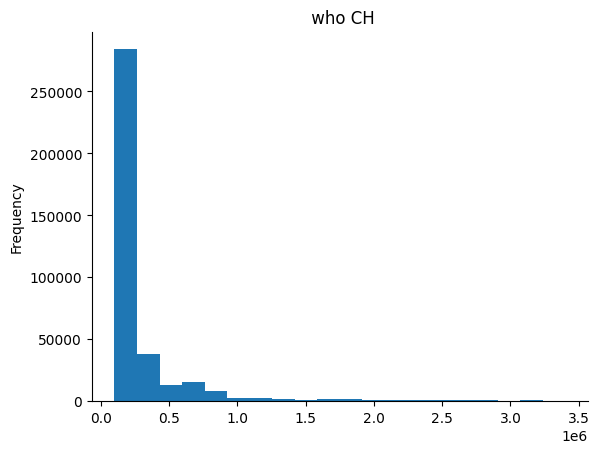

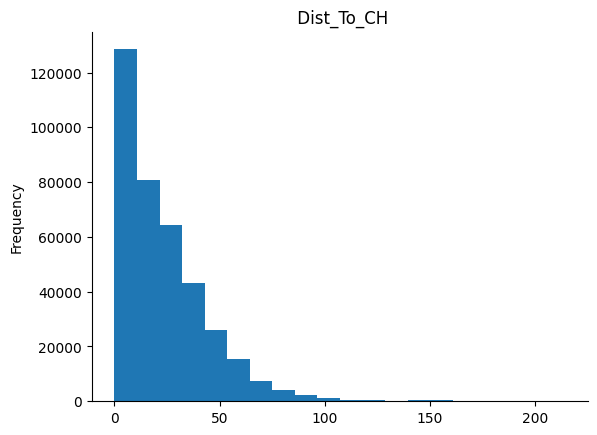

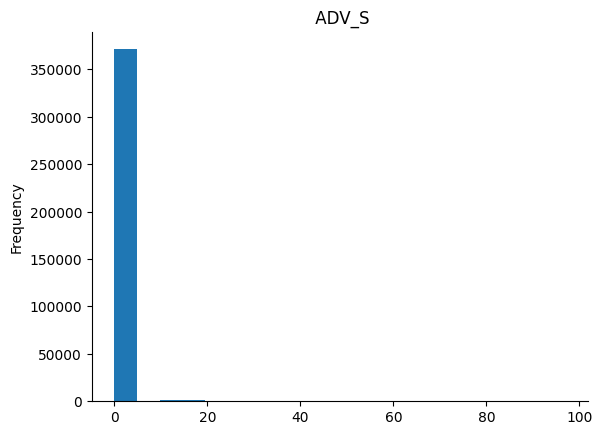

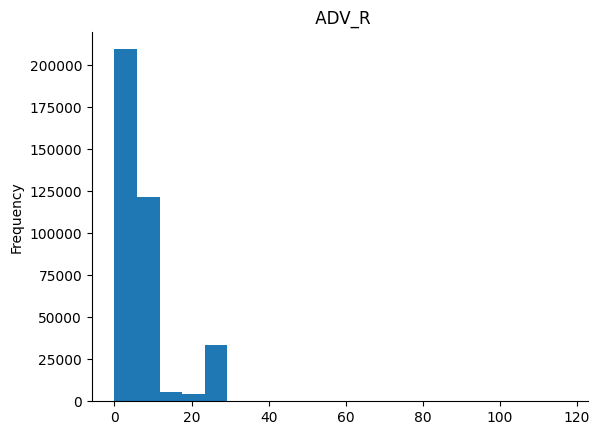

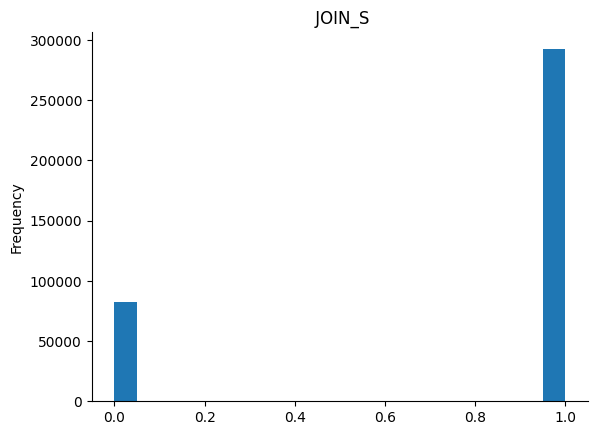

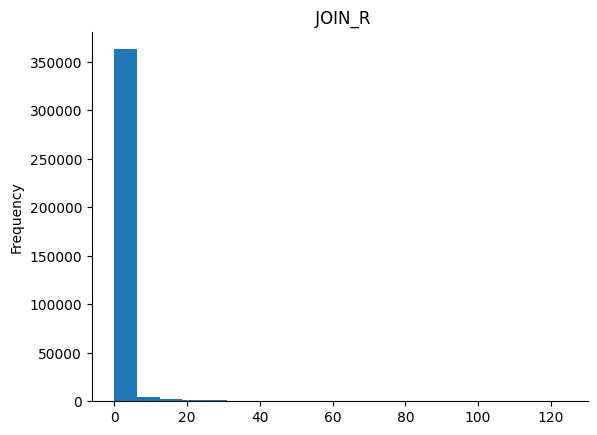

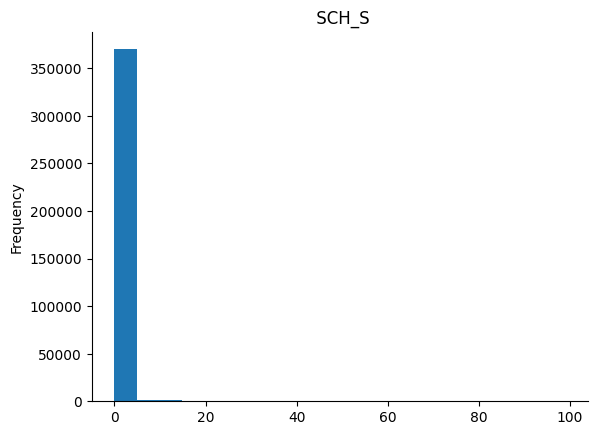

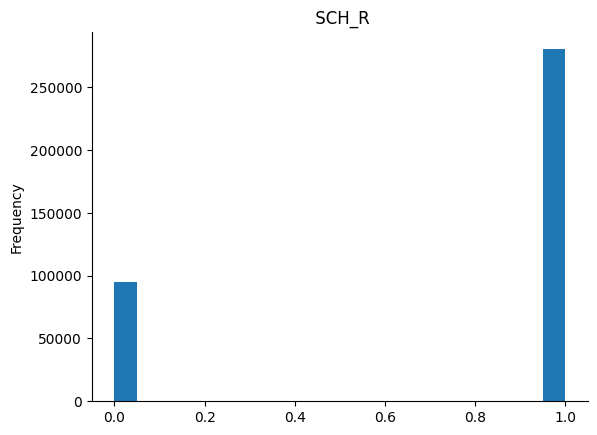

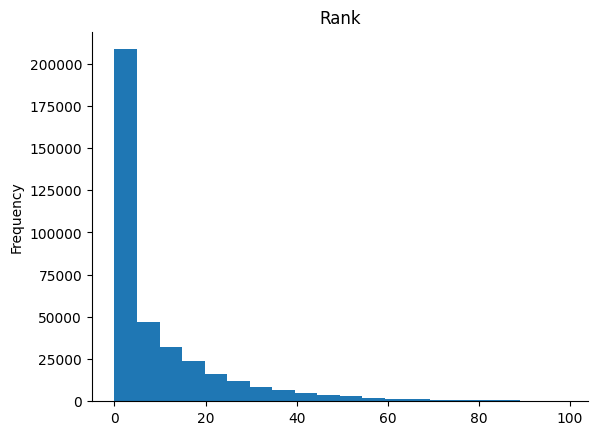

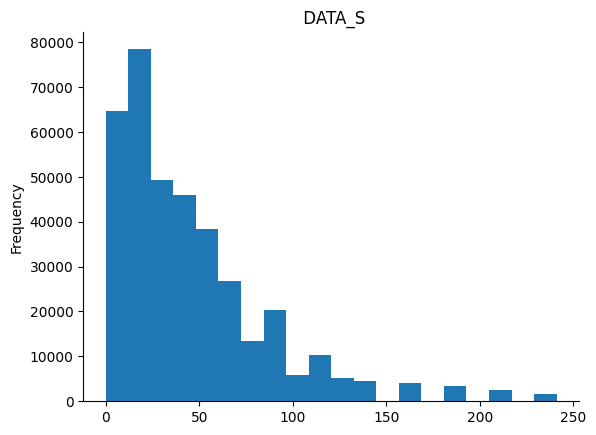

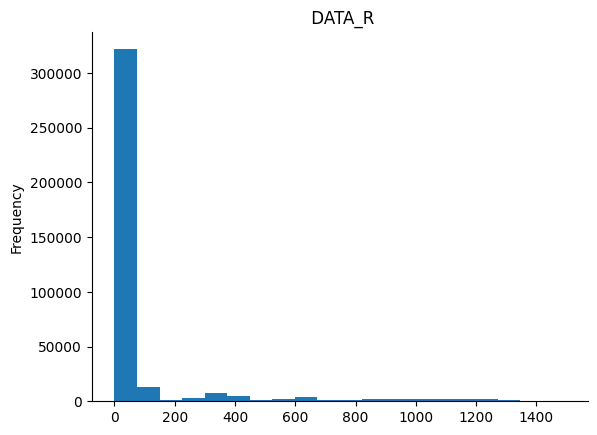

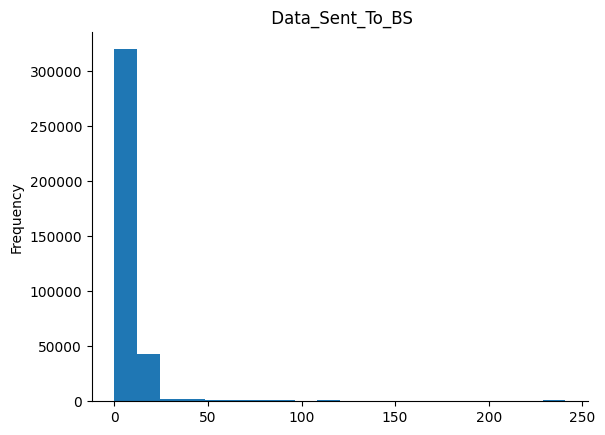

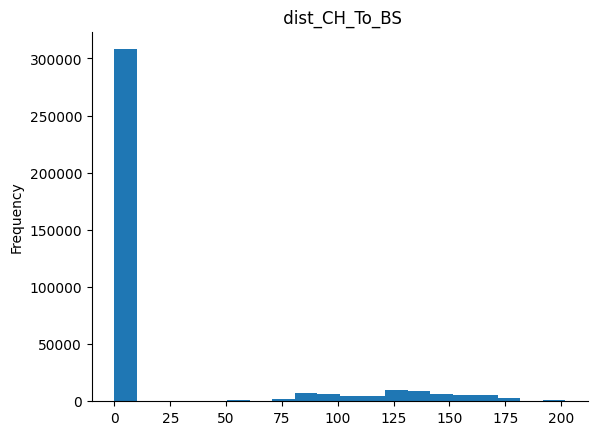

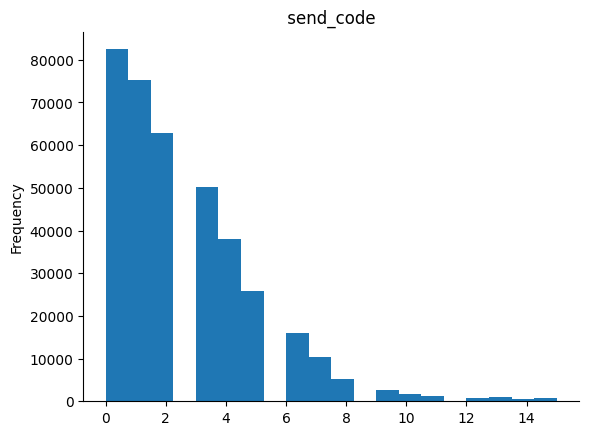

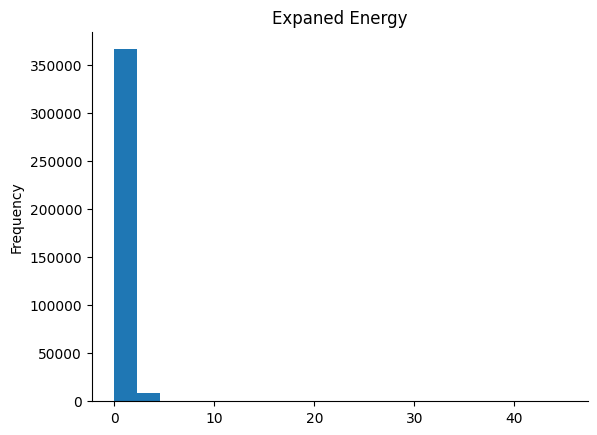

Skipping column 'Attack type' as it is not numeric.


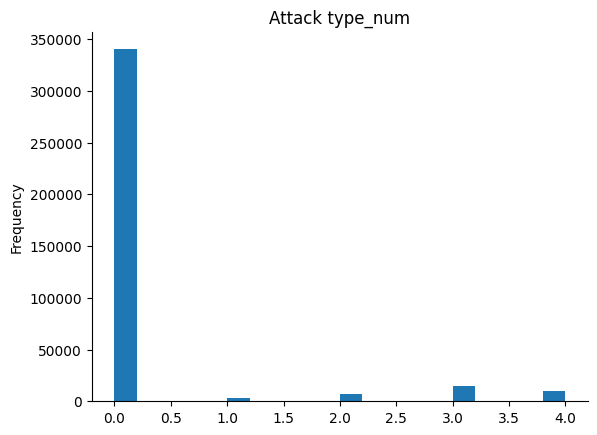

In [ ]:
from matplotlib import pyplot as plt

from matplotlib import pyplot as plt

for col in df.columns:
    # Check if the column contains numeric data before plotting
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].plot(kind='hist', bins=20, title=col)
        plt.gca().spines[['top', 'right',]].set_visible(False)
        plt.show()
    else:
        print(f"Skipping column '{col}' as it is not numeric.")


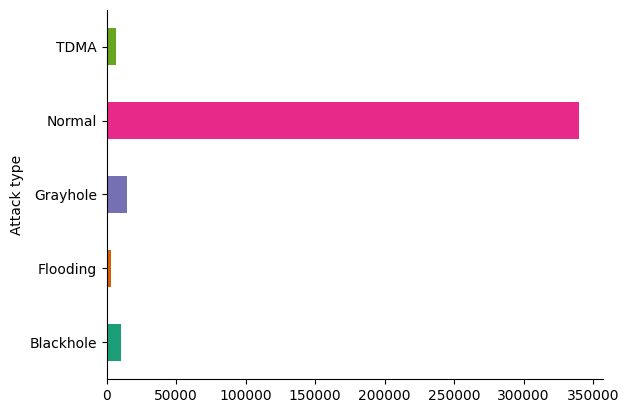

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Attack type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Get unique values from the 'Attack type' column
unique_names = df['Attack type'].unique()

print(unique_names)

['Normal' 'Flooding' 'TDMA' 'Grayhole' 'Blackhole']


In [ ]:
col_names = df.columns
col_names

Index([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned Energy',
       'Attack type'],
      dtype='object')

In [ ]:
# Factorize the 'Name' column
df['Attack type_num'] = pd.factorize(df['Attack type'])[0]

print(df['Attack type_num'])

0         0
1         0
2         0
3         0
4         0
         ..
374656    0
374657    0
374658    0
374659    0
374660    0
Name: Attack type_num, Length: 374661, dtype: int64


In [ ]:
unique_numbers = df['Attack type_num'].unique()
unique_numbers

array([0, 1, 2, 3, 4])

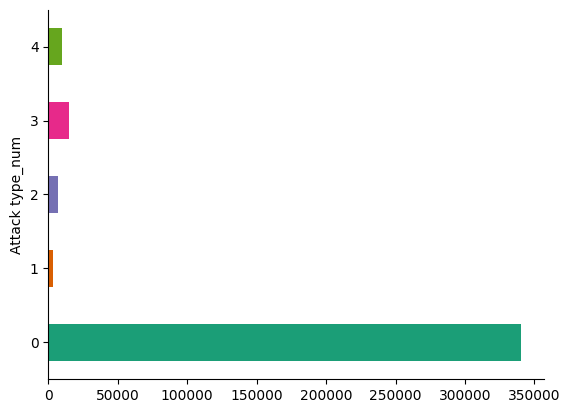

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Attack type_num').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data_raw.shape

(374661, 19)

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [ ]:
 data_raw.describe()


id           Time          Is_CH        who CH  \
count  3.746610e+05  374661.000000  374661.000000  3.746610e+05   
mean   2.749693e+05    1064.748712       0.115766  2.749804e+05   
std    3.898986e+05     899.646164       0.319945  3.899112e+05   
min    1.010000e+05      50.000000       0.000000  1.010000e+05   
25%    1.070930e+05     353.000000       0.000000  1.070960e+05   
50%    1.160710e+05     803.000000       0.000000  1.160720e+05   
75%    2.150720e+05    1503.000000       0.000000  2.150730e+05   
max    3.402096e+06    3600.000000       1.000000  3.402100e+06   

          Dist_To_CH          ADV_S          ADV_R         JOIN_S  \
count  374661.000000  374661.000000  374661.000000  374661.000000   
mean       22.599380       0.267698       6.940562       0.779905   
std        21.955794       2.061148       7.044319       0.414311   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.735440       0.000000       3.000000       1.000000   
50%        18.372610       0.000000       5.000000       1.000000   
75%        33.776000       0.000000       7.000000       1.000000   
max       214.274620      97.000000     117.000000       1.000000   

              JOIN_R          SCH_S          SCH_R           Rank  \
count  374661.000000  374661.000000  374661.000000  374661.000000   
mean        0.737493       0.288984       0.747452       9.687104   
std         4.691498       2.754746       0.434475      14.681901   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       1.000000       3.000000   
75%         0.000000       0.000000       1.000000      13.000000   
max       124.000000      99.000000       1.000000      99.000000   

              DATA_S         DATA_R   Data_Sent_To_BS   dist_CH_To_BS  \
count  374661.000000  374661.000000     374661.000000   374661.000000   
mean       44.857925      73.890045          4.569448       22.562735   
std        42.574464     230.246335         19.679155       50.261604   
min         0.000000       0.000000          0.000000        0.000000   
25%        13.000000       0.000000          0.000000        0.000000   
50%        35.000000       0.000000          0.000000        0.000000   
75%        62.000000       0.000000          0.000000        0.000000   
max       241.000000    1496.000000        241.000000      201.934940   

          send_code   Expaned Energy  
count  374661.000000   374661.000000  
mean        2.497957        0.305661  
std         2.407337        0.669462  
min         0.000000        0.000000  
25%         1.000000        0.056150  
50%         2.000000        0.097970  
75%         4.000000        0.217760  
max        15.000000       45.093940

from matplotlib import pyplot as plt
_df_16[' id'].plot(kind='hist', bins=20, title=' id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17[' Time'].plot(kind='hist', bins=20, title=' Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18[' Is_CH'].plot(kind='hist', bins=20, title=' Is_CH')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19[' who CH'].plot(kind='hist', bins=20, title=' who CH')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x=' id', y=' Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x=' Time', y=' Is_CH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x=' Is_CH', y=' who CH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x=' who CH', y=' Dist_To_CH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Time']
  ys = series[' id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values(' Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Time')
_ = plt.ylabel(' id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Time']
  ys = series[' Is_CH']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values(' Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Time')
_ = plt.ylabel(' Is_CH')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Time']
  ys = series[' who CH']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values(' Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Time')
_ = plt.ylabel(' who CH')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Time']
  ys = series[' Dist_To_CH']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values(' Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Time')
_ = plt.ylabel(' Dist_To_CH')

from matplotlib import pyplot as plt
_df_28[' id'].plot(kind='line', figsize=(8, 4), title=' id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29[' Time'].plot(kind='line', figsize=(8, 4), title=' Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30[' Is_CH'].plot(kind='line', figsize=(8, 4), title=' Is_CH')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31[' who CH'].plot(kind='line', figsize=(8, 4), title=' who CH')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
print("Data rows before removing null values",df.shape[0])

Data rows before removing null values 374661


In [ ]:
# check the number of null values per column
print(df.isnull().sum())

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
Attack type_num     0
dtype: int64


## After Balancing the data

*Summary:*

**Random Oversampling:** Duplicates minority class examples.

**Random Undersampling:** Removes majority class examples.

**SMOTE:** Generates synthetic samples for the minority class.

**ADASYN:** Focuses on generating samples for harder-to-learn minority instances.

**Class Weights:** Adjusts the importance of classes during model training.

These methods can help improve the performance of your machine learning models when dealing with imbalanced datasets. Choose the method that best fits your specific use case and data characteristics.


Balancing a dataset is crucial for training machine learning models, especially when dealing with imbalanced classes. Below are various methods to balance the data, including both oversampling and undersampling techniques, along with code examples using Python's pandas and imbalanced-learn libraries.

In [ ]:
df.columns

Index([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned Energy',
       'Attack type', 'Attack type_num'],
      dtype='object')

In [ ]:
# 1. Using Random Oversampling
# Random oversampling involves duplicating examples from the minority class to balance the class distribution.


import pandas as pd
from imblearn.over_sampling import RandomOverSampler


# Separate features and target
X = df[' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned Energy']
y = df['Attack type_num']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced1 = pd.DataFrame(X_resampled, columns=[' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned Energy'])
df_balanced1['Attack type_num'] = y_resampled

print(df_balanced1)


In [ ]:
# 2. Using Random Undersampling
# Random undersampling involves removing examples from the majority class to balance the class distribution.

from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced2 = pd.DataFrame(X_resampled, columns=['Feature1'])
df_balanced2['Class'] = y_resampled

print(df_balanced2)

In [ ]:
# 3. Using SMOTE (Synthetic Minority Over-sampling Technique)
# SMOTE generates synthetic samples for the minority class.

from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=['Feature1'])
df_balanced['Class'] = y_resampled

print(df_balanced)

In [ ]:
# 4. Using ADASYN (Adaptive Synthetic Sampling)
#ADASYN is an extension of SMOTE that focuses on generating samples for minority class instances that are harder to learn.

from imblearn.over_sampling import ADASYN

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=['Feature1'])
df_balanced['Class'] = y_resampled

print(df_balanced)

In [ ]:
# 5. Using Class Weights
# Instead of resampling, you can also use class weights in your model to give more importance to the minority class.

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model
model.fit(X, y)

## Training section

#### Imbalanced dataset


Step 1: Set Up Your Environment

Ensure you have TensorFlow installed and access to a TPU.

Import necessary libraries.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

Step 2: Prepare Your Data

Load your dataset and preprocess it (e.g., normalization, encoding).

Split the data into features and labels.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Load your dataset
data_imbalanced = df.copy()

# Preprocess your data
# Example: Normalize features and encode labels
X = data_imbalanced.drop('Attack type', axis=1).values  # Features
y = data_imbalanced['Attack type'].values  # Labels

# Convert string labels to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check the number of unique classes present in the encoded labels.
num_classes = len(np.unique(y))

## Now you can use to_categorical
# Adjust num_classes based on the unique values in the labels.
y = tf.keras.utils.to_categorical(y, num_classes=num_classes )  # Adding 1 because we want num_classes to be one more than the maximum value in our labels.

y

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 3: Define the ANN-MLP Model

Create a function to build the model with three hidden layers.

In [ ]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X.shape[1],)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))  # First hidden layer
    model.add(tf.keras.layers.Dense(64, activation='relu'))   # Second hidden layer
    model.add(tf.keras.layers.Dense(32, activation='relu'))   # Third hidden layer
    model.add(tf.keras.layers.Dense(5, activation='softmax')) # Output layer for 5 classes
    return model

Step 4: Compile the Model

Compile the model with an appropriate optimizer and loss function.

In [ ]:
model = create_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Step 5: Set Up TPU Strategy

Use TensorFlow's TPU strategy for distributed training.

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

strategy = tf.distribute.TPUStrategy(resolver)

Step 6: Train the Model

Train the model using the TPU strategy.

In [ ]:
# Compile and train the model
with strategy.scope():
    model = create_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
    history = model.fit(X_train, y_train, epochs=20, # 3, # 50,
              batch_size=1024,  # Adjust epochs and batch size as needed
              validation_split=0.2)  # Added validation_split


Epoch 1/3
235/235 [==============================] - 10s 30ms/step - loss: 2163.9565 - accuracy: 0.7532 - auc: 0.8473 - val_loss: 524.5654 - val_accuracy: 0.9062 - val_auc: 0.9414
Epoch 2/3
235/235 [==============================] - 3s 14ms/step - loss: 514.6669 - accuracy: 0.7598 - auc: 0.8512 - val_loss: 276.4709 - val_accuracy: 0.9062 - val_auc: 0.9414
Epoch 3/3
235/235 [==============================] - 3s 15ms/step - loss: 518.6237 - accuracy: 0.7689 - auc: 0.8577 - val_loss: 208.1044 - val_accuracy: 0.9062 - val_auc: 0.9414


In [ ]:
# Evaluate the model
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test)  # Unpack all returned values
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')  # Print AUC if desired

2342/2342 [==============================] - 21s 9ms/step - loss: 201.4043 - accuracy: 0.9070 - auc: 0.9419
Test accuracy: 0.9070
Test AUC: 0.9419


In [ ]:
# Generate predictions for the classification report
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the predicted class labels
y_true = np.argmax(y_test, axis=1)       # Get the true class labels



2342/2342 [==============================] - 19s 8ms/step


In [ ]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2043
           1       0.00      0.00      0.00       631
           2       0.00      0.00      0.00      2985
           3       0.91      1.00      0.95     67965
           4       0.00      0.00      0.00      1309

    accuracy                           0.91     74933
   macro avg       0.18      0.20      0.19     74933
weighted avg       0.82      0.91      0.86     74933



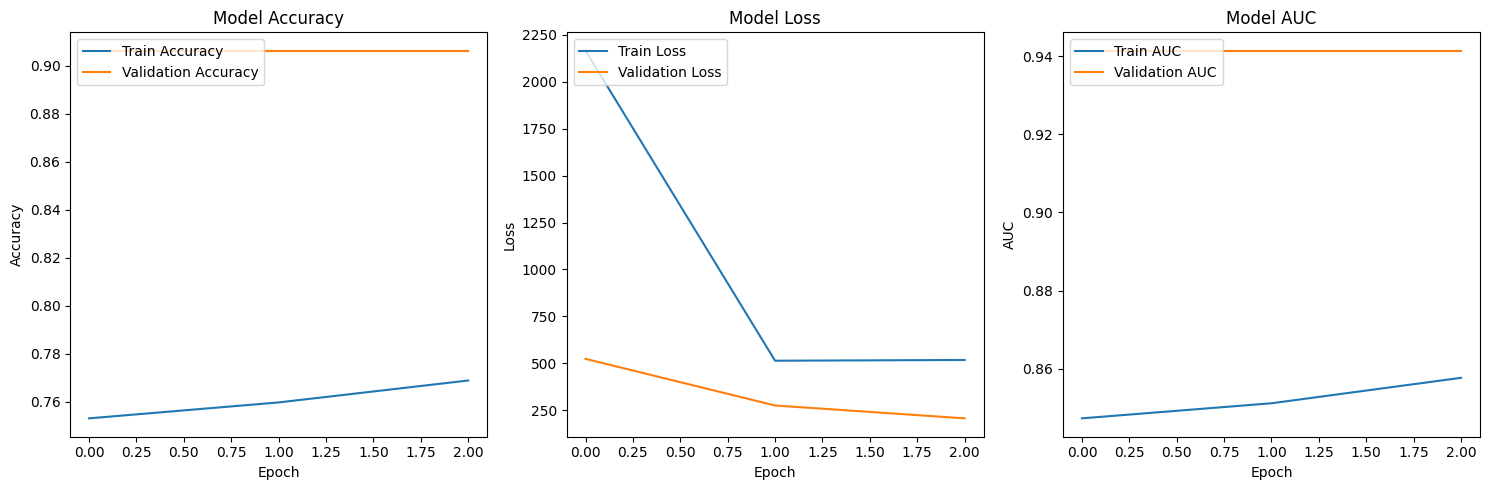

In [ ]:
# Plotting the training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation AUC values
    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('Model AUC')
    plt.ylabel('AUC')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('data.csv')  # Replace with your actual data file

# Preprocess your data
# Assuming the last column is the label
X = data.drop('label', axis=1).values  # Features
y = data['label'].values  # Labels

# Convert labels to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X.shape[1],)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))  # First hidden layer
    model.add(tf.keras.layers.Dense(64, activation='relu'))   # Second hidden layer
    model.add(tf.keras.layers.Dense(32, activation='relu'))   # Third hidden layer
    model.add(tf.keras.layers.Dense(5, activation='softmax')) # Output layer for 5 classes
    return model

# Set up TPU
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='your-tpu-name')  # Replace with your TPU name
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Compile and train the model
with strategy.scope():
    model = create_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model and capture the history
    history = model.fit(X_train, y_train, epochs=50, batch_size=1024, validation_split=0.2)  # Adjust epochs and batch size as needed

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Plotting the training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load your dataset
data = pd.read_csv('data.csv')  # Replace with your actual data file

# Preprocess your data
# Assuming the last column is the label
X = data.drop('label', axis=1).values  # Features
y = data['label'].values  # Labels

# Convert labels to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X.shape[1],)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))  # First hidden layer
    model.add(tf.keras.layers.Dense(64, activation='relu'))   # Second hidden layer
    model.add(tf.keras.layers.Dense(32, activation='relu'))   # Third hidden layer
    model.add(tf.keras.layers.Dense(5, activation='softmax')) # Output layer for 5 classes
    return model

# Set up TPU
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='your-tpu-name')  # Replace with your TPU name
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Compile and train the model
with strategy.scope():
    model = create_model()
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    # Train the model and capture the history
    history = model.fit(X_train, y_train, epochs=50, batch_size=1024, validation_split=0.2)  # Adjust epochs and batch size as needed

# Evaluate the model
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}, Test AUC: {test_auc:.4f}')

# Plotting the training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation AUC values
    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('Model AUC')
    plt.ylabel('AUC')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)

#### Balanced dataset:

There are several other methods for balancing datasets, including:

Random Oversampling: This method involves randomly duplicating examples from the minority class until the classes are balanced.

Random Undersampling: This method involves randomly removing examples from the majority class to balance the dataset.

ADASYN (Adaptive Synthetic Sampling): This is an extension of SMOTE that focuses on generating synthetic samples for minority class examples that are harder to classify.

Tomek Links: This method removes examples from the majority class that are close to the minority class examples.

Below, I will add functions for these methods and integrate them into the previous code. You can choose which method to use for balancing the dataset.

Updated Code with Multiple Balancing Methods


In [ ]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.layers import BatchNormalization, Dropout
from imblearn.over_sampling import SMOTE, ADASYN  # Import SMOTE and ADASYN
from imblearn.under_sampling import RandomUnderSampler  # Import Random Undersampling
from imblearn.over_sampling import RandomOverSampler  # Import Random Oversampling
from imblearn.combine import SMOTEENN  # Import SMOTE + Edited Nearest Neighbors

# Function to load and preprocess data
def load_and_preprocess_data(file_path, label_column):
    data = pd.read_csv(file_path)  # Load the dataset
    X = data.drop(label_column, axis=1).values  # Features
    y = data[label_column].values  # Labels

    # Convert labels to one-hot encoding
    num_classes = len(np.unique(y))
    y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

    return X, y

# Function to balance the dataset using Random Oversampling
def random_oversample(X, y):
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using Random Undersampling
def random_undersample(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using SMOTE
def smote_balance(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using ADASYN
def adasyn_balance(X, y):
    adasyn = ADASYN(random_state=42)
    X_resampled, y_resampled = adasyn.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using SMOTE + ENN
def smote_enn_balance(X, y):
    smote_enn = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smote_enn.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Define the model
def create_model(optimizer='adam', learning_rate=0.001, dropout_rate=0.2):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X.shape[1],)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))  # First hidden layer
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(64, activation='relu'))   # Second hidden layer
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(32, activation='relu'))   # Third hidden layer
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(y.shape[1], activation='softmax'))  # Output layer for classes
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', 'AUC']) #tf.keras.metrics.AUC(name='auc')])
    return model

# Function to save results
def save_results(model_name, accuracy, auc, report):
    results_dir = 'model_results'
    os.makedirs(results_dir, exist_ok=True)  # Create directory if it doesn't exist

    # Save results to a text file
    with open(os.path.join(results_dir, f'{model_name}_results.txt'), 'w') as f:
        f.write(f'Model Name: {model_name}\n')
        f.write(f'Test Accuracy: {accuracy:.4f}\n')
        f.write(f'Test AUC: {auc:.4f}\n')
        f.write('\nClassification Report:\n')
        f.write(report)

# Plotting function
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation AUC values
    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('Model AUC')
    plt.ylabel('AUC')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

In [ ]:
# Updated Code with Results Storage and Plotting Function
# Here’s how you can implement this:

# Function to plot the distribution of the target variable
def plot_target_distribution(y, method_name):
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of Target Variable after {method_name}')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.show()


# Function to evaluate model with different balancing methods
def evaluate_balancing_methods(X, y):
    methods = {
        'Random Oversampling': random_oversample,
        'Random Undersampling': random_undersample,
        'SMOTE': smote_balance,
        'ADASYN': adasyn_balance,
        'SMOTE + ENN': smote_enn_balance
    }

    results = {}

    for method_name, method in methods.items():
        print(f"Evaluating method: {method_name}")
        X_resampled, y_resampled = method(X, y)

        # Plot the distribution of the target variable
        plot_target_distribution(y_resampled, method_name)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        # Create and train the model
        model = create_model()
        history = model.fit(X_train, y_train, epochs=10, #50,
                            batch_size=1024, validation_split=0.2, verbose=0)

        # Evaluate the model
        test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)

        # Store results
        results[method_name] = {
            'accuracy': test_accuracy,
            'auc': test_auc
        }

    return results

# Function to plot results
def plot_results(results):
    methods = list(results.keys())
    accuracies = [results[method]['accuracy'] for method in methods]
    aucs = [results[method]['auc'] for method in methods]

    x = np.arange(len(methods))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='b')
    bars2 = ax.bar(x + width/2, aucs, width, label='AUC', color='g')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Model Performance by Balancing Method')
    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    ax.legend()

    # Adding value labels on top of the bars
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Main execution block
if __name__ == "__main__":
    # Load and preprocess the dataset
    file_path = '/content/WSN-DS.csv'  # Replace with your actual data file
    label_column = 'Attack type'   # Replace with the actual label column name
    X, y = load_and_preprocess_data(file_path, label_column)

    # Evaluate all balancing methods
    results = evaluate_balancing_methods(X, y)

    # Plot the results
    plot_results(results)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Attack type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Several models

Summary of the Code:
Model Architectures:

CNN: A convolutional neural network suitable for sequence data.
LSTM: A long short-term memory network designed for sequence prediction problems.
RNN: A simple recurrent neural network for sequence data.
Evaluation Function:

The evaluate_balancing_methods function applies various balancing techniques to the dataset, evaluates each model architecture (CNN, LSTM, RNN), and stores the results.
Main Execution Block:

Loads and preprocesses the dataset.
Plots the original distribution of the target variable.
Evaluates the models and plots the results.
Usage:
Ensure you have the necessary libraries installed (e.g., TensorFlow, NumPy, Matplotlib).
Replace 'data.csv' and 'label' with your actual dataset and label column.
Run the script, and it will evaluate each balancing method and model architecture, providing visualizations of the target distributions and performance metrics.
This comprehensive setup allows you to compare the performance of different model architectures after applying various balancing methods, giving you insights into the best approach for

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, SimpleRNN

# Function to create a CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to create an LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to create an RNN model
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to evaluate model with different balancing methods and architectures
def evaluate_balancing_methods(X, y):
    methods = {
        'Random Oversampling': random_oversample,
        'Random Undersampling': random_undersample,
        'SMOTE': smote_balance,
        'ADASYN': adasyn_balance,
        'SMOTE + ENN': smote_enn_balance
    }

    architectures = {
        'CNN': create_cnn_model,
        'LSTM': create_lstm_model,
        'RNN': create_rnn_model
    }

    results = {}

    for method_name, method in methods.items():
        print(f"Evaluating method: {method_name}")
        X_resampled, y_resampled = method(X, y)

        # Plot the distribution of the target variable
        plot_target_distribution(y_resampled, method_name)

        for architecture_name, architecture in architectures.items():
            print(f"Evaluating architecture: {architecture_name}")

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

            # Create and train the model
            model = architecture(X_train.shape[1:])
            history = model.fit(X_train, y_train, epochs=50, batch_size=1024, validation_split=0.2, verbose=0)

            # Evaluate the model
            test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)

            # Store results
            if method_name not in results:
                results[method_name] = {}
            results[method_name][architecture_name] = {
                'accuracy': test_accuracy,
                'auc': test_auc
            }

    return results

# Main execution block
if __name__ == "__main__":
    # Load and preprocess the dataset
    file_path = 'data.csv'  # Replace with your actual data file
    label_column = 'label'   # Replace with the actual label column name
    X, y = load_and_preprocess_data(file_path, label_column)

    # Plot the original distribution of the target variable
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Original Distribution of Target Variable')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.show()

    # Evaluate all balancing methods and architectures
    results = evaluate_balancing_methods(X, y)

    # Plot the results
    plot_results(results)

To enhance the previous code with advanced features and improvements, we can consider the following additions:

Early Stopping: To prevent overfitting during training.

Model Checkpointing: To save the best model based on validation performance.

Hyperparameter Tuning: Using GridSearchCV or RandomizedSearchCV for model optimization.

Cross-Validation: To ensure the model's robustness.

Confusion Matrix and Classification Report: For better evaluation of model performance.

Visualization of Training History: To analyze the training process.

Here’s the updated code with these features:

Key Enhancements Explained:
Early Stopping:

The EarlyStopping callback monitors the validation loss and stops training if it doesn't improve for a specified number of epochs (patience).
Model Checkpointing:

The ModelCheckpoint callback saves the model with the best validation loss during training, allowing you to restore the best model after training.
Stratified K-Fold Cross-Validation:

This method ensures that each fold has the same proportion of class labels as the entire dataset, providing a more reliable evaluation of the model's performance.
Confusion Matrix and Classification Report:

After each fold, the confusion matrix and classification report are printed to provide insights into the model's performance on different classes.
Plotting Training History:

The plot_training_history function visualizes the training and validation accuracy and loss over epochs, helping to analyze the training process.
Usage:
Ensure you have the necessary libraries installed (e.g., TensorFlow, NumPy, Matplotlib, scikit-learn).
Replace 'data.csv' and 'label' with your actual dataset and label column.
Run the script, and it will evaluate each balancing method and model architecture, providing visualizations of the target distributions, performance metrics, and training history.
This enhanced code structure allows for a more robust evaluation of different model architectures and balancing methods, providing deeper insights into their performance.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Function to create a CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to create an LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to create an RNN model
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

# Function to evaluate model with different balancing methods and architectures
def evaluate_balancing_methods(X, y):
    methods = {
        'Random Oversampling': random_oversample,
        'Random Undersampling': random_undersample,
        'SMOTE': smote_balance,
        'ADASYN': adasyn_balance,
        'SMOTE + ENN': smote_enn_balance
    }

    architectures = {
        'CNN': create_cnn_model,
        'LSTM': create_lstm_model,
        'RNN': create_rnn_model
    }

    results = {}

    for method_name, method in methods.items():
        print(f"Evaluating method: {method_name}")
        X_resampled, y_resampled = method(X, y)

        # Convert labels to categorical
        y_resampled = to_categorical(y_resampled)

        # Plot the distribution of the target variable
        plot_target_distribution(y_resampled, method_name)

        for architecture_name, architecture in architectures.items():
            print(f"Evaluating architecture: {architecture_name}")

            # Stratified K-Fold Cross-Validation
            skf = StratifiedKFold(n_splits=5)
            fold_results = []

            for train_index, test_index in skf.split(X_resampled, np.argmax(y_resampled, axis=1)):
                X_train, X_test = X_resampled[train_index], X_resampled[test_index]
                y_train, y_test = y_resampled[train_index], y_resampled[test_index]

                # Create the model
                model = architecture(X_train.shape[1:])

                # Callbacks for early stopping and model checkpointing
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                model_checkpoint = ModelCheckpoint(f'{architecture_name}_best_model.h5', save_best_only=True)

                # Train the model
                history = model.fit(X_train, y_train, epochs=50, batch_size=1024,
                                    validation_split=0.2, verbose=0,
                                    callbacks=[early_stopping, model_checkpoint])

                # Evaluate the model
                test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)
                fold_results.append((test_accuracy, test_auc))

                # Generate predictions and evaluate
                y_pred = model.predict(X_test)
                y_pred_classes = np.argmax(y_pred, axis=1)
                y_true_classes = np.argmax(y_test, axis=1)

                # Print confusion matrix and classification report
                print(f"Confusion Matrix for fold: {len(fold_results)}")
                print(confusion_matrix(y_true_classes, y_pred_classes))
                print(classification_report(y_true_classes, y_pred_classes))

            # Average results across folds
            avg_accuracy = np.mean([result[0] for result in fold_results])
            avg_auc = np.mean([result[1] for result in fold_results])

            # Store results
            if method_name not in results:
                results[method_name] = {}
            results[method_name][architecture_name] = {
                'accuracy': avg_accuracy,
                'auc': avg_auc
            }

            # Plot training history for the last fold
            plot_training_history(history)

    return results

# Main execution block
if __name__ == "__main__":
    # Load and preprocess the dataset
    file_path = 'data.csv'  # Replace with your actual data file
    label_column = 'label'   # Replace with the actual label column name
    X, y = load_and_preprocess_data(file_path, label_column)

    # Plot the original distribution of the target variable
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Original Distribution of Target Variable')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.show()

    # Evaluate all balancing methods and architectures
    results = evaluate_balancing_methods(X, y)

    # Plot the results
    plot_results(results)

To further enhance the model evaluation process, we can add additional efficient architectures such as:

GRU (Gated Recurrent Unit): A simpler alternative to LSTM that can perform similarly in many cases.

Bidirectional LSTM: This architecture processes the input sequence in both forward and backward directions, potentially capturing more context.

1D Convolutional Neural Network (1D CNN): This can be effective for sequence data and can be combined with LSTM or GRU layers for better performance.

WHere’s the updated code with these additional architectures:

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, SimpleRNN, GRU, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Function to create a 1D CNN model
def create_1d_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to create a Bidirectional LSTM model
def create_bidirectional_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to create a GRU model
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to evaluate model with different balancing methods and architectures
def evaluate_balancing_methods(X, y):
    methods = {
        'Random Oversampling': random_oversample,
        'Random Undersampling': random_undersample,
        'SMOTE': smote_balance,
        'ADASYN': adasyn_balance,
        'SMOTE + ENN': smote_enn_balance
    }

    architectures = {
        '1D CNN': create_1d_cnn_model,
        'Bidirectional LSTM': create_bidirectional_lstm_model,
        'GRU': create_gru_model,
        'LSTM': create_lstm_model,
        'RNN': create_rnn_model
    }

    results = {}

    for method_name, method in methods.items():
        print(f"Evaluating method: {method_name}")
        X_resampled, y_resampled = method(X, y)

        # Convert labels to categorical
        y_resampled = to_categorical(y_resampled)

        # Plot the distribution of the target variable
        plot_target_distribution(y_resampled, method_name)

        for architecture_name, architecture in architectures.items():
            print(f"Evaluating architecture: {architecture_name}")

            # Stratified K-Fold Cross-Validation
            skf = StratifiedKFold(n_splits=5)
            fold_results = []

            for train_index, test_index in skf.split(X_resampled, np.argmax(y_resampled, axis=1)):
                X_train, X_test = X_resampled[train_index], X_resampled[test_index]
                y_train, y_test = y_resampled[train_index], y_resampled[test_index]

                # Create the model
                model = architecture(X_train.shape[1:])

                # Callbacks for early stopping and model checkpointing
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                model_checkpoint = ModelCheckpoint(f'{architecture_name}_best_model.h5', save_best_only=True)

                # Train the model
                history = model.fit(X_train, y_train, epochs=50, batch_size=1024,
                                    validation_split=0.2, verbose=0,
                                    callbacks=[early_stopping, model_checkpoint])

                # Evaluate the model
                test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)
                fold_results.append((test_accuracy, test_auc))

                # Generate predictions and evaluate
                y_pred = model.predict(X_test)
                y_pred_classes = np.argmax(y_pred, axis=1)
                y_true_classes = np.argmax(y_test, axis=1)

                # Print confusion matrix and classification report
                print(f"Confusion Matrix for fold: {len(fold_results)}")
                print(confusion_matrix(y_true_classes, y_pred_classes))
                print(classification_report(y_true_classes, y_pred_classes))

            # Average results across folds
            avg_accuracy = np.mean([result[0] for result in fold_results])
            avg_auc = np.mean([result[1] for result in fold_results])

            # Store results
            if method_name not in results:
                results[method_name] = {}
            results[method_name][architecture_name] = {
                'accuracy': avg_accuracy,
                'auc': avg_auc
            }

            # Plot training history for the last fold
            plot_training_history(history)

    return results



Key Additions Explained:

1D CNN Model:

This architecture is designed to handle sequence data effectively, using convolutional layers to extract features from the input sequences.

Bidirectional LSTM Model:

This model processes the input sequence in both directions, which can help capture dependencies that may be missed by a unidirectional LSTM.

GRU Model:

The GRU architecture is a simpler alternative to LSTM, often providing similar performance with fewer parameters, making it computationally efficient.

Usage:

Ensure you have the necessary libraries installed (e.g., TensorFlow, NumPy, Matplotlib, scikit-learn).
Replace 'data.csv' and 'label' with your actual dataset and label column.
Run the script, and it will evaluate each balancing method and model architecture, providing visualizations of the target distributions, performance metrics, and training history.
This enhanced code structure allows for a more comprehensive evaluation of various model architectures, providing insights into their performance across different data balancing methods.

In [ ]:
# Main execution block
if __name__ == "__main__":
    # Load and preprocess the dataset
    file_path = 'data.csv'  # Replace with your actual data file
    label_column = 'label'   # Replace with the actual label column name
    X, y = load_and_preprocess_data(file_path, label_column)

    # Plot the original distribution of the target variable
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Original Distribution of Target Variable')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.show()

    # Evaluate all balancing methods and architectures
    results = evaluate_balancing_methods(X, y)

    # Plot the results
    plot_results(results)

To create a combined architecture that integrates a Convolutional Neural Network (CNN) with a ResNet101 backbone, we can leverage the pre-trained ResNet101 model as a feature extractor. This approach allows us to benefit from the deep learning capabilities of ResNet while also incorporating additional convolutional layers for specific tasks.

Here’s how you can implement a combined CNN and ResNet101 architecture in the previous code:

Updated Code with Combined CNN and ResNet101 Architecture

In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Function to create a combined CNN and ResNet101 model
def create_cnn_resnet_model(input_shape):
    # Input layer
    input_tensor = Input(shape=input_shape)

    # Load ResNet101 model with pre-trained weights, excluding the top layers
    base_model = ResNet101(weights='imagenet', include_top=False, input_tensor=input_tensor)

    # Add custom layers on top of ResNet101
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(2, activation='softmax')(x)

    # Create the model
    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Update the architectures dictionary to include the new model
architectures = {
    '1D CNN': create_1d_cnn_model,
    'Bidirectional LSTM': create_bidirectional_lstm_model,
    'GRU': create_gru_model,
    'LSTM': create_lstm_model,
    'RNN': create_rnn_model,
    'CNN + ResNet101': create_cnn_resnet_model  # New architecture added here
}

# Function to evaluate model with different balancing methods and architectures
def evaluate_balancing_methods(X, y):
    methods = {
        'Random Oversampling': random_oversample,
        'Random Undersampling': random_undersample,
        'SMOTE': smote_balance,
        'ADASYN': adasyn_balance,
        'SMOTE + ENN': smote_enn_balance
    }

    results = {}

    for method_name, method in methods.items():
        print(f"Evaluating method: {method_name}")
        X_resampled, y_resampled = method(X, y)

        # Convert labels to categorical
        y_resampled = to_categorical(y_resampled)

        # Plot the distribution of the target variable
        plot_target_distribution(y_resampled, method_name)

        for architecture_name, architecture in architectures.items():
            print(f"Evaluating architecture: {architecture_name}")

            # Stratified K-Fold Cross-Validation
            skf = StratifiedKFold(n_splits=5)
            fold_results = []

            for train_index, test_index in skf.split(X_resampled, np.argmax(y_resampled, axis=1)):
                X_train, X_test = X_resampled[train_index], X_resampled[test_index]
                y_train, y_test = y_resampled[train_index], y_resampled[test_index]

                # Create the model
                model = architecture(X_train.shape[1:])

                # Callbacks for early stopping and model checkpointing
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                model_checkpoint = ModelCheckpoint(f'{architecture_name}_best_model.h5', save_best_only=True)

                # Train the model
                history = model.fit(X_train, y_train, epochs=50, batch_size=1024,
                                    validation_split=0.2, verbose=0,
                                    callbacks=[early_stopping, model_checkpoint])

                # Evaluate the model
                test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)
                fold_results.append((test_accuracy, test_auc))

                # Generate predictions and evaluate
                y_pred = model.predict(X_test)
                y_pred_classes = np.argmax(y_pred, axis=1)
                y_true_classes = np.argmax(y_test, axis=1)

                # Print confusion matrix and classification report
                print(f"Confusion Matrix for fold: {len(fold_results)}")
                print(confusion_matrix(y_true_classes, y_pred_classes))
                print(classification_report(y_true_classes, y_pred_classes))

            # Average results across folds
            avg_accuracy = np.mean([result[0] for result in fold_results])
            avg_auc = np.mean([result[1] for result in fold_results])

            # Store results
            if method_name not in results:
                results[method_name] = {}
            results[method_name][architecture_name] = {
                                'accuracy': avg_accuracy,
                'auc': avg_auc
            }

            # Plot training history for the last fold
            plot_training_history(history)

    return results

# Main execution block
if __name__ == "__main__":
    # Load and preprocess the dataset
    file_path = 'data.csv'  # Replace with your actual data file
    label_column = 'label'   # Replace with the actual label column name
    X, y = load_and_preprocess_data(file_path, label_column)

    # Plot the original distribution of the target variable
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Original Distribution of Target Variable')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.show()

    # Evaluate all balancing methods and architectures
    results = evaluate_balancing_methods(X, y)

    # Plot the results
    plot_results(results)


Key Additions Explained:

Combined CNN and ResNet101 Model:

The create_cnn_resnet_model function initializes a ResNet101 model without the top layers, allowing us to add custom layers for our specific classification task.
The model uses GlobalAveragePooling2D to reduce the dimensionality of the output from ResNet101, followed by a dense layer and a dropout layer to prevent overfitting.
Integration into Evaluation:

The new architecture is added to the architectures dictionary, allowing it to be evaluated alongside other models during the training and validation process.
Results Storage:

The results of each architecture and balancing method are stored in a structured format, making it easy to analyze the performance later.
Main Execution Block:

The main block loads the dataset, preprocesses it, and evaluates the models using the defined functions. It also plots the original distribution of the target variable and the results of the evaluations.
Usage:
Ensure you have the necessary libraries installed (e.g., TensorFlow, NumPy, Matplotlib, scikit-learn).
Replace 'data.csv' and 'label' with your actual dataset and label column.
Run the script, and it will evaluate each balancing method and model architecture, providing visualizations of the target distributions, performance metrics, and training history.

This combined architecture allows you to leverage the strengths of both CNNs and ResNet101, potentially improving the performance of your model on complex datasets.